# Introduction

This notebook backtests 2000 stock tickers. After reading in the stock tickers from a CSV file, it calls `backtester()` to do all the hard work. This is basically a wrapper for the `backtester()`. The `backtester()` is stored in backtest.py.

In [1]:
from backtest import get_hist, smooth, features, stringify, print_ticker_heading, balanced_scorecard, \
                     determine_minima_n_maxima, align_minima_n_maxima, plot_trades, split_data, \
                     get_signals, merge_buy_n_sell_signals, extract_trades, get_possible_trades, \
                     backtester
import pandas as pd
import numpy as np

from   frankie     import DayForecast, optimize, baseline, cross_val_tpr
import yfinance as yf

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, balanced_accuracy_score, roc_auc_score
from sklearn.datasets import load_breast_cancer, load_iris, make_moons, make_circles, make_classification
from sklearn.linear_model import LogisticRegression
from category_encoders import WOEEncoder

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import MinMaxScaler, KBinsDiscretizer, FunctionTransformer
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer

from datetime import date, timedelta

import matplotlib.pyplot as plt
%matplotlib inline

from scipy.signal import savgol_filter, argrelmin, argrelmax

import gc; gc.enable()

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
# suppress output of plotting all the trades as this is quite a lot...
# plot_trades(tickers, min_indices, max_indices)

In [4]:
DATAPATH = '/Users/frkornet/Flatiron/Stock-Market-Final-Project/data/'
sdf = pd.read_csv(f'{DATAPATH}stocks_2000.csv')
idx = (sdf.TICKER > '')
sdf = sdf.loc[idx].reset_index()
tickers = sdf.TICKER.to_list()

In [5]:
%time myPnL_df, my_Capital_df, possible_trades_df = backtester(tickers, "10y")

Simulating 1961 stocks



local minima and maxima: 100%|██████████| 1961/1961 [17:04<00:00,  1.91it/s]


Unable to determine minima and maxima for the following tickers:
['ACNB', 'ARGO', 'BGG', 'CATY', 'CHE', 'CCNE', 'CSS', 'CFR', 'ES', 'HIG', 'HNI', 'NSP', 'LMT', 'MCK', 'MGEE', 'MOFG', 'NBTB', 'SAFT', 'SPTN', 'TAC', 'TGI', 'TRMK', 'UFCS', 'WEN', 'WEYS']
Simulating with remaining 1936 stocks



possible trades:  28%|██▊       | 534/1936 [12:18<24:44,  1.06s/it]

Failed to get possible trades for DESTQ


possible trades: 100%|██████████| 1936/1936 [44:47<00:00,  1.39s/it]


Possible trades to simulate: 20658
Trading days to simulate:  : 740 

before day_close: 2017-03-17 00:00:00 0 10000 0 10000 0 True
after day_close: 2017-03-17 00:00:00 0 10000 0 10000 0 True
before day_close: 2017-03-20 00:00:00 0 10000 0 10000 0 True
after day_close: 2017-03-20 00:00:00 0 10000 0 10000 0 True
before day_close: 2017-03-21 00:00:00 0 10000 0 10000 0 True
after day_close: 2017-03-21 00:00:00 0 10000 0 10000 0 True
*** buying 2000.0 in NYMX on 2017-03-22 00:00:00 with target sell date of 2017-04-12 00:00:00
enough money (10000) to buy NYMX (capital=10000
invested in: [] (0)
after buy: invested in ['NYMX'] (1
capital=10000 in_use=2000.0 free=8000.0
*** buying 2000.0 in WST on 2017-03-22 00:00:00 with target sell date of 2017-06-07 00:00:00
enough money (8000.0) to buy WST (capital=10000
invested in: ['NYMX'] (1)
after buy: invested in ['NYMX', 'WST'] (2
capital=10000 in_use=4000.0 free=6000.0
*** buying 2000.0 in CVGI on 2017-03-22 00:00:00 with target sell date of 2017-04

after buy: invested in ['BHC', 'MLAB', 'IVC', 'CACC', 'GEOS'] (5
capital=10000.0 in_use=10000.0 free=0.0
*** buying 2000.0 in GOOD on 2017-03-22 00:00:00 with target sell date of 2017-04-11 00:00:00
maxed out: GOOD is not expected to perform better than stocks already invested in
invested in: ['BHC', 'MLAB', 'IVC', 'CACC', 'GEOS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'MLAB', 'IVC', 'CACC', 'GEOS'] (5)
capital=10000.0 in_use=10000.0 free=0.0
*** buying 2000.0 in EPM on 2017-03-22 00:00:00 with target sell date of 2017-04-26 00:00:00
maxed out: EPM is not expected to perform better than stocks already invested in
invested in: ['BHC', 'MLAB', 'IVC', 'CACC', 'GEOS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'MLAB', 'IVC', 'CACC', 'GEOS'] (5)
capital=10000.0 in_use=10000.0 free=0.0
*** buying 2000.0 in ERII on 2017-03-22 00:00:00 with target sell date of 2017-04-11 00:00:00
maxed out: ERII is not expected to perform bett

after buy: invested in ['BHC', 'MLAB', 'IVC', 'GEOS', 'CASH'] (5
capital=10000.0 in_use=10000.0 free=0.0
*** buying 2000.0 in KAMN on 2017-03-22 00:00:00 with target sell date of 2017-07-05 00:00:00
maxed out: KAMN is not expected to perform better than stocks already invested in
invested in: ['BHC', 'MLAB', 'IVC', 'GEOS', 'CASH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'MLAB', 'IVC', 'GEOS', 'CASH'] (5)
capital=10000.0 in_use=10000.0 free=0.0
*** buying 2000.0 in NPO on 2017-03-22 00:00:00 with target sell date of 2017-04-20 00:00:00
maxed out: NPO is not expected to perform better than stocks already invested in
invested in: ['BHC', 'MLAB', 'IVC', 'GEOS', 'CASH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'MLAB', 'IVC', 'GEOS', 'CASH'] (5)
capital=10000.0 in_use=10000.0 free=0.0
*** buying 2000.0 in HI on 2017-03-22 00:00:00 with target sell date of 2017-04-27 00:00:00
maxed out: HI is not expected to perform better t

after buy: invested in ['BHC', 'MLAB', 'IVC', 'GEOS', 'ATSG'] (5
capital=9987.839771101573 in_use=9987.839771101573 free=0.0
*** buying 1997.5679542203147 in ZIOP on 2017-03-23 00:00:00 with target sell date of 2017-05-03 00:00:00
maxed out: ZIOP is not expected to perform better than stocks already invested in
invested in: ['BHC', 'MLAB', 'IVC', 'GEOS', 'ATSG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'MLAB', 'IVC', 'GEOS', 'ATSG'] (5)
capital=9987.839771101573 in_use=9987.839771101573 free=0.0
*** buying 1997.5679542203147 in POL on 2017-03-23 00:00:00 with target sell date of 2017-05-24 00:00:00
maxed out: POL is not expected to perform better than stocks already invested in
invested in: ['BHC', 'MLAB', 'IVC', 'GEOS', 'ATSG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'MLAB', 'IVC', 'GEOS', 'ATSG'] (5)
capital=9987.839771101573 in_use=9987.839771101573 free=0.0
*** buying 1997.5679542203147 in PKOH on 2017-03-23 00:00

after buy: invested in ['BHC', 'MLAB', 'IVC', 'GEOS', 'TCCO'] (5
capital=9987.839771101573 in_use=9987.839771101573 free=0.0
*** buying 1997.5679542203147 in DLX on 2017-03-23 00:00:00 with target sell date of 2017-03-31 00:00:00
maxed out: DLX is not expected to perform better than stocks already invested in
invested in: ['BHC', 'MLAB', 'IVC', 'GEOS', 'TCCO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'MLAB', 'IVC', 'GEOS', 'TCCO'] (5)
capital=9987.839771101573 in_use=9987.839771101573 free=0.0
*** buying 1997.5679542203147 in TDC on 2017-03-23 00:00:00 with target sell date of 2017-03-28 00:00:00
maxed out: TDC is not expected to perform better than stocks already invested in
invested in: ['BHC', 'MLAB', 'IVC', 'GEOS', 'TCCO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'MLAB', 'IVC', 'GEOS', 'TCCO'] (5)
capital=9987.839771101573 in_use=9987.839771101573 free=0.0
*** buying 1997.5679542203147 in RRGB on 2017-03-23 00:00:0

after buy: invested in ['BHC', 'GEOS', 'TCCO', 'CTRC', 'PTSI'] (5
capital=10019.22381054183 in_use=10019.22381054183 free=0.0
*** buying 2003.8447621083658 in FFBC on 2017-03-24 00:00:00 with target sell date of 2017-05-08 00:00:00
maxed out: FFBC is not expected to perform better than stocks already invested in
invested in: ['BHC', 'GEOS', 'TCCO', 'CTRC', 'PTSI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'GEOS', 'TCCO', 'CTRC', 'PTSI'] (5)
capital=10019.22381054183 in_use=10019.22381054183 free=0.0
*** buying 2003.8447621083658 in PBI on 2017-03-24 00:00:00 with target sell date of 2017-04-18 00:00:00
maxed out: PBI is not expected to perform better than stocks already invested in
invested in: ['BHC', 'GEOS', 'TCCO', 'CTRC', 'PTSI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'GEOS', 'TCCO', 'CTRC', 'PTSI'] (5)
capital=10019.22381054183 in_use=10019.22381054183 free=0.0
*** buying 2003.8447621083658 in FMBH on 2017-03-24 

after buy: invested in ['BHC', 'TCCO', 'CTRC', 'PTSI', 'SGMO'] (5
capital=10312.964492733447 in_use=10191.646156883464 free=121.3183358499823
*** buying 2062.5928985466894 in HOFT on 2017-03-28 00:00:00 with target sell date of 2017-04-13 00:00:00
maxed out: HOFT is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TCCO', 'CTRC', 'PTSI', 'SGMO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TCCO', 'CTRC', 'PTSI', 'SGMO'] (5)
capital=10312.964492733447 in_use=10191.646156883464 free=121.3183358499823
*** buying 2062.5928985466894 in ZN on 2017-03-28 00:00:00 with target sell date of 2017-05-02 00:00:00
*** selling SGMO on 2017-03-28 00:00:00 to free up money for ZN
profit of selling SGMO on 2017-03-28 00:00:00:  0.0 0.0%
enough money (2169.209431345354) to buy ZN (capital=10312.964492733447
invested in: ['BHC', 'TCCO', 'CTRC', 'PTSI'] (4)
after buy: invested in ['BHC', 'TCCO', 'CTRC', 'PTSI', 'ZN'] (5
capital=10312.9644927

after buy: invested in ['BHC', 'TCCO', 'CTRC', 'ZN', 'ELOX'] (5
capital=10428.066583441698 in_use=10337.693127873017 free=90.37345556868149
*** buying 2085.6133166883396 in UIHC on 2017-03-30 00:00:00 with target sell date of 2018-01-22 00:00:00
maxed out: UIHC is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TCCO', 'CTRC', 'ZN', 'ELOX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TCCO', 'CTRC', 'ZN', 'ELOX'] (5)
capital=10428.066583441698 in_use=10337.693127873017 free=90.37345556868149
*** buying 2085.6133166883396 in RICK on 2017-03-30 00:00:00 with target sell date of 2017-05-10 00:00:00
maxed out: RICK is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TCCO', 'CTRC', 'ZN', 'ELOX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TCCO', 'CTRC', 'ZN', 'ELOX'] (5)
capital=10428.066583441698 in_use=10337.693127873017 free=90.37345556868149
*** buying 2

after buy: invested in ['BHC', 'TCCO', 'ZN', 'CBZ'] (4
capital=10147.115189125663 in_use=8368.107485300094 free=1779.0077038255677
*** buying 2029.4230378251327 in EBS on 2017-04-03 00:00:00 with target sell date of 2017-05-15 00:00:00
enough money (1779.0077038255677) to buy EBS (capital=10147.115189125663
invested in: ['BHC', 'TCCO', 'ZN', 'CBZ'] (4)
you do not have 1779.0077038255677 and setting amount to 1779.0077038255677
after buy: invested in ['BHC', 'TCCO', 'ZN', 'CBZ', 'EBS'] (5
capital=10147.115189125663 in_use=10147.115189125661 free=0.0
*** buying 2029.4230378251327 in SCL on 2017-04-03 00:00:00 with target sell date of 2017-05-16 00:00:00
*** selling CBZ on 2017-04-03 00:00:00 to free up money for SCL
profit of selling CBZ on 2017-04-03 00:00:00:  2.2737367544323206e-13 0.0%
enough money (2029.423037825133) to buy SCL (capital=10147.115189125663
invested in: ['BHC', 'TCCO', 'ZN', 'EBS'] (4)
after buy: invested in ['BHC', 'TCCO', 'ZN', 'EBS', 'SCL'] (5
capital=10147.1151891

after buy: invested in ['BHC', 'TCCO', 'ZN', 'AMPE', 'CF'] (5
capital=10147.115189125663 in_use=10147.115189125661 free=0.0
*** buying 2029.4230378251327 in CVA on 2017-04-03 00:00:00 with target sell date of 2017-04-17 00:00:00
maxed out: CVA is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TCCO', 'ZN', 'AMPE', 'CF'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TCCO', 'ZN', 'AMPE', 'CF'] (5)
capital=10147.115189125663 in_use=10147.115189125661 free=0.0
*** buying 2029.4230378251327 in HST on 2017-04-03 00:00:00 with target sell date of 2017-04-04 00:00:00
maxed out: HST is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TCCO', 'ZN', 'AMPE', 'CF'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TCCO', 'ZN', 'AMPE', 'CF'] (5)
capital=10147.115189125663 in_use=10147.115189125661 free=0.0
*** buying 2029.4230378251327 in AMG on 2017-04-03 00:00:00 with tar

after buy: invested in ['BHC', 'ZN', 'AMPE', 'DPZ', 'LULU'] (5
capital=9966.651233560931 in_use=9813.64628798447 free=153.00494557645857
*** buying 1993.3302467121862 in RDNT on 2017-04-04 00:00:00 with target sell date of 2017-04-17 00:00:00
maxed out: RDNT is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ZN', 'AMPE', 'DPZ', 'LULU'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ZN', 'AMPE', 'DPZ', 'LULU'] (5)
capital=9966.651233560931 in_use=9813.64628798447 free=153.00494557645857
*** buying 1993.3302467121862 in HWC on 2017-04-04 00:00:00 with target sell date of 2017-05-04 00:00:00
maxed out: HWC is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ZN', 'AMPE', 'DPZ', 'LULU'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ZN', 'AMPE', 'DPZ', 'LULU'] (5)
capital=9966.651233560931 in_use=9813.64628798447 free=153.00494557645857
*** buying 1993.330246712

after buy: invested in ['BHC', 'ZN', 'AMPE', 'LULU', 'IMGN'] (5
capital=9780.31265830843 in_use=9617.189054378243 free=163.1236039301857
*** buying 1956.062531661686 in STRL on 2017-04-05 00:00:00 with target sell date of 2017-05-18 00:00:00
maxed out: STRL is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ZN', 'AMPE', 'LULU', 'IMGN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ZN', 'AMPE', 'LULU', 'IMGN'] (5)
capital=9780.31265830843 in_use=9617.189054378243 free=163.1236039301857
*** buying 1956.062531661686 in CAMP on 2017-04-05 00:00:00 with target sell date of 2017-04-27 00:00:00
maxed out: CAMP is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ZN', 'AMPE', 'LULU', 'IMGN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ZN', 'AMPE', 'LULU', 'IMGN'] (5)
capital=9780.31265830843 in_use=9617.189054378243 free=163.1236039301857
*** buying 1956.0625316

after buy: invested in ['ZN', 'LULU', 'IMGN', 'ISNS'] (4
capital=9345.738500055037 in_use=7859.017299533575 free=1486.7212005214612
*** buying 1869.1477000110074 in BDC on 2017-04-06 00:00:00 with target sell date of 2017-04-25 00:00:00
enough money (1486.7212005214612) to buy BDC (capital=9345.738500055037
invested in: ['ZN', 'LULU', 'IMGN', 'ISNS'] (4)
you do not have 1486.7212005214612 and setting amount to 1486.7212005214612
after buy: invested in ['ZN', 'LULU', 'IMGN', 'ISNS', 'BDC'] (5
capital=9345.738500055037 in_use=9345.738500055037 free=0.0
*** buying 1869.1477000110074 in THRM on 2017-04-06 00:00:00 with target sell date of 2017-05-09 00:00:00
*** selling BDC on 2017-04-06 00:00:00 to free up money for THRM
profit of selling BDC on 2017-04-06 00:00:00:  0.0 0.0%
enough money (1486.7212005214612) to buy THRM (capital=9345.738500055037
invested in: ['ZN', 'LULU', 'IMGN', 'ISNS'] (4)
you do not have 1486.7212005214612 and setting amount to 1486.7212005214612
after buy: invested

after buy: invested in ['ZN', 'LULU', 'IMGN', 'ISNS', 'JJSF'] (5
capital=9345.738500055037 in_use=9345.738500055037 free=0.0
*** buying 1869.1477000110074 in CAAS on 2017-04-06 00:00:00 with target sell date of 2017-04-25 00:00:00
maxed out: CAAS is not expected to perform better than stocks already invested in
invested in: ['ZN', 'LULU', 'IMGN', 'ISNS', 'JJSF'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ZN', 'LULU', 'IMGN', 'ISNS', 'JJSF'] (5)
capital=9345.738500055037 in_use=9345.738500055037 free=0.0
*** buying 1869.1477000110074 in LAKE on 2017-04-06 00:00:00 with target sell date of 2017-04-19 00:00:00
maxed out: LAKE is not expected to perform better than stocks already invested in
invested in: ['ZN', 'LULU', 'IMGN', 'ISNS', 'JJSF'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ZN', 'LULU', 'IMGN', 'ISNS', 'JJSF'] (5)
capital=9345.738500055037 in_use=9345.738500055037 free=0.0
*** buying 1869.1477000110074 in ARAY on 2017-04-06 00:

after buy: invested in ['ZN', 'LULU', 'IMGN', 'ISNS', 'OPNT'] (5
capital=9259.230261072995 in_use=9259.230261072995 free=0.0
*** buying 1851.846052214599 in VICR on 2017-04-10 00:00:00 with target sell date of 2017-06-23 00:00:00
maxed out: VICR is not expected to perform better than stocks already invested in
invested in: ['ZN', 'LULU', 'IMGN', 'ISNS', 'OPNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ZN', 'LULU', 'IMGN', 'ISNS', 'OPNT'] (5)
capital=9259.230261072995 in_use=9259.230261072995 free=0.0
*** buying 1851.846052214599 in CVCY on 2017-04-10 00:00:00 with target sell date of 2017-05-10 00:00:00
maxed out: CVCY is not expected to perform better than stocks already invested in
invested in: ['ZN', 'LULU', 'IMGN', 'ISNS', 'OPNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ZN', 'LULU', 'IMGN', 'ISNS', 'OPNT'] (5)
capital=9259.230261072995 in_use=9259.230261072995 free=0.0
*** buying 1851.846052214599 in CECE on 2017-04-10 00:00:

after buy: invested in ['ZN', 'LULU', 'ISNS', 'OPNT', 'DAIO'] (5
capital=9086.07265713804 in_use=9086.07265713804 free=0.0
*** buying 1817.214531427608 in CYH on 2017-04-12 00:00:00 with target sell date of 2017-05-16 00:00:00
*** selling DAIO on 2017-04-12 00:00:00 to free up money for CYH
profit of selling DAIO on 2017-04-12 00:00:00:  0.0 0.0%
enough money (1679.6809130189959) to buy CYH (capital=9086.07265713804
invested in: ['ZN', 'LULU', 'ISNS', 'OPNT'] (4)
you do not have 1679.6809130189959 and setting amount to 1679.6809130189959
after buy: invested in ['ZN', 'LULU', 'ISNS', 'OPNT', 'CYH'] (5
capital=9086.07265713804 in_use=9086.07265713804 free=0.0
*** buying 1817.214531427608 in SGC on 2017-04-12 00:00:00 with target sell date of 2017-04-26 00:00:00
maxed out: SGC is not expected to perform better than stocks already invested in
invested in: ['ZN', 'LULU', 'ISNS', 'OPNT', 'CYH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ZN', 'LULU', 'ISNS', 'OPNT', 

after buy: invested in ['ZN', 'LULU', 'OPNT', 'CYH', 'TRNS'] (5
capital=9190.664510085287 in_use=9190.664510085287 free=0.0
*** buying 1838.1329020170574 in JBLU on 2017-04-17 00:00:00 with target sell date of 2017-04-27 00:00:00
maxed out: JBLU is not expected to perform better than stocks already invested in
invested in: ['ZN', 'LULU', 'OPNT', 'CYH', 'TRNS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ZN', 'LULU', 'OPNT', 'CYH', 'TRNS'] (5)
capital=9190.664510085287 in_use=9190.664510085287 free=0.0
*** buying 1838.1329020170574 in HUM on 2017-04-17 00:00:00 with target sell date of 2017-05-01 00:00:00
maxed out: HUM is not expected to perform better than stocks already invested in
invested in: ['ZN', 'LULU', 'OPNT', 'CYH', 'TRNS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ZN', 'LULU', 'OPNT', 'CYH', 'TRNS'] (5)
capital=9190.664510085287 in_use=9190.664510085287 free=0.0
*** buying 1838.1329020170574 in SMP on 2017-04-17 00:00:00 wi

after buy: invested in ['ZN', 'LULU', 'OPNT', 'CYH', 'NVDA'] (5
capital=9032.771069748771 in_use=9032.771069748771 free=0.0
*** buying 1806.5542139497543 in ITI on 2017-04-20 00:00:00 with target sell date of 2017-06-20 00:00:00
maxed out: ITI is not expected to perform better than stocks already invested in
invested in: ['ZN', 'LULU', 'OPNT', 'CYH', 'NVDA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ZN', 'LULU', 'OPNT', 'CYH', 'NVDA'] (5)
capital=9032.771069748771 in_use=9032.771069748771 free=0.0
*** buying 1806.5542139497543 in BDSI on 2017-04-20 00:00:00 with target sell date of 2017-05-05 00:00:00
maxed out: BDSI is not expected to perform better than stocks already invested in
invested in: ['ZN', 'LULU', 'OPNT', 'CYH', 'NVDA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ZN', 'LULU', 'OPNT', 'CYH', 'NVDA'] (5)
capital=9032.771069748771 in_use=9032.771069748771 free=0.0
*** buying 1806.5542139497543 in UTI on 2017-04-20 00:00:00 wi

*** buying 1812.1885395164743 in MBI on 2017-04-27 00:00:00 with target sell date of 2017-06-13 00:00:00
maxed out: MBI is not expected to perform better than stocks already invested in
invested in: ['ZN', 'LULU', 'OPNT', 'CYH', 'NVDA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ZN', 'LULU', 'OPNT', 'CYH', 'NVDA'] (5)
capital=9060.942697582372 in_use=9060.942697582372 free=0.0
*** buying 1812.1885395164743 in K on 2017-04-27 00:00:00 with target sell date of 2017-05-24 00:00:00
maxed out: K is not expected to perform better than stocks already invested in
invested in: ['ZN', 'LULU', 'OPNT', 'CYH', 'NVDA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ZN', 'LULU', 'OPNT', 'CYH', 'NVDA'] (5)
capital=9060.942697582372 in_use=9060.942697582372 free=0.0
*** buying 1812.1885395164743 in AEE on 2017-04-27 00:00:00 with target sell date of 2017-05-25 00:00:00
maxed out: AEE is not expected to perform better than stocks already invested in
invest

after buy: invested in ['ZN', 'LULU', 'CYH', 'NVDA', 'CTRC'] (5
capital=9215.951843871924 in_use=9215.951843871928 free=0.0
*** buying 1843.1903687743848 in ESCA on 2017-05-01 00:00:00 with target sell date of 2017-07-03 00:00:00
maxed out: ESCA is not expected to perform better than stocks already invested in
invested in: ['ZN', 'LULU', 'CYH', 'NVDA', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ZN', 'LULU', 'CYH', 'NVDA', 'CTRC'] (5)
capital=9215.951843871924 in_use=9215.951843871928 free=0.0
*** buying 1843.1903687743848 in MDP on 2017-05-01 00:00:00 with target sell date of 2017-07-10 00:00:00
maxed out: MDP is not expected to perform better than stocks already invested in
invested in: ['ZN', 'LULU', 'CYH', 'NVDA', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ZN', 'LULU', 'CYH', 'NVDA', 'CTRC'] (5)
capital=9215.951843871924 in_use=9215.951843871928 free=0.0
*** buying 1843.1903687743848 in BLDR on 2017-05-01 00:00:00 w

after buy: invested in ['LULU', 'CYH', 'CTRC', 'TCCO', 'CORT'] (5
capital=10146.660519640203 in_use=9625.774768141828 free=520.885751498377
*** buying 2029.3321039280406 in LPX on 2017-05-03 00:00:00 with target sell date of 2017-06-19 00:00:00
maxed out: LPX is not expected to perform better than stocks already invested in
invested in: ['LULU', 'CYH', 'CTRC', 'TCCO', 'CORT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'CYH', 'CTRC', 'TCCO', 'CORT'] (5)
capital=10146.660519640203 in_use=9625.774768141828 free=520.885751498377
*** buying 2029.3321039280406 in FHN on 2017-05-03 00:00:00 with target sell date of 2017-07-03 00:00:00
maxed out: FHN is not expected to perform better than stocks already invested in
invested in: ['LULU', 'CYH', 'CTRC', 'TCCO', 'CORT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'CYH', 'CTRC', 'TCCO', 'CORT'] (5)
capital=10146.660519640203 in_use=9625.774768141828 free=520.885751498377
*** buying 2

after buy: invested in ['LULU', 'CYH', 'CORT', 'AUY', 'AG'] (5
capital=9997.359353633517 in_use=9922.735080892056 free=74.6242727414633
*** buying 1999.4718707267034 in SON on 2017-05-04 00:00:00 with target sell date of 2017-09-11 00:00:00
maxed out: SON is not expected to perform better than stocks already invested in
invested in: ['LULU', 'CYH', 'CORT', 'AUY', 'AG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'CYH', 'CORT', 'AUY', 'AG'] (5)
capital=9997.359353633517 in_use=9922.735080892056 free=74.6242727414633
before day_close: 2017-05-04 00:00:00 5 9997.359353633517 9922.735080892056 74.6242727414633 2.2737367544323206e-12 True
after day_close: 2017-05-04 00:00:00 5 9997.542763561101 9922.91849081964 74.6242727414633 2.2737367544323206e-12 True
invested in: ['LULU', 'CYH', 'CORT', 'AUY', 'AG'] (5)
capital=9997.542763561101 in_use=9922.91849081964 free=74.6242727414633
*** selling CORT on 2017-05-05 00:00:00
profit of selling CORT on 2017-05-05 00:0

after buy: invested in ['LULU', 'CYH', 'AUY', 'AG', 'MSEX'] (5
capital=10195.963047897212 in_use=10048.904006670535 free=147.05904122667926
*** buying 2039.1926095794424 in ARL on 2017-05-08 00:00:00 with target sell date of 2017-05-31 00:00:00
maxed out: ARL is not expected to perform better than stocks already invested in
invested in: ['LULU', 'CYH', 'AUY', 'AG', 'MSEX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'CYH', 'AUY', 'AG', 'MSEX'] (5)
capital=10195.963047897212 in_use=10048.904006670535 free=147.05904122667926
*** buying 2039.1926095794424 in TLF on 2017-05-08 00:00:00 with target sell date of 2017-05-10 00:00:00
maxed out: TLF is not expected to perform better than stocks already invested in
invested in: ['LULU', 'CYH', 'AUY', 'AG', 'MSEX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'CYH', 'AUY', 'AG', 'MSEX'] (5)
capital=10195.963047897212 in_use=10048.904006670535 free=147.05904122667926
*** buying 2039.19

after buy: invested in ['LULU', 'CYH', 'DOV', 'ARWR', 'NSSC'] (5
capital=10171.45592150147 in_use=10010.482256565585 free=160.9736649358906
before day_close: 2017-05-09 00:00:00 5 10171.45592150147 10010.482256565585 160.9736649358906 5.002220859751105e-12 True
after day_close: 2017-05-09 00:00:00 5 10268.315287115624 10107.341622179738 160.9736649358906 5.002220859751105e-12 True
*** buying 2053.663057423125 in EBTC on 2017-05-10 00:00:00 with target sell date of 2017-06-28 00:00:00
maxed out: EBTC is not expected to perform better than stocks already invested in
invested in: ['LULU', 'CYH', 'DOV', 'ARWR', 'NSSC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'CYH', 'DOV', 'ARWR', 'NSSC'] (5)
capital=10268.315287115624 in_use=10107.341622179738 free=160.9736649358906
*** buying 2053.663057423125 in IAG on 2017-05-10 00:00:00 with target sell date of 2017-06-01 00:00:00
maxed out: IAG is not expected to perform better than stocks already invested in
invest

after buy: invested in ['LULU', 'CYH', 'DOV', 'ARWR', 'INS'] (5
capital=10282.011307237684 in_use=10282.011307237688 free=0.0
*** buying 2056.402261447537 in TCCO on 2017-05-11 00:00:00 with target sell date of 2017-05-17 00:00:00
*** selling ARWR on 2017-05-11 00:00:00 to free up money for TCCO
profit of selling ARWR on 2017-05-11 00:00:00:  135.34493610913887 6.63%
enough money (2177.8230628470524) to buy TCCO (capital=10368.1399029435
invested in: ['LULU', 'CYH', 'DOV', 'INS'] (4)
after buy: invested in ['LULU', 'CYH', 'DOV', 'INS', 'TCCO'] (5
capital=10368.1399029435 in_use=10246.71910154399 free=121.42080139951531
*** buying 2073.6279805886998 in KMB on 2017-05-11 00:00:00 with target sell date of 2017-09-13 00:00:00
maxed out: KMB is not expected to perform better than stocks already invested in
invested in: ['LULU', 'CYH', 'DOV', 'INS', 'TCCO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'CYH', 'DOV', 'INS', 'TCCO'] (5)
capital=10368.1399029435 in

after buy: invested in ['LULU', 'INS', 'TCCO', 'CORT', 'BBQ'] (5
capital=10454.279221053806 in_use=10454.279221053812 free=0.0
*** buying 2090.8558442107615 in TITN on 2017-05-16 00:00:00 with target sell date of 2017-05-26 00:00:00
maxed out: TITN is not expected to perform better than stocks already invested in
invested in: ['LULU', 'INS', 'TCCO', 'CORT', 'BBQ'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'INS', 'TCCO', 'CORT', 'BBQ'] (5)
capital=10454.279221053806 in_use=10454.279221053812 free=0.0
*** buying 2090.8558442107615 in EXC on 2017-05-16 00:00:00 with target sell date of 2017-06-05 00:00:00
maxed out: EXC is not expected to perform better than stocks already invested in
invested in: ['LULU', 'INS', 'TCCO', 'CORT', 'BBQ'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'INS', 'TCCO', 'CORT', 'BBQ'] (5)
capital=10454.279221053806 in_use=10454.279221053812 free=0.0
*** buying 2090.8558442107615 in ABMD on 2017-05-16

after buy: invested in ['LULU', 'INS', 'CORT', 'ABMD', 'SPPI'] (5
capital=10203.944610145918 in_use=10203.944610145922 free=0.0
*** buying 2040.7889220291836 in ODC on 2017-05-17 00:00:00 with target sell date of 2017-07-03 00:00:00
*** selling SPPI on 2017-05-17 00:00:00 to free up money for ODC
profit of selling SPPI on 2017-05-17 00:00:00:  2.2737367544323206e-13 0.0%
enough money (2039.407201435574) to buy ODC (capital=10203.944610145918
invested in: ['LULU', 'INS', 'CORT', 'ABMD'] (4)
you do not have 2039.407201435574 and setting amount to 2039.407201435574
after buy: invested in ['LULU', 'INS', 'CORT', 'ABMD', 'ODC'] (5
capital=10203.944610145918 in_use=10203.944610145922 free=0.0
*** buying 2040.7889220291836 in ATRS on 2017-05-17 00:00:00 with target sell date of 2017-06-21 00:00:00
*** selling ODC on 2017-05-17 00:00:00 to free up money for ATRS
profit of selling ODC on 2017-05-17 00:00:00:  0.0 0.0%
enough money (2039.407201435574) to buy ATRS (capital=10203.944610145918
inve

after buy: invested in ['LULU', 'INS', 'CORT', 'GSIT', 'ZUMZ'] (5
capital=10155.783981993605 in_use=10147.533576956755 free=8.250405036852953
before day_close: 2017-05-17 00:00:00 5 10155.783981993605 10147.533576956755 8.250405036852953 3.183231456205249e-12 True
after day_close: 2017-05-17 00:00:00 5 10064.242264746765 10055.991859709915 8.250405036852953 3.183231456205249e-12 True
*** buying 2012.848452949353 in MU on 2017-05-18 00:00:00 with target sell date of 2017-06-05 00:00:00
maxed out: MU is not expected to perform better than stocks already invested in
invested in: ['LULU', 'INS', 'CORT', 'GSIT', 'ZUMZ'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'INS', 'CORT', 'GSIT', 'ZUMZ'] (5)
capital=10064.242264746765 in_use=10055.991859709915 free=8.250405036852953
*** buying 2012.848452949353 in PFBI on 2017-05-18 00:00:00 with target sell date of 2017-06-19 00:00:00
maxed out: PFBI is not expected to perform better than stocks already invested in
inv

after buy: invested in ['LULU', 'INS', 'CORT', 'ZUMZ', 'HELE'] (5
capital=10079.04887896957 in_use=10079.048878969574 free=0.0
*** buying 2015.809775793914 in TCBK on 2017-05-18 00:00:00 with target sell date of 2017-06-16 00:00:00
maxed out: TCBK is not expected to perform better than stocks already invested in
invested in: ['LULU', 'INS', 'CORT', 'ZUMZ', 'HELE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'INS', 'CORT', 'ZUMZ', 'HELE'] (5)
capital=10079.04887896957 in_use=10079.048878969574 free=0.0
*** buying 2015.809775793914 in GHC on 2017-05-18 00:00:00 with target sell date of 2017-06-02 00:00:00
maxed out: GHC is not expected to perform better than stocks already invested in
invested in: ['LULU', 'INS', 'CORT', 'ZUMZ', 'HELE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'INS', 'CORT', 'ZUMZ', 'HELE'] (5)
capital=10079.04887896957 in_use=10079.048878969574 free=0.0
*** buying 2015.809775793914 in TREC on 2017-05-18 

after buy: invested in ['LULU', 'INS', 'ZUMZ', 'CPHI', 'HURC'] (5
capital=10392.240519781086 in_use=10111.4812824347 free=280.75923734639036
*** buying 2078.448103956217 in VRTU on 2017-05-23 00:00:00 with target sell date of 2017-06-28 00:00:00
*** selling HURC on 2017-05-23 00:00:00 to free up money for VRTU
profit of selling HURC on 2017-05-23 00:00:00:  0.0 0.0%
enough money (2359.2073413026073) to buy VRTU (capital=10392.240519781086
invested in: ['LULU', 'INS', 'ZUMZ', 'CPHI'] (4)
after buy: invested in ['LULU', 'INS', 'ZUMZ', 'CPHI', 'VRTU'] (5
capital=10392.240519781086 in_use=10111.4812824347 free=280.75923734639036
*** buying 2078.448103956217 in LNDC on 2017-05-23 00:00:00 with target sell date of 2017-07-05 00:00:00
maxed out: LNDC is not expected to perform better than stocks already invested in
invested in: ['LULU', 'INS', 'ZUMZ', 'CPHI', 'VRTU'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'INS', 'ZUMZ', 'CPHI', 'VRTU'] (5)
capital=10392.24

after buy: invested in ['LULU', 'INS', 'CPHI', 'IRDM', 'SCL'] (5
capital=10225.092552311788 in_use=10044.962892176165 free=180.12966013562482
*** buying 2045.0185104623574 in HOFT on 2017-05-24 00:00:00 with target sell date of 2017-05-30 00:00:00
maxed out: HOFT is not expected to perform better than stocks already invested in
invested in: ['LULU', 'INS', 'CPHI', 'IRDM', 'SCL'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'INS', 'CPHI', 'IRDM', 'SCL'] (5)
capital=10225.092552311788 in_use=10044.962892176165 free=180.12966013562482
*** buying 2045.0185104623574 in BDGE on 2017-05-24 00:00:00 with target sell date of 2017-10-02 00:00:00
maxed out: BDGE is not expected to perform better than stocks already invested in
invested in: ['LULU', 'INS', 'CPHI', 'IRDM', 'SCL'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'INS', 'CPHI', 'IRDM', 'SCL'] (5)
capital=10225.092552311788 in_use=10044.962892176165 free=180.12966013562482
*** 

after buy: invested in ['LULU', 'INS', 'IRDM', 'AMD', 'CHDN'] (5
capital=10489.05364101554 in_use=10204.244705561692 free=284.8089354538506
*** buying 2097.810728203108 in NLS on 2017-05-25 00:00:00 with target sell date of 2017-06-02 00:00:00
maxed out: NLS is not expected to perform better than stocks already invested in
invested in: ['LULU', 'INS', 'IRDM', 'AMD', 'CHDN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'INS', 'IRDM', 'AMD', 'CHDN'] (5)
capital=10489.05364101554 in_use=10204.244705561692 free=284.8089354538506
*** buying 2097.810728203108 in FFBC on 2017-05-25 00:00:00 with target sell date of 2017-06-23 00:00:00
maxed out: FFBC is not expected to perform better than stocks already invested in
invested in: ['LULU', 'INS', 'IRDM', 'AMD', 'CHDN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'INS', 'IRDM', 'AMD', 'CHDN'] (5)
capital=10489.05364101554 in_use=10204.244705561692 free=284.8089354538506
*** buying 209

after buy: invested in ['LULU', 'INS', 'IRDM', 'AMD', 'ARC'] (5
capital=10470.162297252538 in_use=10197.88327372412 free=272.27902352842193
*** buying 2094.0324594505078 in TPX on 2017-05-26 00:00:00 with target sell date of 2017-06-09 00:00:00
maxed out: TPX is not expected to perform better than stocks already invested in
invested in: ['LULU', 'INS', 'IRDM', 'AMD', 'ARC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'INS', 'IRDM', 'AMD', 'ARC'] (5)
capital=10470.162297252538 in_use=10197.88327372412 free=272.27902352842193
*** buying 2094.0324594505078 in SMP on 2017-05-26 00:00:00 with target sell date of 2017-06-12 00:00:00
maxed out: SMP is not expected to perform better than stocks already invested in
invested in: ['LULU', 'INS', 'IRDM', 'AMD', 'ARC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'INS', 'IRDM', 'AMD', 'ARC'] (5)
capital=10470.162297252538 in_use=10197.88327372412 free=272.27902352842193
*** buying 2094.

after buy: invested in ['LULU', 'INS', 'IRDM', 'IOVA', 'LMNR'] (5
capital=10733.323332912212 in_use=10240.016929726087 free=493.3064031861277
*** buying 2146.6646665824424 in TIPT on 2017-05-31 00:00:00 with target sell date of 2017-06-08 00:00:00
*** selling LMNR on 2017-05-31 00:00:00 to free up money for TIPT
profit of selling LMNR on 2017-05-31 00:00:00:  0.0 0.0%
enough money (2639.97106976857) to buy TIPT (capital=10733.323332912212
invested in: ['LULU', 'INS', 'IRDM', 'IOVA'] (4)
after buy: invested in ['LULU', 'INS', 'IRDM', 'IOVA', 'TIPT'] (5
capital=10733.323332912212 in_use=10240.016929726087 free=493.3064031861277
*** buying 2146.6646665824424 in PLPC on 2017-05-31 00:00:00 with target sell date of 2017-08-07 00:00:00
maxed out: PLPC is not expected to perform better than stocks already invested in
invested in: ['LULU', 'INS', 'IRDM', 'IOVA', 'TIPT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'INS', 'IRDM', 'IOVA', 'TIPT'] (5)
capital=10733.

after buy: invested in ['INS', 'IRDM', 'IOVA', 'TIPT', 'BHC'] (5
capital=11179.191184894225 in_use=10759.549200131936 free=419.64198476229194
*** buying 2235.838236978845 in VNDA on 2017-06-02 00:00:00 with target sell date of 2017-06-26 00:00:00
maxed out: VNDA is not expected to perform better than stocks already invested in
invested in: ['INS', 'IRDM', 'IOVA', 'TIPT', 'BHC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['INS', 'IRDM', 'IOVA', 'TIPT', 'BHC'] (5)
capital=11179.191184894225 in_use=10759.549200131936 free=419.64198476229194
*** buying 2235.838236978845 in SIGA on 2017-06-02 00:00:00 with target sell date of 2017-06-09 00:00:00
maxed out: SIGA is not expected to perform better than stocks already invested in
invested in: ['INS', 'IRDM', 'IOVA', 'TIPT', 'BHC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['INS', 'IRDM', 'IOVA', 'TIPT', 'BHC'] (5)
capital=11179.191184894225 in_use=10759.549200131936 free=419.64198476229194
*** bu

after buy: invested in ['INS', 'IOVA', 'BHC', 'VECO', 'AVID'] (5
capital=11720.5022006803 in_use=11377.114625971706 free=343.3875747085922
*** buying 2344.1004401360597 in PGC on 2017-06-07 00:00:00 with target sell date of 2017-06-29 00:00:00
maxed out: PGC is not expected to perform better than stocks already invested in
invested in: ['INS', 'IOVA', 'BHC', 'VECO', 'AVID'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['INS', 'IOVA', 'BHC', 'VECO', 'AVID'] (5)
capital=11720.5022006803 in_use=11377.114625971706 free=343.3875747085922
*** buying 2344.1004401360597 in PWOD on 2017-06-07 00:00:00 with target sell date of 2017-06-14 00:00:00
maxed out: PWOD is not expected to perform better than stocks already invested in
invested in: ['INS', 'IOVA', 'BHC', 'VECO', 'AVID'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['INS', 'IOVA', 'BHC', 'VECO', 'AVID'] (5)
capital=11720.5022006803 in_use=11377.114625971706 free=343.3875747085922
*** buying 2344

after buy: invested in ['INS', 'IOVA', 'BHC', 'VECO', 'BWA'] (5
capital=11704.727877110692 in_use=11344.596449629416 free=360.131427481273
*** buying 2340.9455754221385 in NLS on 2017-06-08 00:00:00 with target sell date of 2017-06-28 00:00:00
*** selling BWA on 2017-06-08 00:00:00 to free up money for NLS
profit of selling BWA on 2017-06-08 00:00:00:  0.0 0.0%
enough money (2701.0770029034115) to buy NLS (capital=11704.727877110692
invested in: ['INS', 'IOVA', 'BHC', 'VECO'] (4)
after buy: invested in ['INS', 'IOVA', 'BHC', 'VECO', 'NLS'] (5
capital=11704.727877110692 in_use=11344.596449629416 free=360.131427481273
*** buying 2340.9455754221385 in CF on 2017-06-08 00:00:00 with target sell date of 2017-07-05 00:00:00
*** selling NLS on 2017-06-08 00:00:00 to free up money for CF
profit of selling NLS on 2017-06-08 00:00:00:  0.0 0.0%
enough money (2701.0770029034115) to buy CF (capital=11704.727877110692
invested in: ['INS', 'IOVA', 'BHC', 'VECO'] (4)
after buy: invested in ['INS', 'I

after buy: invested in ['INS', 'BHC', 'SGMO', 'DXCM', 'IMGN'] (5
capital=11697.688844183627 in_use=11187.520965559375 free=510.1678786242487
*** buying 2339.5377688367253 in GLUU on 2017-06-12 00:00:00 with target sell date of 2017-07-24 00:00:00
maxed out: GLUU is not expected to perform better than stocks already invested in
invested in: ['INS', 'BHC', 'SGMO', 'DXCM', 'IMGN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['INS', 'BHC', 'SGMO', 'DXCM', 'IMGN'] (5)
capital=11697.688844183627 in_use=11187.520965559375 free=510.1678786242487
*** buying 2339.5377688367253 in HOFT on 2017-06-12 00:00:00 with target sell date of 2017-07-19 00:00:00
maxed out: HOFT is not expected to perform better than stocks already invested in
invested in: ['INS', 'BHC', 'SGMO', 'DXCM', 'IMGN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['INS', 'BHC', 'SGMO', 'DXCM', 'IMGN'] (5)
capital=11697.688844183627 in_use=11187.520965559375 free=510.1678786242487
*** buy

after buy: invested in ['INS', 'BHC', 'SGMO', 'IMGN', 'TACT'] (5
capital=12039.239408060508 in_use=11406.64981787643 free=632.5895901840731
*** buying 2407.8478816121014 in PAYS on 2017-06-14 00:00:00 with target sell date of 2017-06-28 00:00:00
maxed out: PAYS is not expected to perform better than stocks already invested in
invested in: ['INS', 'BHC', 'SGMO', 'IMGN', 'TACT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['INS', 'BHC', 'SGMO', 'IMGN', 'TACT'] (5)
capital=12039.239408060508 in_use=11406.64981787643 free=632.5895901840731
*** buying 2407.8478816121014 in INT on 2017-06-14 00:00:00 with target sell date of 2017-06-30 00:00:00
maxed out: INT is not expected to perform better than stocks already invested in
invested in: ['INS', 'BHC', 'SGMO', 'IMGN', 'TACT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['INS', 'BHC', 'SGMO', 'IMGN', 'TACT'] (5)
capital=12039.239408060508 in_use=11406.64981787643 free=632.5895901840731
*** buying 2

after buy: invested in ['INS', 'BHC', 'IMGN', 'TACT', 'LZB'] (5
capital=12553.086360947984 in_use=11921.865190867027 free=631.2211700809512
*** buying 2510.617272189597 in CYH on 2017-06-20 00:00:00 with target sell date of 2017-07-05 00:00:00
*** selling LZB on 2017-06-20 00:00:00 to free up money for CYH
profit of selling LZB on 2017-06-20 00:00:00:  0.0 0.0%
enough money (3141.838442270548) to buy CYH (capital=12553.086360947984
invested in: ['INS', 'BHC', 'IMGN', 'TACT'] (4)
after buy: invested in ['INS', 'BHC', 'IMGN', 'TACT', 'CYH'] (5
capital=12553.086360947984 in_use=11921.865190867027 free=631.2211700809512
*** buying 2510.617272189597 in SMTC on 2017-06-20 00:00:00 with target sell date of 2017-07-24 00:00:00
maxed out: SMTC is not expected to perform better than stocks already invested in
invested in: ['INS', 'BHC', 'IMGN', 'TACT', 'CYH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['INS', 'BHC', 'IMGN', 'TACT', 'CYH'] (5)
capital=12553.086360947984 in

after buy: invested in ['INS', 'BHC', 'TACT', 'CYH', 'NFLX'] (5
capital=13072.856124901518 in_use=11814.69215402449 free=1258.163970877023
*** buying 2614.5712249803037 in DOV on 2017-06-21 00:00:00 with target sell date of 2017-07-07 00:00:00
*** selling NFLX on 2017-06-21 00:00:00 to free up money for DOV
profit of selling NFLX on 2017-06-21 00:00:00:  4.547473508864641e-13 0.0%
enough money (3872.735195857327) to buy DOV (capital=13072.856124901518
invested in: ['INS', 'BHC', 'TACT', 'CYH'] (4)
after buy: invested in ['INS', 'BHC', 'TACT', 'CYH', 'DOV'] (5
capital=13072.856124901518 in_use=11814.69215402449 free=1258.1639708770235
*** buying 2614.5712249803037 in EPD on 2017-06-21 00:00:00 with target sell date of 2017-07-19 00:00:00
maxed out: EPD is not expected to perform better than stocks already invested in
invested in: ['INS', 'BHC', 'TACT', 'CYH', 'DOV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['INS', 'BHC', 'TACT', 'CYH', 'DOV'] (5)
capital=13072.

after buy: invested in ['INS', 'BHC', 'TACT', 'CYH', 'EXAS'] (5
capital=13849.557132395734 in_use=12733.680350998757 free=1115.8767813969725
*** buying 2769.911426479147 in ASMB on 2017-06-27 00:00:00 with target sell date of 2017-07-17 00:00:00
maxed out: ASMB is not expected to perform better than stocks already invested in
invested in: ['INS', 'BHC', 'TACT', 'CYH', 'EXAS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['INS', 'BHC', 'TACT', 'CYH', 'EXAS'] (5)
capital=13849.557132395734 in_use=12733.680350998757 free=1115.8767813969725
*** buying 2769.911426479147 in WBS on 2017-06-27 00:00:00 with target sell date of 2017-07-03 00:00:00
maxed out: WBS is not expected to perform better than stocks already invested in
invested in: ['INS', 'BHC', 'TACT', 'CYH', 'EXAS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['INS', 'BHC', 'TACT', 'CYH', 'EXAS'] (5)
capital=13849.557132395734 in_use=12733.680350998757 free=1115.8767813969725
*** buying 27

after buy: invested in ['INS', 'BHC', 'TACT', 'CYH', 'KMPR'] (5
capital=14026.51325967765 in_use=12738.105949163757 free=1288.4073105138887
*** buying 2805.30265193553 in ICFI on 2017-06-28 00:00:00 with target sell date of 2017-11-17 00:00:00
maxed out: ICFI is not expected to perform better than stocks already invested in
invested in: ['INS', 'BHC', 'TACT', 'CYH', 'KMPR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['INS', 'BHC', 'TACT', 'CYH', 'KMPR'] (5)
capital=14026.51325967765 in_use=12738.105949163757 free=1288.4073105138887
*** buying 2805.30265193553 in AMPE on 2017-06-28 00:00:00 with target sell date of 2017-09-21 00:00:00
*** selling KMPR on 2017-06-28 00:00:00 to free up money for AMPE
profit of selling KMPR on 2017-06-28 00:00:00:  0.0 0.0%
enough money (4093.7099624494185) to buy AMPE (capital=14026.51325967765
invested in: ['INS', 'BHC', 'TACT', 'CYH'] (4)
after buy: invested in ['INS', 'BHC', 'TACT', 'CYH', 'AMPE'] (5
capital=14026.51325967765 i

after buy: invested in ['BHC', 'TACT', 'CYH', 'AMPE', 'AMKR'] (5
capital=14144.805552382659 in_use=13824.063537430327 free=320.7420149523268
*** buying 2828.9611104765318 in AIR on 2017-07-03 00:00:00 with target sell date of 2017-07-14 00:00:00
maxed out: AIR is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TACT', 'CYH', 'AMPE', 'AMKR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TACT', 'CYH', 'AMPE', 'AMKR'] (5)
capital=14144.805552382659 in_use=13824.063537430327 free=320.7420149523268
*** buying 2828.9611104765318 in XLNX on 2017-07-03 00:00:00 with target sell date of 2017-07-10 00:00:00
*** selling AMKR on 2017-07-03 00:00:00 to free up money for XLNX
profit of selling AMKR on 2017-07-03 00:00:00:  4.547473508864641e-13 0.0%
enough money (3149.703125428859) to buy XLNX (capital=14144.805552382659
invested in: ['BHC', 'TACT', 'CYH', 'AMPE'] (4)
after buy: invested in ['BHC', 'TACT', 'CYH', 'AMPE', 'XLNX'] (5
ca

after buy: invested in ['BHC', 'TACT', 'AMPE', 'WTT', 'FLDM'] (5
capital=14142.607100069774 in_use=13834.84749840799 free=307.75960166177947
*** buying 2828.521420013955 in TSLA on 2017-07-05 00:00:00 with target sell date of 2017-08-17 00:00:00
*** selling FLDM on 2017-07-05 00:00:00 to free up money for TSLA
profit of selling FLDM on 2017-07-05 00:00:00:  0.0 0.0%
enough money (3136.2810216757343) to buy TSLA (capital=14142.607100069774
invested in: ['BHC', 'TACT', 'AMPE', 'WTT'] (4)
after buy: invested in ['BHC', 'TACT', 'AMPE', 'WTT', 'TSLA'] (5
capital=14142.607100069774 in_use=13834.84749840799 free=307.75960166177947
*** buying 2828.521420013955 in WWD on 2017-07-05 00:00:00 with target sell date of 2017-07-25 00:00:00
maxed out: WWD is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TACT', 'AMPE', 'WTT', 'TSLA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TACT', 'AMPE', 'WTT', 'TSLA'] (5)
capital=14142.6071000

after buy: invested in ['BHC', 'TACT', 'AMPE', 'WTT', 'IRDM'] (5
capital=14021.612508043205 in_use=13879.13872109343 free=142.4737869497685
*** buying 2804.322501608641 in MSCI on 2017-07-06 00:00:00 with target sell date of 2017-07-13 00:00:00
maxed out: MSCI is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TACT', 'AMPE', 'WTT', 'IRDM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TACT', 'AMPE', 'WTT', 'IRDM'] (5)
capital=14021.612508043205 in_use=13879.13872109343 free=142.4737869497685
*** buying 2804.322501608641 in LNT on 2017-07-06 00:00:00 with target sell date of 2017-07-20 00:00:00
maxed out: LNT is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TACT', 'AMPE', 'WTT', 'IRDM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TACT', 'AMPE', 'WTT', 'IRDM'] (5)
capital=14021.612508043205 in_use=13879.13872109343 free=142.4737869497685
*** buying 280

after buy: invested in ['BHC', 'TACT', 'AMPE', 'IRDM', 'GEOS'] (5
capital=13900.808097168927 in_use=13746.27457385792 free=154.53352331100177
*** buying 2780.1616194337853 in VERU on 2017-07-10 00:00:00 with target sell date of 2017-08-08 00:00:00
maxed out: VERU is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TACT', 'AMPE', 'IRDM', 'GEOS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TACT', 'AMPE', 'IRDM', 'GEOS'] (5)
capital=13900.808097168927 in_use=13746.27457385792 free=154.53352331100177
*** buying 2780.1616194337853 in UCTT on 2017-07-10 00:00:00 with target sell date of 2017-07-25 00:00:00
maxed out: UCTT is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TACT', 'AMPE', 'IRDM', 'GEOS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TACT', 'AMPE', 'IRDM', 'GEOS'] (5)
capital=13900.808097168927 in_use=13746.27457385792 free=154.53352331100177
**

after buy: invested in ['BHC', 'TACT', 'AMPE', 'GEOS', 'AEZS'] (5
capital=13913.492643771984 in_use=13584.791659160703 free=328.7009846112787
*** buying 2782.6985287543966 in PAYS on 2017-07-12 00:00:00 with target sell date of 2017-07-21 00:00:00
*** selling AEZS on 2017-07-12 00:00:00 to free up money for PAYS
profit of selling AEZS on 2017-07-12 00:00:00:  0.0 0.0%
enough money (3111.3995133656754) to buy PAYS (capital=13913.492643771984
invested in: ['BHC', 'TACT', 'AMPE', 'GEOS'] (4)
after buy: invested in ['BHC', 'TACT', 'AMPE', 'GEOS', 'PAYS'] (5
capital=13913.492643771984 in_use=13584.791659160703 free=328.7009846112787
*** buying 2782.6985287543966 in SHO on 2017-07-12 00:00:00 with target sell date of 2017-07-19 00:00:00
maxed out: SHO is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TACT', 'AMPE', 'GEOS', 'PAYS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TACT', 'AMPE', 'GEOS', 'PAYS'] (5)
capital=13913.

after buy: invested in ['BHC', 'TACT', 'AMPE', 'GEOS', 'DPZ'] (5
capital=14305.080552017978 in_use=13931.021658889034 free=374.0588931289417
*** buying 2861.0161104035956 in TG on 2017-07-17 00:00:00 with target sell date of 2017-08-14 00:00:00
maxed out: TG is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TACT', 'AMPE', 'GEOS', 'DPZ'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TACT', 'AMPE', 'GEOS', 'DPZ'] (5)
capital=14305.080552017978 in_use=13931.021658889034 free=374.0588931289417
*** buying 2861.0161104035956 in INDB on 2017-07-17 00:00:00 with target sell date of 2017-08-04 00:00:00
maxed out: INDB is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TACT', 'AMPE', 'GEOS', 'DPZ'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TACT', 'AMPE', 'GEOS', 'DPZ'] (5)
capital=14305.080552017978 in_use=13931.021658889034 free=374.0588931289417
*** buying 

after buy: invested in ['TACT', 'AMPE', 'GEOS', 'DPZ', 'LHCG'] (5
capital=14178.970487055502 in_use=13573.800483779147 free=605.1700032763533
*** buying 2835.7940974111 in SLCT on 2017-07-18 00:00:00 with target sell date of 2017-07-25 00:00:00
maxed out: SLCT is not expected to perform better than stocks already invested in
invested in: ['TACT', 'AMPE', 'GEOS', 'DPZ', 'LHCG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'AMPE', 'GEOS', 'DPZ', 'LHCG'] (5)
capital=14178.970487055502 in_use=13573.800483779147 free=605.1700032763533
*** buying 2835.7940974111 in NWN on 2017-07-18 00:00:00 with target sell date of 2017-07-21 00:00:00
maxed out: NWN is not expected to perform better than stocks already invested in
invested in: ['TACT', 'AMPE', 'GEOS', 'DPZ', 'LHCG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'AMPE', 'GEOS', 'DPZ', 'LHCG'] (5)
capital=14178.970487055502 in_use=13573.800483779147 free=605.1700032763533
*** buying

after buy: invested in ['TACT', 'AMPE', 'GEOS', 'PTSI', 'IOVA'] (5
capital=14572.313602847094 in_use=13950.74764546263 free=621.5659573844632
*** buying 2914.4627205694187 in HCCI on 2017-07-21 00:00:00 with target sell date of 2017-07-26 00:00:00
maxed out: HCCI is not expected to perform better than stocks already invested in
invested in: ['TACT', 'AMPE', 'GEOS', 'PTSI', 'IOVA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'AMPE', 'GEOS', 'PTSI', 'IOVA'] (5)
capital=14572.313602847094 in_use=13950.74764546263 free=621.5659573844632
*** buying 2914.4627205694187 in FHN on 2017-07-21 00:00:00 with target sell date of 2017-10-13 00:00:00
maxed out: FHN is not expected to perform better than stocks already invested in
invested in: ['TACT', 'AMPE', 'GEOS', 'PTSI', 'IOVA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'AMPE', 'GEOS', 'PTSI', 'IOVA'] (5)
capital=14572.313602847094 in_use=13950.74764546263 free=621.5659573844632
**

after buy: invested in ['TACT', 'AMPE', 'GEOS', 'PTSI', 'NOA'] (5
capital=14530.319249947986 in_use=14047.224984280114 free=483.09426566787306
*** buying 2906.063849989597 in LNDC on 2017-07-26 00:00:00 with target sell date of 2017-10-12 00:00:00
maxed out: LNDC is not expected to perform better than stocks already invested in
invested in: ['TACT', 'AMPE', 'GEOS', 'PTSI', 'NOA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'AMPE', 'GEOS', 'PTSI', 'NOA'] (5)
capital=14530.319249947986 in_use=14047.224984280114 free=483.09426566787306
*** buying 2906.063849989597 in CROX on 2017-07-26 00:00:00 with target sell date of 2017-08-02 00:00:00
maxed out: CROX is not expected to perform better than stocks already invested in
invested in: ['TACT', 'AMPE', 'GEOS', 'PTSI', 'NOA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'AMPE', 'GEOS', 'PTSI', 'NOA'] (5)
capital=14530.319249947986 in_use=14047.224984280114 free=483.09426566787306
*

after buy: invested in ['TACT', 'AMPE', 'PTSI', 'NOA', 'IRDM'] (5
capital=14762.037967547185 in_use=14127.240408994854 free=634.7975585523322
*** buying 2952.407593509437 in NOV on 2017-07-31 00:00:00 with target sell date of 2017-10-03 00:00:00
maxed out: NOV is not expected to perform better than stocks already invested in
invested in: ['TACT', 'AMPE', 'PTSI', 'NOA', 'IRDM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'AMPE', 'PTSI', 'NOA', 'IRDM'] (5)
capital=14762.037967547185 in_use=14127.240408994854 free=634.7975585523322
*** buying 2952.407593509437 in OTTR on 2017-07-31 00:00:00 with target sell date of 2017-08-15 00:00:00
maxed out: OTTR is not expected to perform better than stocks already invested in
invested in: ['TACT', 'AMPE', 'PTSI', 'NOA', 'IRDM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'AMPE', 'PTSI', 'NOA', 'IRDM'] (5)
capital=14762.037967547185 in_use=14127.240408994854 free=634.7975585523322
*** bu

after day_close: 2017-08-04 00:00:00 5 14897.708645244542 14410.016028266118 487.6926169784251 1.3642420526593924e-12 True
*** buying 2979.5417290489086 in ERII on 2017-08-07 00:00:00 with target sell date of 2017-09-26 00:00:00
maxed out: ERII is not expected to perform better than stocks already invested in
invested in: ['TACT', 'PTSI', 'NOA', 'IRDM', 'UNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'PTSI', 'NOA', 'IRDM', 'UNT'] (5)
capital=14897.708645244542 in_use=14410.016028266118 free=487.6926169784251
*** buying 2979.5417290489086 in IESC on 2017-08-07 00:00:00 with target sell date of 2017-08-29 00:00:00
maxed out: IESC is not expected to perform better than stocks already invested in
invested in: ['TACT', 'PTSI', 'NOA', 'IRDM', 'UNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'PTSI', 'NOA', 'IRDM', 'UNT'] (5)
capital=14897.708645244542 in_use=14410.016028266118 free=487.6926169784251
*** buying 2979.541729048


not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'PTSI', 'NOA', 'IRDM', 'UNT'] (5)
capital=14524.510567346242 in_use=14036.817950367818 free=487.6926169784251
*** buying 2904.9021134692484 in SGC on 2017-08-10 00:00:00 with target sell date of 2017-08-15 00:00:00
maxed out: SGC is not expected to perform better than stocks already invested in
invested in: ['TACT', 'PTSI', 'NOA', 'IRDM', 'UNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'PTSI', 'NOA', 'IRDM', 'UNT'] (5)
capital=14524.510567346242 in_use=14036.817950367818 free=487.6926169784251
*** buying 2904.9021134692484 in ESSA on 2017-08-10 00:00:00 with target sell date of 2017-08-29 00:00:00
maxed out: ESSA is not expected to perform better than stocks already invested in
invested in: ['TACT', 'PTSI', 'NOA', 'IRDM', 'UNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'PTSI', 'NOA', 'IRDM', 'UNT'] (5)
capital=14524.510567346242 in_use=14036.8179

after buy: invested in ['TACT', 'PTSI', 'IRDM', 'UNT', 'AMWD'] (5
capital=14046.297527840532 in_use=13769.338942583161 free=276.9585852573741
*** buying 2809.2595055681063 in IMAX on 2017-08-11 00:00:00 with target sell date of 2017-12-05 00:00:00
*** selling AMWD on 2017-08-11 00:00:00 to free up money for IMAX
profit of selling AMWD on 2017-08-11 00:00:00:  0.0 0.0%
enough money (3086.2180908254804) to buy IMAX (capital=14046.297527840532
invested in: ['TACT', 'PTSI', 'IRDM', 'UNT'] (4)
after buy: invested in ['TACT', 'PTSI', 'IRDM', 'UNT', 'IMAX'] (5
capital=14046.297527840532 in_use=13769.338942583161 free=276.9585852573741
*** buying 2809.2595055681063 in ITT on 2017-08-11 00:00:00 with target sell date of 2017-11-15 00:00:00
maxed out: ITT is not expected to perform better than stocks already invested in
invested in: ['TACT', 'PTSI', 'IRDM', 'UNT', 'IMAX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'PTSI', 'IRDM', 'UNT', 'IMAX'] (5)
capital=14046.

after buy: invested in ['TACT', 'PTSI', 'IRDM', 'UNT', 'IMGN'] (5
capital=14542.662843493998 in_use=14096.256066878144 free=446.4067766158564
*** buying 2908.5325686987994 in PRPH on 2017-08-14 00:00:00 with target sell date of 2017-08-17 00:00:00
maxed out: PRPH is not expected to perform better than stocks already invested in
invested in: ['TACT', 'PTSI', 'IRDM', 'UNT', 'IMGN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'PTSI', 'IRDM', 'UNT', 'IMGN'] (5)
capital=14542.662843493998 in_use=14096.256066878144 free=446.4067766158564
*** buying 2908.5325686987994 in INCY on 2017-08-14 00:00:00 with target sell date of 2017-09-01 00:00:00
maxed out: INCY is not expected to perform better than stocks already invested in
invested in: ['TACT', 'PTSI', 'IRDM', 'UNT', 'IMGN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'PTSI', 'IRDM', 'UNT', 'IMGN'] (5)
capital=14542.662843493998 in_use=14096.256066878144 free=446.4067766158564
**

after buy: invested in ['TACT', 'PTSI', 'IRDM', 'UNT', 'BHC'] (5
capital=14994.157162446993 in_use=14346.396071932382 free=647.7610905146153
*** buying 2998.8314324893986 in MKTX on 2017-08-15 00:00:00 with target sell date of 2017-10-19 00:00:00
maxed out: MKTX is not expected to perform better than stocks already invested in
invested in: ['TACT', 'PTSI', 'IRDM', 'UNT', 'BHC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'PTSI', 'IRDM', 'UNT', 'BHC'] (5)
capital=14994.157162446993 in_use=14346.396071932382 free=647.7610905146153
*** buying 2998.8314324893986 in MTH on 2017-08-15 00:00:00 with target sell date of 2017-08-21 00:00:00
maxed out: MTH is not expected to perform better than stocks already invested in
invested in: ['TACT', 'PTSI', 'IRDM', 'UNT', 'BHC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'PTSI', 'IRDM', 'UNT', 'BHC'] (5)
capital=14994.157162446993 in_use=14346.396071932382 free=647.7610905146153
*** buyin

after buy: invested in ['TACT', 'PTSI', 'IRDM', 'BHC', 'RGS'] (5
capital=14796.218892226852 in_use=14501.766735385934 free=294.45215684092227
*** buying 2959.2437784453705 in HOFT on 2017-08-17 00:00:00 with target sell date of 2017-09-29 00:00:00
*** selling RGS on 2017-08-17 00:00:00 to free up money for HOFT
profit of selling RGS on 2017-08-17 00:00:00:  0.0 0.0%
enough money (3253.6959352862928) to buy HOFT (capital=14796.218892226852
invested in: ['TACT', 'PTSI', 'IRDM', 'BHC'] (4)
after buy: invested in ['TACT', 'PTSI', 'IRDM', 'BHC', 'HOFT'] (5
capital=14796.218892226852 in_use=14501.766735385934 free=294.45215684092227
*** buying 2959.2437784453705 in ATSG on 2017-08-17 00:00:00 with target sell date of 2017-09-27 00:00:00
*** selling HOFT on 2017-08-17 00:00:00 to free up money for ATSG
profit of selling HOFT on 2017-08-17 00:00:00:  0.0 0.0%
enough money (3253.6959352862928) to buy ATSG (capital=14796.218892226852
invested in: ['TACT', 'PTSI', 'IRDM', 'BHC'] (4)
after buy: in

after day_close: 2017-08-22 00:00:00 5 15054.318008486558 14759.86585164564 294.45215684092227 4.092726157978177e-12 True
*** buying 3010.8636016973114 in CCBG on 2017-08-23 00:00:00 with target sell date of 2017-10-13 00:00:00
maxed out: CCBG is not expected to perform better than stocks already invested in
invested in: ['TACT', 'PTSI', 'IRDM', 'BHC', 'ATSG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'PTSI', 'IRDM', 'BHC', 'ATSG'] (5)
capital=15054.318008486558 in_use=14759.86585164564 free=294.45215684092227
*** buying 3010.8636016973114 in OLED on 2017-08-23 00:00:00 with target sell date of 2017-09-25 00:00:00
maxed out: OLED is not expected to perform better than stocks already invested in
invested in: ['TACT', 'PTSI', 'IRDM', 'BHC', 'ATSG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'PTSI', 'IRDM', 'BHC', 'ATSG'] (5)
capital=15054.318008486558 in_use=14759.86585164564 free=294.45215684092227
*** buying 3010.863601

after buy: invested in ['TACT', 'PTSI', 'IRDM', 'BHC', 'ELOX'] (5
capital=15016.669283588539 in_use=14764.103952323116 free=252.56533126542718
*** buying 3003.333856717708 in TGA on 2017-08-28 00:00:00 with target sell date of 2017-10-10 00:00:00
maxed out: TGA is not expected to perform better than stocks already invested in
invested in: ['TACT', 'PTSI', 'IRDM', 'BHC', 'ELOX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'PTSI', 'IRDM', 'BHC', 'ELOX'] (5)
capital=15016.669283588539 in_use=14764.103952323116 free=252.56533126542718
*** buying 3003.333856717708 in WD on 2017-08-28 00:00:00 with target sell date of 2017-09-29 00:00:00
maxed out: WD is not expected to perform better than stocks already invested in
invested in: ['TACT', 'PTSI', 'IRDM', 'BHC', 'ELOX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'PTSI', 'IRDM', 'BHC', 'ELOX'] (5)
capital=15016.669283588539 in_use=14764.103952323116 free=252.56533126542718
*** buy

after buy: invested in ['TACT', 'IRDM', 'BHC', 'ELOX', 'CYH'] (5
capital=15149.110202864196 in_use=14725.28851169818 free=423.82169116601835
*** buying 3029.8220405728393 in FSTR on 2017-08-30 00:00:00 with target sell date of 2017-09-07 00:00:00
maxed out: FSTR is not expected to perform better than stocks already invested in
invested in: ['TACT', 'IRDM', 'BHC', 'ELOX', 'CYH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'IRDM', 'BHC', 'ELOX', 'CYH'] (5)
capital=15149.110202864196 in_use=14725.28851169818 free=423.82169116601835
*** buying 3029.8220405728393 in SYNL on 2017-08-30 00:00:00 with target sell date of 2017-09-05 00:00:00
maxed out: SYNL is not expected to perform better than stocks already invested in
invested in: ['TACT', 'IRDM', 'BHC', 'ELOX', 'CYH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'IRDM', 'BHC', 'ELOX', 'CYH'] (5)
capital=15149.110202864196 in_use=14725.28851169818 free=423.82169116601835
before 

after buy: invested in ['IRDM', 'BHC', 'ELOX', 'CYH', 'IIN'] (5
capital=15863.827400525974 in_use=15863.827400525974 free=0.0
*** buying 3172.765480105195 in AUTO on 2017-09-01 00:00:00 with target sell date of 2017-11-30 00:00:00
maxed out: AUTO is not expected to perform better than stocks already invested in
invested in: ['IRDM', 'BHC', 'ELOX', 'CYH', 'IIN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['IRDM', 'BHC', 'ELOX', 'CYH', 'IIN'] (5)
capital=15863.827400525974 in_use=15863.827400525974 free=0.0
*** buying 3172.765480105195 in VLY on 2017-09-01 00:00:00 with target sell date of 2017-10-10 00:00:00
*** selling IIN on 2017-09-01 00:00:00 to free up money for VLY
profit of selling IIN on 2017-09-01 00:00:00:  0.0 0.0%
enough money (3130.088552911323) to buy VLY (capital=15863.827400525974
invested in: ['IRDM', 'BHC', 'ELOX', 'CYH'] (4)
you do not have 3130.088552911323 and setting amount to 3130.088552911323
after buy: invested in ['IRDM', 'BHC', 'ELOX', 

after buy: invested in ['BHC', 'ELOX', 'CYH', 'CTRC', 'ZN'] (5
capital=15297.91085264085 in_use=15297.91085264085 free=0.0
*** buying 3059.58217052817 in CSII on 2017-09-11 00:00:00 with target sell date of 2017-09-15 00:00:00
maxed out: CSII is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ELOX', 'CYH', 'CTRC', 'ZN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ELOX', 'CYH', 'CTRC', 'ZN'] (5)
capital=15297.91085264085 in_use=15297.91085264085 free=0.0
*** buying 3059.58217052817 in ERF on 2017-09-11 00:00:00 with target sell date of 2017-09-12 00:00:00
maxed out: ERF is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ELOX', 'CYH', 'CTRC', 'ZN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ELOX', 'CYH', 'CTRC', 'ZN'] (5)
capital=15297.91085264085 in_use=15297.91085264085 free=0.0
before day_close: 2017-09-11 00:00:00 5 15297.91085264085 15297.9108526

after buy: invested in ['BHC', 'ELOX', 'CTRC', 'ZN', 'TG'] (5
capital=15720.15590614446 in_use=15720.15590614446 free=0.0
*** buying 3144.031181228892 in LOPE on 2017-09-13 00:00:00 with target sell date of 2017-10-05 00:00:00
maxed out: LOPE is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ELOX', 'CTRC', 'ZN', 'TG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ELOX', 'CTRC', 'ZN', 'TG'] (5)
capital=15720.15590614446 in_use=15720.15590614446 free=0.0
*** buying 3144.031181228892 in GATX on 2017-09-13 00:00:00 with target sell date of 2017-09-25 00:00:00
*** selling TG on 2017-09-13 00:00:00 to free up money for GATX
profit of selling TG on 2017-09-13 00:00:00:  0.0 0.0%
enough money (3007.2097068315584) to buy GATX (capital=15720.15590614446
invested in: ['BHC', 'ELOX', 'CTRC', 'ZN'] (4)
you do not have 3007.2097068315584 and setting amount to 3007.2097068315584
after buy: invested in ['BHC', 'ELOX', 'CTRC', 'ZN', 'G

after buy: invested in ['BHC', 'ELOX', 'CTRC', 'ZN', 'LULU'] (5
capital=15770.158706713373 in_use=15770.158706713373 free=0.0
*** buying 3154.0317413426746 in CMS on 2017-09-18 00:00:00 with target sell date of 2017-11-21 00:00:00
maxed out: CMS is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ELOX', 'CTRC', 'ZN', 'LULU'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ELOX', 'CTRC', 'ZN', 'LULU'] (5)
capital=15770.158706713373 in_use=15770.158706713373 free=0.0
*** buying 3154.0317413426746 in HON on 2017-09-18 00:00:00 with target sell date of 2017-10-02 00:00:00
maxed out: HON is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ELOX', 'CTRC', 'ZN', 'LULU'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ELOX', 'CTRC', 'ZN', 'LULU'] (5)
capital=15770.158706713373 in_use=15770.158706713373 free=0.0
*** buying 3154.0317413426746 in ARI on 2017-09-18 00:00:0

after buy: invested in ['ELOX', 'CTRC', 'ZN', 'TCCO', 'IPHI'] (5
capital=15518.893903127799 in_use=15518.893903127799 free=0.0
*** buying 3103.7787806255596 in TBNK on 2017-09-19 00:00:00 with target sell date of 2017-09-20 00:00:00
maxed out: TBNK is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'CTRC', 'ZN', 'TCCO', 'IPHI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'CTRC', 'ZN', 'TCCO', 'IPHI'] (5)
capital=15518.893903127799 in_use=15518.893903127799 free=0.0
*** buying 3103.7787806255596 in BBI on 2017-09-19 00:00:00 with target sell date of 2017-09-20 00:00:00
maxed out: BBI is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'CTRC', 'ZN', 'TCCO', 'IPHI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'CTRC', 'ZN', 'TCCO', 'IPHI'] (5)
capital=15518.893903127799 in_use=15518.893903127799 free=0.0
*** buying 3103.7787806255596 in KTCC on 2017-09-19

after buy: invested in ['ELOX', 'CTRC', 'ZN', 'TCCO', 'CASH'] (5
capital=15747.769973788114 in_use=15747.769973788114 free=0.0
*** buying 3149.5539947576226 in CTRN on 2017-09-21 00:00:00 with target sell date of 2017-10-02 00:00:00
maxed out: CTRN is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'CTRC', 'ZN', 'TCCO', 'CASH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'CTRC', 'ZN', 'TCCO', 'CASH'] (5)
capital=15747.769973788114 in_use=15747.769973788114 free=0.0
*** buying 3149.5539947576226 in DLR on 2017-09-21 00:00:00 with target sell date of 2017-11-03 00:00:00
maxed out: DLR is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'CTRC', 'ZN', 'TCCO', 'CASH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'CTRC', 'ZN', 'TCCO', 'CASH'] (5)
capital=15747.769973788114 in_use=15747.769973788114 free=0.0
*** buying 3149.5539947576226 in CVS on 2017-09-21 

after buy: invested in ['ELOX', 'CTRC', 'ZN', 'TCCO', 'TACT'] (5
capital=16195.36398743679 in_use=16195.363987436791 free=0.0
*** buying 3239.072797487358 in ADBE on 2017-09-25 00:00:00 with target sell date of 2017-11-24 00:00:00
maxed out: ADBE is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'CTRC', 'ZN', 'TCCO', 'TACT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'CTRC', 'ZN', 'TCCO', 'TACT'] (5)
capital=16195.36398743679 in_use=16195.363987436791 free=0.0
*** buying 3239.072797487358 in CVGI on 2017-09-25 00:00:00 with target sell date of 2017-10-17 00:00:00
maxed out: CVGI is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'CTRC', 'ZN', 'TCCO', 'TACT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'CTRC', 'ZN', 'TCCO', 'TACT'] (5)
capital=16195.36398743679 in_use=16195.363987436791 free=0.0
*** buying 3239.072797487358 in CRUS on 2017-09-25 00:

after buy: invested in ['ELOX', 'ZN', 'TCCO', 'TACT', 'PACD'] (5
capital=15950.961596486604 in_use=15950.961596486606 free=0.0
*** buying 3190.192319297321 in KIRK on 2017-09-26 00:00:00 with target sell date of 2017-10-20 00:00:00
*** selling PACD on 2017-09-26 00:00:00 to free up money for KIRK
profit of selling PACD on 2017-09-26 00:00:00:  0.0 0.0%
enough money (2577.7199847505008) to buy KIRK (capital=15950.961596486604
invested in: ['ELOX', 'ZN', 'TCCO', 'TACT'] (4)
you do not have 2577.7199847505008 and setting amount to 2577.7199847505008
after buy: invested in ['ELOX', 'ZN', 'TCCO', 'TACT', 'KIRK'] (5
capital=15950.961596486604 in_use=15950.961596486606 free=0.0
*** buying 3190.192319297321 in FUNC on 2017-09-26 00:00:00 with target sell date of 2017-10-03 00:00:00
maxed out: FUNC is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'ZN', 'TCCO', 'TACT', 'KIRK'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'ZN',

after buy: invested in ['ELOX', 'ZN', 'TCCO', 'TACT', 'AMPE'] (5
capital=16036.43954225266 in_use=16036.439542252663 free=0.0
*** buying 3207.287908450532 in RGLD on 2017-09-28 00:00:00 with target sell date of 2017-10-26 00:00:00
maxed out: RGLD is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'ZN', 'TCCO', 'TACT', 'AMPE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'ZN', 'TCCO', 'TACT', 'AMPE'] (5)
capital=16036.43954225266 in_use=16036.439542252663 free=0.0
*** buying 3207.287908450532 in SMED on 2017-09-28 00:00:00 with target sell date of 2018-01-23 00:00:00
maxed out: SMED is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'ZN', 'TCCO', 'TACT', 'AMPE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'ZN', 'TCCO', 'TACT', 'AMPE'] (5)
capital=16036.43954225266 in_use=16036.439542252663 free=0.0
before day_close: 2017-09-28 00:00:00 5 16036.43954225

after buy: invested in ['ELOX', 'TCCO', 'TACT', 'MOH'] (4
capital=15772.31510550671 in_use=12980.165444676797 free=2792.1496608299167
*** buying 3154.463021101342 in SCCO on 2017-10-03 00:00:00 with target sell date of 2017-10-20 00:00:00
enough money (2792.1496608299167) to buy SCCO (capital=15772.31510550671
invested in: ['ELOX', 'TCCO', 'TACT', 'MOH'] (4)
you do not have 2792.1496608299167 and setting amount to 2792.1496608299167
after buy: invested in ['ELOX', 'TCCO', 'TACT', 'MOH', 'SCCO'] (5
capital=15772.31510550671 in_use=15772.315105506714 free=0.0
*** buying 3154.463021101342 in AAPL on 2017-10-03 00:00:00 with target sell date of 2017-10-18 00:00:00
*** selling SCCO on 2017-10-03 00:00:00 to free up money for AAPL
profit of selling SCCO on 2017-10-03 00:00:00:  0.0 0.0%
enough money (2792.1496608299167) to buy AAPL (capital=15772.31510550671
invested in: ['ELOX', 'TCCO', 'TACT', 'MOH'] (4)
you do not have 2792.1496608299167 and setting amount to 2792.1496608299167
after buy:

after buy: invested in ['ELOX', 'TCCO', 'TACT', 'AAPL', 'RMD'] (5
capital=16222.05299038335 in_use=16222.052990383354 free=0.0
*** buying 3244.41059807667 in MNTX on 2017-10-05 00:00:00 with target sell date of 2017-10-10 00:00:00
maxed out: MNTX is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TCCO', 'TACT', 'AAPL', 'RMD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TCCO', 'TACT', 'AAPL', 'RMD'] (5)
capital=16222.05299038335 in_use=16222.052990383354 free=0.0
*** buying 3244.41059807667 in ATRI on 2017-10-05 00:00:00 with target sell date of 2017-10-06 00:00:00
maxed out: ATRI is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TCCO', 'TACT', 'AAPL', 'RMD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TCCO', 'TACT', 'AAPL', 'RMD'] (5)
capital=16222.05299038335 in_use=16222.052990383354 free=0.0
*** buying 3244.41059807667 in LVS on 2017-10-05 00

after buy: invested in ['ELOX', 'TCCO', 'TACT', 'ZN', 'GLUU'] (5
capital=16300.652830536845 in_use=16300.652830536845 free=0.0
*** buying 3260.130566107369 in NSYS on 2017-10-10 00:00:00 with target sell date of 2017-10-18 00:00:00
maxed out: NSYS is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TCCO', 'TACT', 'ZN', 'GLUU'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TCCO', 'TACT', 'ZN', 'GLUU'] (5)
capital=16300.652830536845 in_use=16300.652830536845 free=0.0
*** buying 3260.130566107369 in XRAY on 2017-10-10 00:00:00 with target sell date of 2017-11-01 00:00:00
maxed out: XRAY is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TCCO', 'TACT', 'ZN', 'GLUU'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TCCO', 'TACT', 'ZN', 'GLUU'] (5)
capital=16300.652830536845 in_use=16300.652830536845 free=0.0
*** buying 3260.130566107369 in DXR on 2017-10-10 0

after buy: invested in ['ELOX', 'TCCO', 'TACT', 'ZN', 'SES'] (5
capital=16377.786275779603 in_use=15769.084652620259 free=608.7016231593448
before day_close: 2017-10-13 00:00:00 5 16377.786275779603 15769.084652620259 608.7016231593448 4.547473508864641e-13 True
after day_close: 2017-10-13 00:00:00 5 16585.553737089256 15976.85211392991 608.7016231593448 1.3642420526593924e-12 True
*** buying 3317.110747417851 in SAFM on 2017-10-16 00:00:00 with target sell date of 2017-11-16 00:00:00
maxed out: SAFM is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TCCO', 'TACT', 'ZN', 'SES'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TCCO', 'TACT', 'ZN', 'SES'] (5)
capital=16585.553737089256 in_use=15976.85211392991 free=608.7016231593448
*** buying 3317.110747417851 in FSI on 2017-10-16 00:00:00 with target sell date of 2017-10-17 00:00:00
maxed out: FSI is not expected to perform better than stocks already invested in
invested

after buy: invested in ['ELOX', 'TCCO', 'TACT', 'ZN', 'MLAB'] (5
capital=16427.67075519027 in_use=16222.7357542268 free=204.93500096346952
*** buying 3285.534151038054 in GNMK on 2017-10-17 00:00:00 with target sell date of 2017-12-28 00:00:00
maxed out: GNMK is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TCCO', 'TACT', 'ZN', 'MLAB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TCCO', 'TACT', 'ZN', 'MLAB'] (5)
capital=16427.67075519027 in_use=16222.7357542268 free=204.93500096346952
before day_close: 2017-10-17 00:00:00 5 16427.67075519027 16222.7357542268 204.93500096346952 4.547473508864641e-13 True
after day_close: 2017-10-17 00:00:00 5 15968.262733979998 15763.32773301653 204.93500096346952 4.547473508864641e-13 True
*** buying 3193.6525467959996 in JBHT on 2017-10-18 00:00:00 with target sell date of 2017-12-07 00:00:00
maxed out: JBHT is not expected to perform better than stocks already invested in
investe

after buy: invested in ['ELOX', 'TACT', 'ZN', 'MLAB', 'NATR'] (5
capital=15424.00073651184 in_use=15424.000736511838 free=0.0
*** buying 3084.800147302368 in ERII on 2017-10-23 00:00:00 with target sell date of 2017-11-21 00:00:00
*** selling NATR on 2017-10-23 00:00:00 to free up money for ERII
profit of selling NATR on 2017-10-23 00:00:00:  0.0 0.0%
enough money (2587.598514888666) to buy ERII (capital=15424.00073651184
invested in: ['ELOX', 'TACT', 'ZN', 'MLAB'] (4)
you do not have 2587.598514888666 and setting amount to 2587.598514888666
after buy: invested in ['ELOX', 'TACT', 'ZN', 'MLAB', 'ERII'] (5
capital=15424.00073651184 in_use=15424.000736511838 free=0.0
*** buying 3084.800147302368 in LMNR on 2017-10-23 00:00:00 with target sell date of 2017-11-21 00:00:00
maxed out: LMNR is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'ZN', 'MLAB', 'ERII'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'ZN

after buy: invested in ['ELOX', 'TACT', 'ZN', 'MLAB', 'CPHI'] (5
capital=15180.568969236661 in_use=15180.568969236658 free=0.0
*** buying 3036.113793847332 in MELI on 2017-10-24 00:00:00 with target sell date of 2017-11-28 00:00:00
*** selling CPHI on 2017-10-24 00:00:00 to free up money for MELI
profit of selling CPHI on 2017-10-24 00:00:00:  0.0 0.0%
enough money (2585.28609441066) to buy MELI (capital=15180.568969236661
invested in: ['ELOX', 'TACT', 'ZN', 'MLAB'] (4)
you do not have 2585.28609441066 and setting amount to 2585.28609441066
after buy: invested in ['ELOX', 'TACT', 'ZN', 'MLAB', 'MELI'] (5
capital=15180.568969236661 in_use=15180.568969236658 free=0.0
*** buying 3036.113793847332 in CCXI on 2017-10-24 00:00:00 with target sell date of 2017-11-08 00:00:00
*** selling MLAB on 2017-10-24 00:00:00 to free up money for CCXI
profit of selling MLAB on 2017-10-24 00:00:00:  62.5782042877554 1.89%
enough money (3375.171205361886) to buy CCXI (capital=15182.14467941657
invested in:

after buy: invested in ['ELOX', 'TACT', 'ZN', 'CCXI', 'CYH'] (5
capital=15274.604361724521 in_use=15274.604361724514 free=0.0
*** buying 3054.920872344904 in NSIT on 2017-10-25 00:00:00 with target sell date of 2018-02-26 00:00:00
maxed out: NSIT is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'ZN', 'CCXI', 'CYH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'ZN', 'CCXI', 'CYH'] (5)
capital=15274.604361724521 in_use=15274.604361724514 free=0.0
before day_close: 2017-10-25 00:00:00 5 15274.604361724521 15274.604361724514 0.0 7.275957614183426e-12 True
breached stop-loss and selling ZN...
profit of selling ZN on 2017-10-25 00:00:00:  -300.7445046092548 -10.71%
after day_close: 2017-10-25 00:00:00 4 15000.74414935914 12494.539944282009 2506.2042050771233 7.275957614183426e-12 True
*** buying 3000.1488298718277 in AXU on 2017-10-26 00:00:00 with target sell date of 2017-12-28 00:00:00
enough money (2506.

after buy: invested in ['ELOX', 'TACT', 'CYH', 'VNRX', 'BHC'] (5
capital=15216.44160894003 in_use=15010.325163553718 free=206.11644538630526
*** buying 3043.2883217880058 in TRC on 2017-10-31 00:00:00 with target sell date of 2017-11-30 00:00:00
maxed out: TRC is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'CYH', 'VNRX', 'BHC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'CYH', 'VNRX', 'BHC'] (5)
capital=15216.44160894003 in_use=15010.325163553718 free=206.11644538630526
*** buying 3043.2883217880058 in JJSF on 2017-10-31 00:00:00 with target sell date of 2017-12-05 00:00:00
maxed out: JJSF is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'CYH', 'VNRX', 'BHC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'CYH', 'VNRX', 'BHC'] (5)
capital=15216.44160894003 in_use=15010.325163553718 free=206.11644538630526
*** buyin

after buy: invested in ['ELOX', 'TACT', 'VNRX', 'BHC', 'GHM'] (5
capital=16556.02919824977 in_use=16556.029198249762 free=0.0
*** buying 3311.2058396499538 in SEE on 2017-11-02 00:00:00 with target sell date of 2017-12-05 00:00:00
*** selling GHM on 2017-11-02 00:00:00 to free up money for SEE
profit of selling GHM on 2017-11-02 00:00:00:  0.0 0.0%
enough money (2745.0125288172867) to buy SEE (capital=16556.02919824977
invested in: ['ELOX', 'TACT', 'VNRX', 'BHC'] (4)
you do not have 2745.0125288172867 and setting amount to 2745.0125288172867
after buy: invested in ['ELOX', 'TACT', 'VNRX', 'BHC', 'SEE'] (5
capital=16556.02919824977 in_use=16556.029198249762 free=0.0
*** buying 3311.2058396499538 in PCTI on 2017-11-02 00:00:00 with target sell date of 2017-11-13 00:00:00
*** selling SEE on 2017-11-02 00:00:00 to free up money for PCTI
profit of selling SEE on 2017-11-02 00:00:00:  0.0 0.0%
enough money (2745.0125288172867) to buy PCTI (capital=16556.02919824977
invested in: ['ELOX', 'TAC

after buy: invested in ['ELOX', 'TACT', 'VNRX', 'BHC', 'OPNT'] (5
capital=16556.02919824977 in_use=16556.029198249762 free=0.0
before day_close: 2017-11-02 00:00:00 5 16556.02919824977 16556.029198249762 0.0 7.275957614183426e-12 True
after day_close: 2017-11-02 00:00:00 5 17202.31987108505 17202.31987108504 0.0 7.275957614183426e-12 True
*** buying 3440.4639742170098 in CROX on 2017-11-03 00:00:00 with target sell date of 2017-11-16 00:00:00
maxed out: CROX is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'VNRX', 'BHC', 'OPNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'VNRX', 'BHC', 'OPNT'] (5)
capital=17202.31987108505 in_use=17202.31987108504 free=0.0
*** buying 3440.4639742170098 in EMX on 2017-11-03 00:00:00 with target sell date of 2017-11-17 00:00:00
maxed out: EMX is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'VNRX', 'BHC', 'OPNT'] (5)

not

after buy: invested in ['ELOX', 'TACT', 'VNRX', 'BHC', 'SGMO'] (5
capital=17204.537341844763 in_use=17204.537341844756 free=0.0
*** buying 3440.907468368953 in LPLA on 2017-11-06 00:00:00 with target sell date of 2017-12-29 00:00:00
maxed out: LPLA is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'VNRX', 'BHC', 'SGMO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'VNRX', 'BHC', 'SGMO'] (5)
capital=17204.537341844763 in_use=17204.537341844756 free=0.0
*** buying 3440.907468368953 in SAVA on 2017-11-06 00:00:00 with target sell date of 2017-12-04 00:00:00
maxed out: SAVA is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'VNRX', 'BHC', 'SGMO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'VNRX', 'BHC', 'SGMO'] (5)
capital=17204.537341844763 in_use=17204.537341844756 free=0.0
*** buying 3440.907468368953 in PMT on 2017-11

after buy: invested in ['ELOX', 'TACT', 'BHC', 'SGMO', 'MLP'] (5
capital=18046.31023876731 in_use=18046.310238767303 free=0.0
*** buying 3609.262047753462 in CAR on 2017-11-08 00:00:00 with target sell date of 2017-12-12 00:00:00
*** selling MLP on 2017-11-08 00:00:00 to free up money for CAR
profit of selling MLP on 2017-11-08 00:00:00:  0.0 0.0%
enough money (3042.5112777685245) to buy CAR (capital=18046.31023876731
invested in: ['ELOX', 'TACT', 'BHC', 'SGMO'] (4)
you do not have 3042.5112777685245 and setting amount to 3042.5112777685245
after buy: invested in ['ELOX', 'TACT', 'BHC', 'SGMO', 'CAR'] (5
capital=18046.31023876731 in_use=18046.310238767303 free=0.0
*** buying 3609.262047753462 in GFF on 2017-11-08 00:00:00 with target sell date of 2017-11-16 00:00:00
maxed out: GFF is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'BHC', 'SGMO', 'CAR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'BHC',

after buy: invested in ['ELOX', 'TACT', 'BHC', 'SGMO', 'STRM'] (5
capital=17884.26419150814 in_use=17884.264191508133 free=0.0
*** buying 3576.8528383016283 in WIFI on 2017-11-10 00:00:00 with target sell date of 2017-11-24 00:00:00
maxed out: WIFI is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'BHC', 'SGMO', 'STRM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'BHC', 'SGMO', 'STRM'] (5)
capital=17884.26419150814 in_use=17884.264191508133 free=0.0
*** buying 3576.8528383016283 in BRKL on 2017-11-10 00:00:00 with target sell date of 2018-01-24 00:00:00
maxed out: BRKL is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'BHC', 'SGMO', 'STRM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'BHC', 'SGMO', 'STRM'] (5)
capital=17884.26419150814 in_use=17884.264191508133 free=0.0
*** buying 3576.8528383016283 in UMBF on 2017-1

after day_close: 2017-11-10 00:00:00 5 18265.63147903032 18265.63147903031 0.0 7.275957614183426e-12 True
*** buying 3653.126295806064 in BBQ on 2017-11-13 00:00:00 with target sell date of 2017-11-20 00:00:00
maxed out: BBQ is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'BHC', 'SGMO', 'ATSG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'BHC', 'SGMO', 'ATSG'] (5)
capital=18265.63147903032 in_use=18265.63147903031 free=0.0
*** buying 3653.126295806064 in CTRN on 2017-11-13 00:00:00 with target sell date of 2017-12-19 00:00:00
maxed out: CTRN is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'BHC', 'SGMO', 'ATSG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'BHC', 'SGMO', 'ATSG'] (5)
capital=18265.63147903032 in_use=18265.63147903031 free=0.0
*** buying 3653.126295806064 in ABIO on 2017-11-13 00:00:00 with target se

after day_close: 2017-11-16 00:00:00 5 18276.03016055703 18276.030160557024 0.0 7.275957614183426e-12 True
*** buying 3655.2060321114063 in AVAV on 2017-11-17 00:00:00 with target sell date of 2017-12-18 00:00:00
maxed out: AVAV is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'BHC', 'SGMO', 'ATSG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'BHC', 'SGMO', 'ATSG'] (5)
capital=18276.03016055703 in_use=18276.030160557024 free=0.0
*** buying 3655.2060321114063 in DXLG on 2017-11-17 00:00:00 with target sell date of 2017-11-28 00:00:00
maxed out: DXLG is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'BHC', 'SGMO', 'ATSG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'BHC', 'SGMO', 'ATSG'] (5)
capital=18276.03016055703 in_use=18276.030160557024 free=0.0
*** buying 3655.2060321114063 in OPOF on 2017-11-17 00:00:00 with t

maxed out: INTU is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'BHC', 'SGMO', 'ATSG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'BHC', 'SGMO', 'ATSG'] (5)
capital=19288.688517729257 in_use=19288.68851772925 free=0.0
*** buying 3857.737703545851 in SYNC on 2017-11-22 00:00:00 with target sell date of 2017-12-08 00:00:00
maxed out: SYNC is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'BHC', 'SGMO', 'ATSG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'BHC', 'SGMO', 'ATSG'] (5)
capital=19288.688517729257 in_use=19288.68851772925 free=0.0
*** buying 3857.737703545851 in ADUS on 2017-11-22 00:00:00 with target sell date of 2017-12-22 00:00:00
maxed out: ADUS is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'BHC', 'SGMO', 'ATSG'] (5)

not enough money to buy 25% of stock

after buy: invested in ['ELOX', 'TACT', 'BHC', 'SGMO', 'EEFT'] (5
capital=19552.588794230625 in_use=19552.588794230618 free=0.0
*** buying 3910.517758846125 in NWFL on 2017-11-24 00:00:00 with target sell date of 2017-11-30 00:00:00
maxed out: NWFL is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'BHC', 'SGMO', 'EEFT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'BHC', 'SGMO', 'EEFT'] (5)
capital=19552.588794230625 in_use=19552.588794230618 free=0.0
*** buying 3910.517758846125 in NBN on 2017-11-24 00:00:00 with target sell date of 2017-11-30 00:00:00
maxed out: NBN is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'BHC', 'SGMO', 'EEFT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'BHC', 'SGMO', 'EEFT'] (5)
capital=19552.588794230625 in_use=19552.588794230618 free=0.0
*** buying 3910.517758846125 in FMAO on 2017-11-

after buy: invested in ['ELOX', 'TACT', 'BHC', 'EEFT', 'PBI'] (5
capital=20582.627915334517 in_use=20582.62791533451 free=0.0
*** buying 4116.525583066903 in EDSA on 2017-11-28 00:00:00 with target sell date of 2017-12-01 00:00:00
*** selling PBI on 2017-11-28 00:00:00 to free up money for EDSA
profit of selling PBI on 2017-11-28 00:00:00:  0.0 0.0%
enough money (3122.806655118176) to buy EDSA (capital=20582.627915334517
invested in: ['ELOX', 'TACT', 'BHC', 'EEFT'] (4)
you do not have 3122.806655118176 and setting amount to 3122.806655118176
after buy: invested in ['ELOX', 'TACT', 'BHC', 'EEFT', 'EDSA'] (5
capital=20582.627915334517 in_use=20582.62791533451 free=0.0
*** buying 4116.525583066903 in MTB on 2017-11-28 00:00:00 with target sell date of 2017-12-19 00:00:00
maxed out: MTB is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'BHC', 'EEFT', 'EDSA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'BH

after buy: invested in ['ELOX', 'TACT', 'BHC', 'EEFT', 'CF'] (5
capital=19863.80424761883 in_use=19863.804247618824 free=0.0
*** buying 3972.7608495237664 in MRC on 2017-11-29 00:00:00 with target sell date of 2017-12-26 00:00:00
maxed out: MRC is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'BHC', 'EEFT', 'CF'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'BHC', 'EEFT', 'CF'] (5)
capital=19863.80424761883 in_use=19863.804247618824 free=0.0
*** buying 3972.7608495237664 in TSLA on 2017-11-29 00:00:00 with target sell date of 2017-12-20 00:00:00
maxed out: TSLA is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'BHC', 'EEFT', 'CF'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'BHC', 'EEFT', 'CF'] (5)
capital=19863.80424761883 in_use=19863.804247618824 free=0.0
*** buying 3972.7608495237664 in NX on 2017-11-29 00:00:00 

after buy: invested in ['ELOX', 'TACT', 'BHC', 'CF', 'NOVT'] (5
capital=20398.743340848625 in_use=20398.743340848618 free=0.0
*** buying 4079.748668169725 in MPWR on 2017-12-05 00:00:00 with target sell date of 2018-01-08 00:00:00
*** selling CF on 2017-12-05 00:00:00 to free up money for MPWR
profit of selling CF on 2017-12-05 00:00:00:  44.84443737087258 1.39%
enough money (3281.118000968856) to buy MPWR (capital=20438.91648266003
invested in: ['ELOX', 'TACT', 'BHC', 'NOVT'] (4)
you do not have 3281.118000968856 and setting amount to 3281.118000968856
after buy: invested in ['ELOX', 'TACT', 'BHC', 'NOVT', 'MPWR'] (5
capital=20438.91648266003 in_use=20438.916482660024 free=0.0
*** buying 4087.7832965320063 in PCH on 2017-12-05 00:00:00 with target sell date of 2018-01-25 00:00:00
maxed out: PCH is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'BHC', 'NOVT', 'MPWR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX'

after buy: invested in ['ELOX', 'TACT', 'BHC', 'NOVT', 'CORT'] (5
capital=20794.580987706948 in_use=20794.58098770694 free=0.0
*** buying 4158.91619754139 in GWRE on 2017-12-07 00:00:00 with target sell date of 2018-03-14 00:00:00
*** selling CORT on 2017-12-07 00:00:00 to free up money for GWRE
profit of selling CORT on 2017-12-07 00:00:00:  0.0 0.0%
enough money (3281.721314014911) to buy GWRE (capital=20794.580987706948
invested in: ['ELOX', 'TACT', 'BHC', 'NOVT'] (4)
you do not have 3281.721314014911 and setting amount to 3281.721314014911
after buy: invested in ['ELOX', 'TACT', 'BHC', 'NOVT', 'GWRE'] (5
capital=20794.580987706948 in_use=20794.58098770694 free=0.0
*** buying 4158.91619754139 in ASRV on 2017-12-07 00:00:00 with target sell date of 2017-12-08 00:00:00
maxed out: ASRV is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'BHC', 'NOVT', 'GWRE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 

invested in: ['ELOX', 'TACT', 'BHC', 'NOVT', 'GWRE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'BHC', 'NOVT', 'GWRE'] (5)
capital=22137.547442586416 in_use=22137.54744258641 free=0.0
*** buying 4427.509488517283 in MSEX on 2017-12-13 00:00:00 with target sell date of 2018-03-20 00:00:00
maxed out: MSEX is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'BHC', 'NOVT', 'GWRE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'BHC', 'NOVT', 'GWRE'] (5)
capital=22137.547442586416 in_use=22137.54744258641 free=0.0
*** buying 4427.509488517283 in VIRC on 2017-12-13 00:00:00 with target sell date of 2018-04-23 00:00:00
maxed out: VIRC is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'BHC', 'NOVT', 'GWRE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'BHC', 'NOVT', 'GWRE'] (5)
capital=2213

after buy: invested in ['ELOX', 'TACT', 'BHC', 'GWRE', 'ADBE'] (5
capital=22259.647190851432 in_use=22259.647190851425 free=0.0
*** buying 4451.929438170287 in AEGN on 2017-12-14 00:00:00 with target sell date of 2018-01-04 00:00:00
maxed out: AEGN is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'BHC', 'GWRE', 'ADBE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'BHC', 'GWRE', 'ADBE'] (5)
capital=22259.647190851432 in_use=22259.647190851425 free=0.0
*** buying 4451.929438170287 in PROV on 2017-12-14 00:00:00 with target sell date of 2018-01-10 00:00:00
maxed out: PROV is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'BHC', 'GWRE', 'ADBE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'BHC', 'GWRE', 'ADBE'] (5)
capital=22259.647190851432 in_use=22259.647190851425 free=0.0
*** buying 4451.929438170287 in KAI on 2017-12

after buy: invested in ['ELOX', 'TACT', 'BHC', 'GWRE', 'CCXI'] (5
capital=21464.999351403927 in_use=21464.99935140392 free=0.0
*** buying 4292.999870280785 in VNRX on 2017-12-18 00:00:00 with target sell date of 2018-01-25 00:00:00
*** selling GWRE on 2017-12-18 00:00:00 to free up money for VNRX
profit of selling GWRE on 2017-12-18 00:00:00:  72.64638134970437 2.21%
enough money (3354.3676953646154) to buy VNRX (capital=21469.962768763224
invested in: ['ELOX', 'TACT', 'BHC', 'CCXI'] (4)
you do not have 3354.3676953646154 and setting amount to 3354.3676953646154
after buy: invested in ['ELOX', 'TACT', 'BHC', 'CCXI', 'VNRX'] (5
capital=21469.962768763224 in_use=21469.962768763216 free=0.0
*** buying 4293.992553752645 in UNT on 2017-12-18 00:00:00 with target sell date of 2018-01-10 00:00:00
*** selling CCXI on 2017-12-18 00:00:00 to free up money for UNT
profit of selling CCXI on 2017-12-18 00:00:00:  -4.547473508864641e-13 -0.0%
enough money (3295.5272889453954) to buy UNT (capital=214

profit of selling ELOX on 2017-12-26 00:00:00:  3310.9511535712636 110.53%
after selling invested in: ['TACT', 'BHC', 'VNRX', 'UNT'] (4)
capital=23049.962369080924 in_use=16743.38874323089 free=6306.573625850026
*** buying 4609.992473816184 in IOVA on 2017-12-26 00:00:00 with target sell date of 2018-01-17 00:00:00
enough money (6306.573625850026) to buy IOVA (capital=23049.962369080924
invested in: ['TACT', 'BHC', 'VNRX', 'UNT'] (4)
after buy: invested in ['TACT', 'BHC', 'VNRX', 'UNT', 'IOVA'] (5
capital=23049.962369080924 in_use=21353.381217047077 free=1696.5811520338411
*** buying 4609.992473816184 in PLOW on 2017-12-26 00:00:00 with target sell date of 2018-01-24 00:00:00
maxed out: PLOW is not expected to perform better than stocks already invested in
invested in: ['TACT', 'BHC', 'VNRX', 'UNT', 'IOVA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'BHC', 'VNRX', 'UNT', 'IOVA'] (5)
capital=23049.962369080924 in_use=21353.381217047077 free=1696.58115203

after buy: invested in ['TACT', 'BHC', 'VNRX', 'UNT', 'PTSI'] (5
capital=23153.48218399801 in_use=21477.604994947586 free=1675.877189050423
*** buying 4630.696436799602 in CSGS on 2017-12-27 00:00:00 with target sell date of 2017-12-28 00:00:00
maxed out: CSGS is not expected to perform better than stocks already invested in
invested in: ['TACT', 'BHC', 'VNRX', 'UNT', 'PTSI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'BHC', 'VNRX', 'UNT', 'PTSI'] (5)
capital=23153.48218399801 in_use=21477.604994947586 free=1675.877189050423
*** buying 4630.696436799602 in TMP on 2017-12-27 00:00:00 with target sell date of 2018-01-31 00:00:00
maxed out: TMP is not expected to perform better than stocks already invested in
invested in: ['TACT', 'BHC', 'VNRX', 'UNT', 'PTSI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'BHC', 'VNRX', 'UNT', 'PTSI'] (5)
capital=23153.48218399801 in_use=21477.604994947586 free=1675.877189050423
*** buying 463

after buy: invested in ['TACT', 'BHC', 'VNRX', 'UNT', 'ZN'] (5
capital=23068.519225693995 in_use=21714.480891577863 free=1354.0383341161332
*** buying 4613.703845138799 in PBI on 2017-12-29 00:00:00 with target sell date of 2018-03-08 00:00:00
maxed out: PBI is not expected to perform better than stocks already invested in
invested in: ['TACT', 'BHC', 'VNRX', 'UNT', 'ZN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'BHC', 'VNRX', 'UNT', 'ZN'] (5)
capital=23068.519225693995 in_use=21714.480891577863 free=1354.0383341161332
*** buying 4613.703845138799 in UEIC on 2017-12-29 00:00:00 with target sell date of 2018-03-19 00:00:00
maxed out: UEIC is not expected to perform better than stocks already invested in
invested in: ['TACT', 'BHC', 'VNRX', 'UNT', 'ZN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'BHC', 'VNRX', 'UNT', 'ZN'] (5)
capital=23068.519225693995 in_use=21714.480891577863 free=1354.0383341161332
*** buying 4613.70

after day_close: 2018-01-05 00:00:00 5 24165.367770861245 22811.329436745116 1354.0383341161332 4.547473508864641e-12 True
*** buying 4833.073554172249 in ASMB on 2018-01-08 00:00:00 with target sell date of 2018-02-26 00:00:00
maxed out: ASMB is not expected to perform better than stocks already invested in
invested in: ['TACT', 'BHC', 'VNRX', 'UNT', 'ZN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'BHC', 'VNRX', 'UNT', 'ZN'] (5)
capital=24165.367770861245 in_use=22811.329436745116 free=1354.0383341161332
*** buying 4833.073554172249 in NCMI on 2018-01-08 00:00:00 with target sell date of 2018-02-21 00:00:00
maxed out: NCMI is not expected to perform better than stocks already invested in
invested in: ['TACT', 'BHC', 'VNRX', 'UNT', 'ZN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'BHC', 'VNRX', 'UNT', 'ZN'] (5)
capital=24165.367770861245 in_use=22811.329436745116 free=1354.0383341161332
*** buying 4833.073554172249 in B

after buy: invested in ['TACT', 'BHC', 'VNRX', 'ZN', 'CHEF'] (5
capital=24337.96831472421 in_use=23911.434848745594 free=426.533465978624
*** buying 4867.593662944842 in PRO on 2018-01-10 00:00:00 with target sell date of 2018-01-18 00:00:00
maxed out: PRO is not expected to perform better than stocks already invested in
invested in: ['TACT', 'BHC', 'VNRX', 'ZN', 'CHEF'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'BHC', 'VNRX', 'ZN', 'CHEF'] (5)
capital=24337.96831472421 in_use=23911.434848745594 free=426.533465978624
*** buying 4867.593662944842 in CVGI on 2018-01-10 00:00:00 with target sell date of 2018-02-05 00:00:00
maxed out: CVGI is not expected to perform better than stocks already invested in
invested in: ['TACT', 'BHC', 'VNRX', 'ZN', 'CHEF'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'BHC', 'VNRX', 'ZN', 'CHEF'] (5)
capital=24337.96831472421 in_use=23911.434848745594 free=426.533465978624
*** buying 4867.593662

after buy: invested in ['TACT', 'BHC', 'VNRX', 'ZN', 'EXAS'] (5
capital=24089.18620240419 in_use=23510.67684703973 free=578.5093553644692
*** buying 4817.837240480838 in BSRR on 2018-01-17 00:00:00 with target sell date of 2018-03-19 00:00:00
maxed out: BSRR is not expected to perform better than stocks already invested in
invested in: ['TACT', 'BHC', 'VNRX', 'ZN', 'EXAS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'BHC', 'VNRX', 'ZN', 'EXAS'] (5)
capital=24089.18620240419 in_use=23510.67684703973 free=578.5093553644692
*** buying 4817.837240480838 in CNP on 2018-01-17 00:00:00 with target sell date of 2018-01-25 00:00:00
maxed out: CNP is not expected to perform better than stocks already invested in
invested in: ['TACT', 'BHC', 'VNRX', 'ZN', 'EXAS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'BHC', 'VNRX', 'ZN', 'EXAS'] (5)
capital=24089.18620240419 in_use=23510.67684703973 free=578.5093553644692
*** buying 4817.837240

after day_close: 2018-01-24 00:00:00 5 24928.52822041536 24239.87936980672 688.6488506086462 7.275957614183426e-12 True
invested in: ['TACT', 'BHC', 'VNRX', 'ZN', 'ENPH'] (5)
capital=24928.52822041536 in_use=24239.87936980672 free=688.6488506086462
*** selling VNRX on 2018-01-25 00:00:00
profit of selling VNRX on 2018-01-25 00:00:00:  1289.1786291886392 38.43%
after selling invested in: ['TACT', 'BHC', 'ZN', 'ENPH'] (4)
capital=24628.137083517035 in_use=19295.94190835514 free=5332.195175161901
*** buying 4925.627416703407 in JBLU on 2018-01-25 00:00:00 with target sell date of 2018-03-12 00:00:00
enough money (5332.195175161901) to buy JBLU (capital=24628.137083517035
invested in: ['TACT', 'BHC', 'ZN', 'ENPH'] (4)
after buy: invested in ['TACT', 'BHC', 'ZN', 'ENPH', 'JBLU'] (5
capital=24628.137083517035 in_use=24221.569325058546 free=406.5677584584937
*** buying 4925.627416703407 in CBU on 2018-01-25 00:00:00 with target sell date of 2018-03-09 00:00:00
maxed out: CBU is not expected t

after buy: invested in ['TACT', 'BHC', 'ZN', 'ENPH', 'STKL'] (5
capital=24818.430444153673 in_use=24392.852019477257 free=425.57842467641876
*** buying 4963.686088830735 in DHI on 2018-01-26 00:00:00 with target sell date of 2018-04-27 00:00:00
maxed out: DHI is not expected to perform better than stocks already invested in
invested in: ['TACT', 'BHC', 'ZN', 'ENPH', 'STKL'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'BHC', 'ZN', 'ENPH', 'STKL'] (5)
capital=24818.430444153673 in_use=24392.852019477257 free=425.57842467641876
*** buying 4963.686088830735 in WPM on 2018-01-26 00:00:00 with target sell date of 2018-03-13 00:00:00
maxed out: WPM is not expected to perform better than stocks already invested in
invested in: ['TACT', 'BHC', 'ZN', 'ENPH', 'STKL'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'BHC', 'ZN', 'ENPH', 'STKL'] (5)
capital=24818.430444153673 in_use=24392.852019477257 free=425.57842467641876
*** buying 4963

after buy: invested in ['BHC', 'ZN', 'ENPH', 'AAPL', 'IMAX'] (5
capital=24798.26240999595 in_use=24798.262409995954 free=0.0
*** buying 4959.65248199919 in CTRC on 2018-01-30 00:00:00 with target sell date of 2018-03-15 00:00:00
*** selling IMAX on 2018-01-30 00:00:00 to free up money for CTRC
profit of selling IMAX on 2018-01-30 00:00:00:  0.0 0.0%
enough money (4913.7898164781245) to buy CTRC (capital=24798.26240999595
invested in: ['BHC', 'ZN', 'ENPH', 'AAPL'] (4)
you do not have 4913.7898164781245 and setting amount to 4913.7898164781245
after buy: invested in ['BHC', 'ZN', 'ENPH', 'AAPL', 'CTRC'] (5
capital=24798.26240999595 in_use=24798.262409995954 free=0.0
*** buying 4959.65248199919 in OFLX on 2018-01-30 00:00:00 with target sell date of 2018-03-23 00:00:00
*** selling AAPL on 2018-01-30 00:00:00 to free up money for OFLX
profit of selling AAPL on 2018-01-30 00:00:00:  -29.820358846458475 -0.59%
enough money (5022.2454357245315) to buy OFLX (capital=24768.44205114949
invested 

after buy: invested in ['BHC', 'ZN', 'ENPH', 'CTRC', 'KMPR'] (5
capital=24540.528879800368 in_use=24290.671729344685 free=249.8571504556885
*** buying 4908.1057759600735 in PDLI on 2018-01-31 00:00:00 with target sell date of 2018-03-21 00:00:00
maxed out: PDLI is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ZN', 'ENPH', 'CTRC', 'KMPR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ZN', 'ENPH', 'CTRC', 'KMPR'] (5)
capital=24540.528879800368 in_use=24290.671729344685 free=249.8571504556885
*** buying 4908.1057759600735 in SCL on 2018-01-31 00:00:00 with target sell date of 2018-03-22 00:00:00
*** selling KMPR on 2018-01-31 00:00:00 to free up money for SCL
profit of selling KMPR on 2018-01-31 00:00:00:  0.0 0.0%
enough money (5157.962926415762) to buy SCL (capital=24540.528879800368
invested in: ['BHC', 'ZN', 'ENPH', 'CTRC'] (4)
after buy: invested in ['BHC', 'ZN', 'ENPH', 'CTRC', 'SCL'] (5
capital=24540.528879800368 

after buy: invested in ['BHC', 'ZN', 'ENPH', 'CTRC', 'DXR'] (5
capital=24832.38216372677 in_use=24506.4270186602 free=325.9551450665749
*** buying 4966.476432745354 in SXC on 2018-02-01 00:00:00 with target sell date of 2018-03-09 00:00:00
maxed out: SXC is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ZN', 'ENPH', 'CTRC', 'DXR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ZN', 'ENPH', 'CTRC', 'DXR'] (5)
capital=24832.38216372677 in_use=24506.4270186602 free=325.9551450665749
*** buying 4966.476432745354 in RAMP on 2018-02-01 00:00:00 with target sell date of 2018-06-06 00:00:00
*** selling DXR on 2018-02-01 00:00:00 to free up money for RAMP
profit of selling DXR on 2018-02-01 00:00:00:  0.0 0.0%
enough money (5292.431577811929) to buy RAMP (capital=24832.38216372677
invested in: ['BHC', 'ZN', 'ENPH', 'CTRC'] (4)
after buy: invested in ['BHC', 'ZN', 'ENPH', 'CTRC', 'RAMP'] (5
capital=24832.38216372677 in_use=24506.

after buy: invested in ['BHC', 'ZN', 'ENPH', 'CTRC', 'GSIT'] (5
capital=25904.423391602897 in_use=25904.423391602904 free=0.0
*** buying 5180.884678320579 in MBI on 2018-02-02 00:00:00 with target sell date of 2018-02-26 00:00:00
maxed out: MBI is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ZN', 'ENPH', 'CTRC', 'GSIT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ZN', 'ENPH', 'CTRC', 'GSIT'] (5)
capital=25904.423391602897 in_use=25904.423391602904 free=0.0
*** buying 5180.884678320579 in CECE on 2018-02-02 00:00:00 with target sell date of 2018-03-21 00:00:00
maxed out: CECE is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ZN', 'ENPH', 'CTRC', 'GSIT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ZN', 'ENPH', 'CTRC', 'GSIT'] (5)
capital=25904.423391602897 in_use=25904.423391602904 free=0.0
*** buying 5180.884678320579 in PLOW on 2018-02-02 00:00:0

after buy: invested in ['BHC', 'ZN', 'ENPH', 'HELE', 'PGTI'] (5
capital=24668.68391787217 in_use=24668.68391787218 free=0.0
*** buying 4933.736783574434 in QLYS on 2018-02-05 00:00:00 with target sell date of 2018-02-16 00:00:00
*** selling PGTI on 2018-02-05 00:00:00 to free up money for QLYS
profit of selling PGTI on 2018-02-05 00:00:00:  0.0 0.0%
enough money (4299.566089418359) to buy QLYS (capital=24668.68391787217
invested in: ['BHC', 'ZN', 'ENPH', 'HELE'] (4)
you do not have 4299.566089418359 and setting amount to 4299.566089418359
after buy: invested in ['BHC', 'ZN', 'ENPH', 'HELE', 'QLYS'] (5
capital=24668.68391787217 in_use=24668.68391787218 free=0.0
*** buying 4933.736783574434 in ACCO on 2018-02-05 00:00:00 with target sell date of 2018-02-22 00:00:00
maxed out: ACCO is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ZN', 'ENPH', 'HELE', 'QLYS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ZN', 'ENPH', 'HEL

after day_close: 2018-02-05 00:00:00 5 24704.668092234966 24704.66809223497 0.0 3.637978807091713e-12 True
*** buying 4940.933618446993 in FUNC on 2018-02-06 00:00:00 with target sell date of 2018-03-07 00:00:00
maxed out: FUNC is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ZN', 'ENPH', 'CACC', 'ATSG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ZN', 'ENPH', 'CACC', 'ATSG'] (5)
capital=24704.668092234966 in_use=24704.66809223497 free=0.0
*** buying 4940.933618446993 in AMKR on 2018-02-06 00:00:00 with target sell date of 2018-03-08 00:00:00
maxed out: AMKR is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ZN', 'ENPH', 'CACC', 'ATSG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ZN', 'ENPH', 'CACC', 'ATSG'] (5)
capital=24704.668092234966 in_use=24704.66809223497 free=0.0
*** buying 4940.933618446993 in HSTM on 2018-02-06 00:00:00 with target sell 

after buy: invested in ['BHC', 'ZN', 'ENPH', 'ATSG', 'IRDM'] (5
capital=24901.974838786635 in_use=24800.14050248426 free=101.8343363023805
*** buying 4980.394967757327 in ANAT on 2018-02-07 00:00:00 with target sell date of 2018-04-19 00:00:00
maxed out: ANAT is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ZN', 'ENPH', 'ATSG', 'IRDM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ZN', 'ENPH', 'ATSG', 'IRDM'] (5)
capital=24901.974838786635 in_use=24800.14050248426 free=101.8343363023805
*** buying 4980.394967757327 in JNPR on 2018-02-07 00:00:00 with target sell date of 2018-03-07 00:00:00
maxed out: JNPR is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ZN', 'ENPH', 'ATSG', 'IRDM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ZN', 'ENPH', 'ATSG', 'IRDM'] (5)
capital=24901.974838786635 in_use=24800.14050248426 free=101.8343363023805
*** buying 4980.3

after day_close: 2018-02-07 00:00:00 5 25336.105691901008 25336.105691901015 0.0 7.275957614183426e-12 True
*** buying 5067.221138380201 in SRDX on 2018-02-08 00:00:00 with target sell date of 2018-03-16 00:00:00
maxed out: SRDX is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ZN', 'ENPH', 'IRDM', 'IMGN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ZN', 'ENPH', 'IRDM', 'IMGN'] (5)
capital=25336.105691901008 in_use=25336.105691901015 free=0.0
*** buying 5067.221138380201 in SMTC on 2018-02-08 00:00:00 with target sell date of 2018-05-16 00:00:00
maxed out: SMTC is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ZN', 'ENPH', 'IRDM', 'IMGN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ZN', 'ENPH', 'IRDM', 'IMGN'] (5)
capital=25336.105691901008 in_use=25336.105691901015 free=0.0
*** buying 5067.221138380201 in PEGA on 2018-02-08 00:00:00 with target se

after day_close: 2018-02-12 00:00:00 5 25565.340613557208 25565.340613557215 0.0 7.275957614183426e-12 True
invested in: ['BHC', 'ZN', 'ENPH', 'IRDM', 'NOVT'] (5)
capital=25565.340613557208 in_use=25565.340613557215 free=0.0
*** selling ZN on 2018-02-13 00:00:00
profit of selling ZN on 2018-02-13 00:00:00:  4599.580530731495 99.07%
after selling invested in: ['BHC', 'ENPH', 'IRDM', 'NOVT'] (4)
capital=29864.014006764213 in_use=20621.86621136916 free=9242.147795395062
*** buying 5972.802801352843 in MED on 2018-02-13 00:00:00 with target sell date of 2018-03-15 00:00:00
enough money (9242.147795395062) to buy MED (capital=29864.014006764213
invested in: ['BHC', 'ENPH', 'IRDM', 'NOVT'] (4)
after buy: invested in ['BHC', 'ENPH', 'IRDM', 'NOVT', 'MED'] (5
capital=29864.014006764213 in_use=26594.669012722003 free=3269.344994042219
*** buying 5972.802801352843 in CAR on 2018-02-13 00:00:00 with target sell date of 2018-03-07 00:00:00
*** selling MED on 2018-02-13 00:00:00 to free up money fo

after buy: invested in ['BHC', 'ENPH', 'IRDM', 'NOVT', 'UNT'] (5
capital=30708.936724204574 in_use=27290.026790911623 free=3418.9099332929636
*** buying 6141.787344840915 in LAND on 2018-02-14 00:00:00 with target sell date of 2018-03-16 00:00:00
maxed out: LAND is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ENPH', 'IRDM', 'NOVT', 'UNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ENPH', 'IRDM', 'NOVT', 'UNT'] (5)
capital=30708.936724204574 in_use=27290.026790911623 free=3418.9099332929636
*** buying 6141.787344840915 in ACC on 2018-02-14 00:00:00 with target sell date of 2018-03-15 00:00:00
maxed out: ACC is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ENPH', 'IRDM', 'NOVT', 'UNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ENPH', 'IRDM', 'NOVT', 'UNT'] (5)
capital=30708.936724204574 in_use=27290.026790911623 free=3418.9099332929636
*** buyi

after buy: invested in ['BHC', 'ENPH', 'IRDM', 'UNT', 'ELOX'] (5
capital=31015.369679281965 in_use=28977.838415207716 free=2037.5312640742586
*** buying 6203.073935856393 in COHU on 2018-02-16 00:00:00 with target sell date of 2018-03-09 00:00:00
maxed out: COHU is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ENPH', 'IRDM', 'UNT', 'ELOX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ENPH', 'IRDM', 'UNT', 'ELOX'] (5)
capital=31015.369679281965 in_use=28977.838415207716 free=2037.5312640742586
*** buying 6203.073935856393 in UVE on 2018-02-16 00:00:00 with target sell date of 2018-03-07 00:00:00
maxed out: UVE is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ENPH', 'IRDM', 'UNT', 'ELOX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ENPH', 'IRDM', 'UNT', 'ELOX'] (5)
capital=31015.369679281965 in_use=28977.838415207716 free=2037.5312640742586
*** buyi

after buy: invested in ['BHC', 'ENPH', 'IRDM', 'ELOX', 'VNRX'] (5
capital=30785.0967863267 in_use=28953.423396577997 free=1831.673389748713
before day_close: 2018-02-21 00:00:00 5 30785.0967863267 28953.423396577997 1831.673389748713 1.000444171950221e-11 True
after day_close: 2018-02-21 00:00:00 5 31133.743472660153 29302.070082911447 1831.673389748713 6.366462912410498e-12 True
*** buying 6226.748694532031 in PRPH on 2018-02-22 00:00:00 with target sell date of 2018-03-19 00:00:00
maxed out: PRPH is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ENPH', 'IRDM', 'ELOX', 'VNRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ENPH', 'IRDM', 'ELOX', 'VNRX'] (5)
capital=31133.743472660153 in_use=29302.070082911447 free=1831.673389748713
*** buying 6226.748694532031 in INTC on 2018-02-22 00:00:00 with target sell date of 2018-04-19 00:00:00
maxed out: INTC is not expected to perform better than stocks already invested in
inv

*** buying 6184.763834104155 in MLAB on 2018-02-28 00:00:00 with target sell date of 2018-03-08 00:00:00
maxed out: MLAB is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ENPH', 'IRDM', 'ELOX', 'VNRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ENPH', 'IRDM', 'ELOX', 'VNRX'] (5)
capital=30923.819170520772 in_use=29092.145780772065 free=1831.673389748713
*** buying 6184.763834104155 in MYE on 2018-02-28 00:00:00 with target sell date of 2018-03-07 00:00:00
maxed out: MYE is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ENPH', 'IRDM', 'ELOX', 'VNRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ENPH', 'IRDM', 'ELOX', 'VNRX'] (5)
capital=30923.819170520772 in_use=29092.145780772065 free=1831.673389748713
*** buying 6184.763834104155 in IBOC on 2018-02-28 00:00:00 with target sell date of 2018-03-12 00:00:00
maxed out: IBOC is not expected to perform 

after buy: invested in ['BHC', 'ENPH', 'IRDM', 'ELOX', 'BMRN'] (5
capital=31038.25993562725 in_use=29919.69191510909 free=1118.5680205181643
*** buying 6207.65198712545 in CVCO on 2018-03-02 00:00:00 with target sell date of 2018-03-07 00:00:00
*** selling BMRN on 2018-03-02 00:00:00 to free up money for CVCO
profit of selling BMRN on 2018-03-02 00:00:00:  0.0 0.0%
enough money (7326.220007643615) to buy CVCO (capital=31038.25993562725
invested in: ['BHC', 'ENPH', 'IRDM', 'ELOX'] (4)
after buy: invested in ['BHC', 'ENPH', 'IRDM', 'ELOX', 'CVCO'] (5
capital=31038.25993562725 in_use=29919.69191510909 free=1118.5680205181643
*** buying 6207.65198712545 in RNR on 2018-03-02 00:00:00 with target sell date of 2018-03-05 00:00:00
*** selling CVCO on 2018-03-02 00:00:00 to free up money for RNR
profit of selling CVCO on 2018-03-02 00:00:00:  0.0 0.0%
enough money (7326.220007643615) to buy RNR (capital=31038.25993562725
invested in: ['BHC', 'ENPH', 'IRDM', 'ELOX'] (4)
after buy: invested in ['

after buy: invested in ['BHC', 'ENPH', 'IRDM', 'ELOX', 'SMP'] (5
capital=31302.280583991687 in_use=30156.001110927493 free=1146.279473064198
*** buying 6260.4561167983375 in WNC on 2018-03-05 00:00:00 with target sell date of 2018-04-02 00:00:00
maxed out: WNC is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ENPH', 'IRDM', 'ELOX', 'SMP'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ENPH', 'IRDM', 'ELOX', 'SMP'] (5)
capital=31302.280583991687 in_use=30156.001110927493 free=1146.279473064198
*** buying 6260.4561167983375 in NVR on 2018-03-05 00:00:00 with target sell date of 2018-12-31 00:00:00
maxed out: NVR is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ENPH', 'IRDM', 'ELOX', 'SMP'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ENPH', 'IRDM', 'ELOX', 'SMP'] (5)
capital=31302.280583991687 in_use=30156.001110927493 free=1146.279473064198
*** buying 

after buy: invested in ['BHC', 'ENPH', 'IRDM', 'ELOX', 'TRNS'] (5
capital=32973.95317149932 in_use=32206.87399650801 free=767.0791749913278
*** buying 6594.790634299864 in BLDP on 2018-03-08 00:00:00 with target sell date of 2018-04-23 00:00:00
maxed out: BLDP is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ENPH', 'IRDM', 'ELOX', 'TRNS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ENPH', 'IRDM', 'ELOX', 'TRNS'] (5)
capital=32973.95317149932 in_use=32206.87399650801 free=767.0791749913278
*** buying 6594.790634299864 in CVLT on 2018-03-08 00:00:00 with target sell date of 2018-03-16 00:00:00
maxed out: CVLT is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ENPH', 'IRDM', 'ELOX', 'TRNS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ENPH', 'IRDM', 'ELOX', 'TRNS'] (5)
capital=32973.95317149932 in_use=32206.87399650801 free=767.0791749913278
*** buying

after buy: invested in ['BHC', 'IRDM', 'ELOX', 'TRNS', 'VALU'] (5
capital=32934.37984847143 in_use=29149.24148904917 free=3785.1383594222716
*** buying 6586.875969694285 in SYNL on 2018-03-09 00:00:00 with target sell date of 2018-03-16 00:00:00
maxed out: SYNL is not expected to perform better than stocks already invested in
invested in: ['BHC', 'IRDM', 'ELOX', 'TRNS', 'VALU'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'IRDM', 'ELOX', 'TRNS', 'VALU'] (5)
capital=32934.37984847143 in_use=29149.24148904917 free=3785.1383594222716
*** buying 6586.875969694285 in PCRX on 2018-03-09 00:00:00 with target sell date of 2018-04-13 00:00:00
*** selling VALU on 2018-03-09 00:00:00 to free up money for PCRX
profit of selling VALU on 2018-03-09 00:00:00:  0.0 0.0%
enough money (10372.014329116557) to buy PCRX (capital=32934.37984847143
invested in: ['BHC', 'IRDM', 'ELOX', 'TRNS'] (4)
after buy: invested in ['BHC', 'IRDM', 'ELOX', 'TRNS', 'PCRX'] (5
capital=32934.379

after buy: invested in ['BHC', 'IRDM', 'ELOX', 'TRNS', 'TACT'] (5
capital=32919.82548667318 in_use=29158.619323106323 free=3761.206163566867
*** buying 6583.965097334636 in RSG on 2018-03-13 00:00:00 with target sell date of 2018-03-20 00:00:00
maxed out: RSG is not expected to perform better than stocks already invested in
invested in: ['BHC', 'IRDM', 'ELOX', 'TRNS', 'TACT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'IRDM', 'ELOX', 'TRNS', 'TACT'] (5)
capital=32919.82548667318 in_use=29158.619323106323 free=3761.206163566867
*** buying 6583.965097334636 in ANIP on 2018-03-13 00:00:00 with target sell date of 2018-03-14 00:00:00
maxed out: ANIP is not expected to perform better than stocks already invested in
invested in: ['BHC', 'IRDM', 'ELOX', 'TRNS', 'TACT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'IRDM', 'ELOX', 'TRNS', 'TACT'] (5)
capital=32919.82548667318 in_use=29158.619323106323 free=3761.206163566867
*** buyin

after buy: invested in ['BHC', 'IRDM', 'ELOX', 'TACT', 'AMPE'] (5
capital=33430.95381840876 in_use=29367.518491055624 free=4063.4353273531606
*** buying 6686.190763681751 in VOLT on 2018-03-16 00:00:00 with target sell date of 2018-06-18 00:00:00
maxed out: VOLT is not expected to perform better than stocks already invested in
invested in: ['BHC', 'IRDM', 'ELOX', 'TACT', 'AMPE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'IRDM', 'ELOX', 'TACT', 'AMPE'] (5)
capital=33430.95381840876 in_use=29367.518491055624 free=4063.4353273531606
*** buying 6686.190763681751 in THM on 2018-03-16 00:00:00 with target sell date of 2018-03-22 00:00:00
maxed out: THM is not expected to perform better than stocks already invested in
invested in: ['BHC', 'IRDM', 'ELOX', 'TACT', 'AMPE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'IRDM', 'ELOX', 'TACT', 'AMPE'] (5)
capital=33430.95381840876 in_use=29367.518491055624 free=4063.4353273531606
*** bu

after buy: invested in ['BHC', 'IRDM', 'ELOX', 'TACT', 'TLRA'] (5
capital=33675.20360349953 in_use=29866.793374273395 free=3808.4102292261505
*** buying 6735.040720699906 in MNTX on 2018-03-21 00:00:00 with target sell date of 2018-03-27 00:00:00
maxed out: MNTX is not expected to perform better than stocks already invested in
invested in: ['BHC', 'IRDM', 'ELOX', 'TACT', 'TLRA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'IRDM', 'ELOX', 'TACT', 'TLRA'] (5)
capital=33675.20360349953 in_use=29866.793374273395 free=3808.4102292261505
*** buying 6735.040720699906 in NSTG on 2018-03-21 00:00:00 with target sell date of 2018-03-28 00:00:00
maxed out: NSTG is not expected to perform better than stocks already invested in
invested in: ['BHC', 'IRDM', 'ELOX', 'TACT', 'TLRA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'IRDM', 'ELOX', 'TACT', 'TLRA'] (5)
capital=33675.20360349953 in_use=29866.793374273395 free=3808.4102292261505
*** 

after buy: invested in ['BHC', 'IRDM', 'TACT', 'TLRA', 'PACD'] (5
capital=34140.97390668937 in_use=28905.96104375257 free=5235.012862936819
*** buying 6828.194781337874 in TROW on 2018-03-26 00:00:00 with target sell date of 2018-06-14 00:00:00
maxed out: TROW is not expected to perform better than stocks already invested in
invested in: ['BHC', 'IRDM', 'TACT', 'TLRA', 'PACD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'IRDM', 'TACT', 'TLRA', 'PACD'] (5)
capital=34140.97390668937 in_use=28905.96104375257 free=5235.012862936819
*** buying 6828.194781337874 in RTRX on 2018-03-26 00:00:00 with target sell date of 2018-04-18 00:00:00
maxed out: RTRX is not expected to perform better than stocks already invested in
invested in: ['BHC', 'IRDM', 'TACT', 'TLRA', 'PACD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'IRDM', 'TACT', 'TLRA', 'PACD'] (5)
capital=34140.97390668937 in_use=28905.96104375257 free=5235.012862936819
*** buying

after buy: invested in ['BHC', 'IRDM', 'TACT', 'TLRA', 'HCA'] (5
capital=34140.97390668937 in_use=28905.96104375257 free=5235.012862936821
*** buying 6828.194781337874 in HCKT on 2018-03-26 00:00:00 with target sell date of 2018-03-27 00:00:00
maxed out: HCKT is not expected to perform better than stocks already invested in
invested in: ['BHC', 'IRDM', 'TACT', 'TLRA', 'HCA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'IRDM', 'TACT', 'TLRA', 'HCA'] (5)
capital=34140.97390668937 in_use=28905.96104375257 free=5235.012862936821
*** buying 6828.194781337874 in STCN on 2018-03-26 00:00:00 with target sell date of 2018-06-07 00:00:00
maxed out: STCN is not expected to perform better than stocks already invested in
invested in: ['BHC', 'IRDM', 'TACT', 'TLRA', 'HCA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'IRDM', 'TACT', 'TLRA', 'HCA'] (5)
capital=34140.97390668937 in_use=28905.96104375257 free=5235.012862936821
*** buying 6828

after buy: invested in ['BHC', 'IRDM', 'TACT', 'TLRA', 'GWRE'] (5
capital=33860.03887469219 in_use=28631.165759846444 free=5228.87311484577
*** buying 6772.007774938438 in NBIX on 2018-03-28 00:00:00 with target sell date of 2018-05-25 00:00:00
maxed out: NBIX is not expected to perform better than stocks already invested in
invested in: ['BHC', 'IRDM', 'TACT', 'TLRA', 'GWRE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'IRDM', 'TACT', 'TLRA', 'GWRE'] (5)
capital=33860.03887469219 in_use=28631.165759846444 free=5228.87311484577
*** buying 6772.007774938438 in PLAB on 2018-03-28 00:00:00 with target sell date of 2018-05-24 00:00:00
maxed out: PLAB is not expected to perform better than stocks already invested in
invested in: ['BHC', 'IRDM', 'TACT', 'TLRA', 'GWRE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'IRDM', 'TACT', 'TLRA', 'GWRE'] (5)
capital=33860.03887469219 in_use=28631.165759846444 free=5228.87311484577
*** buying

invested in: ['BHC', 'IRDM', 'TACT', 'TLRA', 'CYH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'IRDM', 'TACT', 'TLRA', 'CYH'] (5)
capital=33988.96428929322 in_use=28756.106815712927 free=5232.857473580321
*** buying 6797.792857858643 in AME on 2018-04-04 00:00:00 with target sell date of 2018-04-23 00:00:00
maxed out: AME is not expected to perform better than stocks already invested in
invested in: ['BHC', 'IRDM', 'TACT', 'TLRA', 'CYH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'IRDM', 'TACT', 'TLRA', 'CYH'] (5)
capital=33988.96428929322 in_use=28756.106815712927 free=5232.857473580321
*** buying 6797.792857858643 in FHB on 2018-04-04 00:00:00 with target sell date of 2018-05-09 00:00:00
maxed out: FHB is not expected to perform better than stocks already invested in
invested in: ['BHC', 'IRDM', 'TACT', 'TLRA', 'CYH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'IRDM', 'TACT', 'TLRA', 'CYH'

after day_close: 2018-04-09 00:00:00 5 34200.36189432821 28967.50442074793 5232.857473580321 3.8198777474462986e-11 True
*** buying 6840.072378865642 in CMG on 2018-04-10 00:00:00 with target sell date of 2018-04-26 00:00:00
maxed out: CMG is not expected to perform better than stocks already invested in
invested in: ['BHC', 'IRDM', 'TACT', 'TLRA', 'CYH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'IRDM', 'TACT', 'TLRA', 'CYH'] (5)
capital=34200.36189432821 in_use=28967.50442074793 free=5232.857473580321
*** buying 6840.072378865642 in INS on 2018-04-10 00:00:00 with target sell date of 2018-05-04 00:00:00
*** selling IRDM on 2018-04-10 00:00:00 to free up money for INS
profit of selling IRDM on 2018-04-10 00:00:00:  -165.48003013931793 -3.32%
enough money (10052.463351387953) to buy INS (capital=34221.04689809563
invested in: ['BHC', 'TACT', 'TLRA', 'CYH'] (4)
after buy: invested in ['BHC', 'TACT', 'TLRA', 'CYH', 'INS'] (5
capital=34221.04689809563 in_u

after buy: invested in ['TACT', 'TLRA', 'CYH', 'INS', 'MHH'] (5
capital=35360.361412951584 in_use=34777.642849706055 free=582.7185632455476
*** buying 7072.072282590317 in GNMK on 2018-04-13 00:00:00 with target sell date of 2018-04-23 00:00:00
maxed out: GNMK is not expected to perform better than stocks already invested in
invested in: ['TACT', 'TLRA', 'CYH', 'INS', 'MHH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'TLRA', 'CYH', 'INS', 'MHH'] (5)
capital=35360.361412951584 in_use=34777.642849706055 free=582.7185632455476
*** buying 7072.072282590317 in CFFI on 2018-04-13 00:00:00 with target sell date of 2018-05-01 00:00:00
*** selling MHH on 2018-04-13 00:00:00 to free up money for CFFI
profit of selling MHH on 2018-04-13 00:00:00:  0.0 0.0%
enough money (7654.790845835864) to buy CFFI (capital=35360.361412951584
invested in: ['TACT', 'TLRA', 'CYH', 'INS'] (4)
after buy: invested in ['TACT', 'TLRA', 'CYH', 'INS', 'CFFI'] (5
capital=35360.36141295158

after buy: invested in ['TACT', 'TLRA', 'INS', 'MUSA', 'TCCO'] (5
capital=35492.17664944674 in_use=35127.13807104361 free=365.0385784031387
before day_close: 2018-04-13 00:00:00 5 35492.17664944674 35127.13807104361 365.0385784031387 1.4551915228366852e-11 True
after day_close: 2018-04-13 00:00:00 5 35400.25878710557 35035.22020870245 365.0385784031387 1.4551915228366852e-11 True
*** buying 7080.051757421114 in HLIT on 2018-04-16 00:00:00 with target sell date of 2018-06-05 00:00:00
maxed out: HLIT is not expected to perform better than stocks already invested in
invested in: ['TACT', 'TLRA', 'INS', 'MUSA', 'TCCO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'TLRA', 'INS', 'MUSA', 'TCCO'] (5)
capital=35400.25878710557 in_use=35035.22020870245 free=365.0385784031387
*** buying 7080.051757421114 in SXC on 2018-04-16 00:00:00 with target sell date of 2018-05-07 00:00:00
maxed out: SXC is not expected to perform better than stocks already invested in
investe

after day_close: 2018-04-19 00:00:00 5 36111.120358412794 35746.08178000967 365.0385784031387 1.4551915228366852e-11 True
*** buying 7222.224071682559 in SLAB on 2018-04-20 00:00:00 with target sell date of 2018-06-05 00:00:00
maxed out: SLAB is not expected to perform better than stocks already invested in
invested in: ['TACT', 'TLRA', 'INS', 'MUSA', 'TCCO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'TLRA', 'INS', 'MUSA', 'TCCO'] (5)
capital=36111.120358412794 in_use=35746.08178000967 free=365.0385784031387
*** buying 7222.224071682559 in MX on 2018-04-20 00:00:00 with target sell date of 2018-05-11 00:00:00
maxed out: MX is not expected to perform better than stocks already invested in
invested in: ['TACT', 'TLRA', 'INS', 'MUSA', 'TCCO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'TLRA', 'INS', 'MUSA', 'TCCO'] (5)
capital=36111.120358412794 in_use=35746.08178000967 free=365.0385784031387
*** buying 7222.224071682559 i

after buy: invested in ['TLRA', 'INS', 'MUSA', 'TCCO', 'CTRC'] (5
capital=35779.11152640981 in_use=35469.32218771947 free=309.78933869036155
*** buying 7155.822305281962 in ISEE on 2018-04-24 00:00:00 with target sell date of 2018-06-13 00:00:00
maxed out: ISEE is not expected to perform better than stocks already invested in
invested in: ['TLRA', 'INS', 'MUSA', 'TCCO', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TLRA', 'INS', 'MUSA', 'TCCO', 'CTRC'] (5)
capital=35779.11152640981 in_use=35469.32218771947 free=309.78933869036155
*** buying 7155.822305281962 in POOL on 2018-04-24 00:00:00 with target sell date of 2018-06-15 00:00:00
maxed out: POOL is not expected to perform better than stocks already invested in
invested in: ['TLRA', 'INS', 'MUSA', 'TCCO', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TLRA', 'INS', 'MUSA', 'TCCO', 'CTRC'] (5)
capital=35779.11152640981 in_use=35469.32218771947 free=309.78933869036155
*** buy

after buy: invested in ['INS', 'MUSA', 'TCCO', 'CTRC', 'ESNT'] (5
capital=35602.05646381366 in_use=34876.24622688479 free=725.8102369288872
*** buying 7120.411292762731 in EPZM on 2018-04-30 00:00:00 with target sell date of 2018-05-29 00:00:00
maxed out: EPZM is not expected to perform better than stocks already invested in
invested in: ['INS', 'MUSA', 'TCCO', 'CTRC', 'ESNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['INS', 'MUSA', 'TCCO', 'CTRC', 'ESNT'] (5)
capital=35602.05646381366 in_use=34876.24622688479 free=725.8102369288872
*** buying 7120.411292762731 in CALX on 2018-04-30 00:00:00 with target sell date of 2018-06-18 00:00:00
maxed out: CALX is not expected to perform better than stocks already invested in
invested in: ['INS', 'MUSA', 'TCCO', 'CTRC', 'ESNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['INS', 'MUSA', 'TCCO', 'CTRC', 'ESNT'] (5)
capital=35602.05646381366 in_use=34876.24622688479 free=725.8102369288872
*** buying

after buy: invested in ['INS', 'MUSA', 'CTRC', 'ESNT', 'MSON'] (5
capital=35898.907374549526 in_use=35898.90737454954 free=0.0
*** buying 7179.781474909905 in AEO on 2018-05-02 00:00:00 with target sell date of 2018-05-18 00:00:00
*** selling MSON on 2018-05-02 00:00:00 to free up money for AEO
profit of selling MSON on 2018-05-02 00:00:00:  0.0 0.0%
enough money (6949.233845608366) to buy AEO (capital=35898.907374549526
invested in: ['INS', 'MUSA', 'CTRC', 'ESNT'] (4)
you do not have 6949.233845608366 and setting amount to 6949.233845608366
after buy: invested in ['INS', 'MUSA', 'CTRC', 'ESNT', 'AEO'] (5
capital=35898.907374549526 in_use=35898.90737454954 free=0.0
*** buying 7179.781474909905 in VRSN on 2018-05-02 00:00:00 with target sell date of 2018-05-23 00:00:00
*** selling AEO on 2018-05-02 00:00:00 to free up money for VRSN
profit of selling AEO on 2018-05-02 00:00:00:  0.0 0.0%
enough money (6949.233845608366) to buy VRSN (capital=35898.907374549526
invested in: ['INS', 'MUSA'

after day_close: 2018-05-02 00:00:00 5 35986.85518091571 35986.85518091572 0.0 1.4551915228366852e-11 True
*** buying 7197.371036183142 in VSH on 2018-05-03 00:00:00 with target sell date of 2018-06-14 00:00:00
maxed out: VSH is not expected to perform better than stocks already invested in
invested in: ['INS', 'MUSA', 'CTRC', 'ESNT', 'QLYS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['INS', 'MUSA', 'CTRC', 'ESNT', 'QLYS'] (5)
capital=35986.85518091571 in_use=35986.85518091572 free=0.0
*** buying 7197.371036183142 in AXE on 2018-05-03 00:00:00 with target sell date of 2018-06-19 00:00:00
maxed out: AXE is not expected to perform better than stocks already invested in
invested in: ['INS', 'MUSA', 'CTRC', 'ESNT', 'QLYS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['INS', 'MUSA', 'CTRC', 'ESNT', 'QLYS'] (5)
capital=35986.85518091571 in_use=35986.85518091572 free=0.0
*** buying 7197.371036183142 in EVRI on 2018-05-03 00:00:00 with target sel

after buy: invested in ['MUSA', 'CTRC', 'ESNT', 'QLYS', 'MU'] (5
capital=35945.4900090888 in_use=35581.13385019604 free=364.35615889276687
*** buying 7189.09800181776 in ABIO on 2018-05-04 00:00:00 with target sell date of 2018-05-14 00:00:00
*** selling MU on 2018-05-04 00:00:00 to free up money for ABIO
profit of selling MU on 2018-05-04 00:00:00:  -9.094947017729282e-13 -0.0%
enough money (7553.454160710526) to buy ABIO (capital=35945.4900090888
invested in: ['MUSA', 'CTRC', 'ESNT', 'QLYS'] (4)
after buy: invested in ['MUSA', 'CTRC', 'ESNT', 'QLYS', 'ABIO'] (5
capital=35945.4900090888 in_use=35581.13385019604 free=364.35615889276596
*** buying 7189.09800181776 in JJSF on 2018-05-04 00:00:00 with target sell date of 2018-06-27 00:00:00
maxed out: JJSF is not expected to perform better than stocks already invested in
invested in: ['MUSA', 'CTRC', 'ESNT', 'QLYS', 'ABIO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MUSA', 'CTRC', 'ESNT', 'QLYS', 'ABIO'] (5)
capi

after day_close: 2018-05-10 00:00:00 5 38000.58972099613 37636.23356210338 364.35615889276596 1.0913936421275139e-11 True
invested in: ['MUSA', 'CTRC', 'ESNT', 'QLYS', 'ABIO'] (5)
capital=38000.58972099613 in_use=37636.23356210338 free=364.35615889276596
*** selling QLYS on 2018-05-11 00:00:00
profit of selling QLYS on 2018-05-11 00:00:00:  210.24604597535563 3.03%
after selling invested in: ['MUSA', 'CTRC', 'ESNT', 'ABIO'] (4)
capital=37880.184496428745 in_use=30356.348445952266 free=7523.836050476489
*** buying 7576.036899285749 in AZZ on 2018-05-11 00:00:00 with target sell date of 2018-07-06 00:00:00
enough money (7523.836050476489) to buy AZZ (capital=37880.184496428745
invested in: ['MUSA', 'CTRC', 'ESNT', 'ABIO'] (4)
you do not have 7523.836050476489 and setting amount to 7523.836050476489
after buy: invested in ['MUSA', 'CTRC', 'ESNT', 'ABIO', 'AZZ'] (5
capital=37880.184496428745 in_use=37880.18449642875 free=0.0
*** buying 7576.036899285749 in DENN on 2018-05-11 00:00:00 with 

after buy: invested in ['MUSA', 'CTRC', 'ESNT', 'AMPE', 'LAWS'] (5
capital=37939.2077864053 in_use=37069.286988606655 free=869.920797798658
*** buying 7587.84155728106 in CHH on 2018-05-14 00:00:00 with target sell date of 2018-09-25 00:00:00
maxed out: CHH is not expected to perform better than stocks already invested in
invested in: ['MUSA', 'CTRC', 'ESNT', 'AMPE', 'LAWS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MUSA', 'CTRC', 'ESNT', 'AMPE', 'LAWS'] (5)
capital=37939.2077864053 in_use=37069.286988606655 free=869.920797798658
*** buying 7587.84155728106 in HURC on 2018-05-14 00:00:00 with target sell date of 2018-05-18 00:00:00
maxed out: HURC is not expected to perform better than stocks already invested in
invested in: ['MUSA', 'CTRC', 'ESNT', 'AMPE', 'LAWS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MUSA', 'CTRC', 'ESNT', 'AMPE', 'LAWS'] (5)
capital=37939.2077864053 in_use=37069.286988606655 free=869.920797798658
*** buying 7

after buy: invested in ['MUSA', 'CTRC', 'ESNT', 'IRDM', 'ZN'] (5
capital=37933.969497563434 in_use=37175.684836104054 free=758.2846614593809
*** buying 7586.793899512687 in RBA on 2018-05-18 00:00:00 with target sell date of 2018-05-25 00:00:00
maxed out: RBA is not expected to perform better than stocks already invested in
invested in: ['MUSA', 'CTRC', 'ESNT', 'IRDM', 'ZN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MUSA', 'CTRC', 'ESNT', 'IRDM', 'ZN'] (5)
capital=37933.969497563434 in_use=37175.684836104054 free=758.2846614593809
*** buying 7586.793899512687 in UFPT on 2018-05-18 00:00:00 with target sell date of 2018-07-16 00:00:00
maxed out: UFPT is not expected to perform better than stocks already invested in
invested in: ['MUSA', 'CTRC', 'ESNT', 'IRDM', 'ZN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MUSA', 'CTRC', 'ESNT', 'IRDM', 'ZN'] (5)
capital=37933.969497563434 in_use=37175.684836104054 free=758.2846614593809
*** buying 

after day_close: 2018-05-21 00:00:00 5 37188.23040901315 36439.98250911882 748.2478998943252 8.185452315956354e-12 True
*** buying 7437.64608180263 in PBIP on 2018-05-22 00:00:00 with target sell date of 2018-06-12 00:00:00
maxed out: PBIP is not expected to perform better than stocks already invested in
invested in: ['CTRC', 'ESNT', 'IRDM', 'ZN', 'TRNS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['CTRC', 'ESNT', 'IRDM', 'ZN', 'TRNS'] (5)
capital=37188.23040901315 in_use=36439.98250911882 free=748.2478998943252
*** buying 7437.64608180263 in SMMF on 2018-05-22 00:00:00 with target sell date of 2018-07-03 00:00:00
maxed out: SMMF is not expected to perform better than stocks already invested in
invested in: ['CTRC', 'ESNT', 'IRDM', 'ZN', 'TRNS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['CTRC', 'ESNT', 'IRDM', 'ZN', 'TRNS'] (5)
capital=37188.23040901315 in_use=36439.98250911882 free=748.2478998943252
*** buying 7437.64608180263 in DTE o

after buy: invested in ['ESNT', 'IRDM', 'ZN', 'IMGN', 'EAT'] (5
capital=38017.95835072421 in_use=38017.958350724206 free=0.0
*** buying 7603.591670144842 in CPRT on 2018-05-24 00:00:00 with target sell date of 2018-06-15 00:00:00
maxed out: CPRT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'IRDM', 'ZN', 'IMGN', 'EAT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'IRDM', 'ZN', 'IMGN', 'EAT'] (5)
capital=38017.95835072421 in_use=38017.958350724206 free=0.0
*** buying 7603.591670144842 in PRSC on 2018-05-24 00:00:00 with target sell date of 2018-06-11 00:00:00
maxed out: PRSC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'IRDM', 'ZN', 'IMGN', 'EAT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'IRDM', 'ZN', 'IMGN', 'EAT'] (5)
capital=38017.95835072421 in_use=38017.958350724206 free=0.0
*** buying 7603.591670144842 in HWBK on 2018-05-24 00:00:00

breached stop-loss and selling ZN...
profit of selling ZN on 2018-05-25 00:00:00:  -821.1831030493122 -10.86%
after day_close: 2018-05-25 00:00:00 4 37383.701730634886 30642.361373044 6741.34035759087 1.546140993013978e-11 True
*** buying 7476.740346126977 in FMAO on 2018-05-29 00:00:00 with target sell date of 2018-06-05 00:00:00
enough money (6741.34035759087) to buy FMAO (capital=37383.701730634886
invested in: ['ESNT', 'IRDM', 'IMGN', 'MTEM'] (4)
you do not have 6741.34035759087 and setting amount to 6741.34035759087
after buy: invested in ['ESNT', 'IRDM', 'IMGN', 'MTEM', 'FMAO'] (5
capital=37383.701730634886 in_use=37383.70173063487 free=0.0
*** buying 7476.740346126977 in HBMD on 2018-05-29 00:00:00 with target sell date of 2018-06-12 00:00:00
*** selling FMAO on 2018-05-29 00:00:00 to free up money for HBMD
profit of selling FMAO on 2018-05-29 00:00:00:  0.0 0.0%
enough money (6741.34035759087) to buy HBMD (capital=37383.701730634886
invested in: ['ESNT', 'IRDM', 'IMGN', 'MTEM']

after buy: invested in ['ESNT', 'IRDM', 'IMGN', 'MTEM', 'ARC'] (5
capital=37272.591186547645 in_use=37272.59118654763 free=0.0
before day_close: 2018-05-30 00:00:00 5 37272.591186547645 37272.59118654763 0.0 1.4551915228366852e-11 True
after day_close: 2018-05-30 00:00:00 5 38357.89096987616 38357.89096987615 0.0 1.4551915228366852e-11 True
*** buying 7671.578193975232 in TSLA on 2018-05-31 00:00:00 with target sell date of 2018-08-15 00:00:00
maxed out: TSLA is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'IRDM', 'IMGN', 'MTEM', 'ARC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'IRDM', 'IMGN', 'MTEM', 'ARC'] (5)
capital=38357.89096987616 in_use=38357.89096987615 free=0.0
*** buying 7671.578193975232 in FEYE on 2018-05-31 00:00:00 with target sell date of 2018-11-06 00:00:00
*** selling ARC on 2018-05-31 00:00:00 to free up money for FEYE
profit of selling ARC on 2018-05-31 00:00:00:  -68.5432128115699 -1.02%
enou

after buy: invested in ['ESNT', 'IRDM', 'IMGN', 'MTEM', 'IOVA'] (5
capital=38289.34775706459 in_use=38289.34775706458 free=0.0
before day_close: 2018-05-31 00:00:00 5 38289.34775706459 38289.34775706458 0.0 1.4551915228366852e-11 True
breached stop-loss and selling MTEM...
profit of selling MTEM on 2018-05-31 00:00:00:  -712.9925010183279 -10.24%
after day_close: 2018-05-31 00:00:00 4 38512.393385643496 32263.806328107865 6248.5870575356175 1.3642420526593924e-11 True
*** buying 7702.478677128699 in MLAB on 2018-06-01 00:00:00 with target sell date of 2018-06-19 00:00:00
enough money (6248.5870575356175) to buy MLAB (capital=38512.393385643496
invested in: ['ESNT', 'IRDM', 'IMGN', 'IOVA'] (4)
you do not have 6248.5870575356175 and setting amount to 6248.5870575356175
after buy: invested in ['ESNT', 'IRDM', 'IMGN', 'IOVA', 'MLAB'] (5
capital=38512.393385643496 in_use=38512.39338564348 free=0.0
*** buying 7702.478677128699 in MBI on 2018-06-01 00:00:00 with target sell date of 2018-07-27

after buy: invested in ['ESNT', 'IRDM', 'IMGN', 'MLAB', 'STRM'] (5
capital=39602.14771246243 in_use=39602.14771246241 free=0.0
*** buying 7920.429542492486 in BBI on 2018-06-07 00:00:00 with target sell date of 2018-07-24 00:00:00
maxed out: BBI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'IRDM', 'IMGN', 'MLAB', 'STRM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'IRDM', 'IMGN', 'MLAB', 'STRM'] (5)
capital=39602.14771246243 in_use=39602.14771246241 free=0.0
before day_close: 2018-06-07 00:00:00 5 39602.14771246243 39602.14771246241 0.0 2.1827872842550278e-11 True
after day_close: 2018-06-07 00:00:00 5 39081.29407817554 39081.29407817552 0.0 2.1827872842550278e-11 True
*** buying 7816.258815635108 in SO on 2018-06-08 00:00:00 with target sell date of 2018-06-25 00:00:00
maxed out: SO is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'IRDM', 'IMGN', 'MLAB', 'STRM'] (5)

not e

profit of selling STRM on 2018-06-13 00:00:00:  -932.0649930876416 -15.58%
after day_close: 2018-06-13 00:00:00 4 39368.18236980371 34319.49699057897 5048.685379224728 1.3642420526593924e-11 True
*** buying 7873.6364739607425 in UNTY on 2018-06-14 00:00:00 with target sell date of 2018-06-25 00:00:00
enough money (5048.685379224728) to buy UNTY (capital=39368.18236980371
invested in: ['ESNT', 'IRDM', 'IMGN', 'MLAB'] (4)
you do not have 5048.685379224728 and setting amount to 5048.685379224728
after buy: invested in ['ESNT', 'IRDM', 'IMGN', 'MLAB', 'UNTY'] (5
capital=39368.18236980371 in_use=39368.1823698037 free=0.0
*** buying 7873.6364739607425 in DHI on 2018-06-14 00:00:00 with target sell date of 2018-08-07 00:00:00
maxed out: DHI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'IRDM', 'IMGN', 'MLAB', 'UNTY'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'IRDM', 'IMGN', 'MLAB', 'UNTY'] (5)
capital=39368.1823698037

after buy: invested in ['ESNT', 'IMGN', 'MLAB', 'ROK', 'JAN'] (5
capital=39364.86693563881 in_use=35994.395714030055 free=3370.4712216087446
*** buying 7872.973387127762 in JBL on 2018-06-15 00:00:00 with target sell date of 2018-07-09 00:00:00
maxed out: JBL is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'IMGN', 'MLAB', 'ROK', 'JAN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'IMGN', 'MLAB', 'ROK', 'JAN'] (5)
capital=39364.86693563881 in_use=35994.395714030055 free=3370.4712216087446
*** buying 7872.973387127762 in HWC on 2018-06-15 00:00:00 with target sell date of 2018-08-08 00:00:00
maxed out: HWC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'IMGN', 'MLAB', 'ROK', 'JAN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'IMGN', 'MLAB', 'ROK', 'JAN'] (5)
capital=39364.86693563881 in_use=35994.395714030055 free=3370.4712216087446
*** buying 78

after buy: invested in ['ESNT', 'IMGN', 'MLAB', 'CCI', 'BTE'] (5
capital=39031.488127153425 in_use=38370.10695091428 free=661.381176239127
before day_close: 2018-06-18 00:00:00 5 39031.488127153425 38370.10695091428 661.381176239127 1.4551915228366852e-11 True
after day_close: 2018-06-18 00:00:00 5 39443.51726592518 38782.136089686035 661.381176239127 1.4551915228366852e-11 True
invested in: ['ESNT', 'IMGN', 'MLAB', 'CCI', 'BTE'] (5)
capital=39443.51726592518 in_use=38782.136089686035 free=661.381176239127
*** selling MLAB on 2018-06-19 00:00:00
profit of selling MLAB on 2018-06-19 00:00:00:  1595.0572944609066 25.53%
after selling invested in: ['ESNT', 'IMGN', 'CCI', 'BTE'] (4)
capital=39552.13161008601 in_use=31047.106081850347 free=8505.025528235652
*** buying 7910.426322017202 in IMUX on 2018-06-19 00:00:00 with target sell date of 2018-07-30 00:00:00
enough money (8505.025528235652) to buy IMUX (capital=39552.13161008601
invested in: ['ESNT', 'IMGN', 'CCI', 'BTE'] (4)
after buy: i

after buy: invested in ['ESNT', 'IMGN', 'IMUX', 'ITI', 'ALSN'] (5
capital=39442.396998194556 in_use=39388.06117969508 free=54.33581849945131
*** buying 7888.479399638911 in XLNX on 2018-06-20 00:00:00 with target sell date of 2018-09-06 00:00:00
maxed out: XLNX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'IMGN', 'IMUX', 'ITI', 'ALSN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'IMGN', 'IMUX', 'ITI', 'ALSN'] (5)
capital=39442.396998194556 in_use=39388.06117969508 free=54.33581849945131
*** buying 7888.479399638911 in LHX on 2018-06-20 00:00:00 with target sell date of 2018-08-14 00:00:00
maxed out: LHX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'IMGN', 'IMUX', 'ITI', 'ALSN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'IMGN', 'IMUX', 'ITI', 'ALSN'] (5)
capital=39442.396998194556 in_use=39388.06117969508 free=54.33581849945131
*** buyin

after buy: invested in ['ESNT', 'IMGN', 'IMUX', 'ALSN', 'CCXI'] (5
capital=40246.589779203736 in_use=40246.589779203714 free=0.0
*** buying 8049.317955840747 in LPX on 2018-06-21 00:00:00 with target sell date of 2018-08-20 00:00:00
maxed out: LPX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'IMGN', 'IMUX', 'ALSN', 'CCXI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'IMGN', 'IMUX', 'ALSN', 'CCXI'] (5)
capital=40246.589779203736 in_use=40246.589779203714 free=0.0
*** buying 8049.317955840747 in DSPG on 2018-06-21 00:00:00 with target sell date of 2018-07-23 00:00:00
maxed out: DSPG is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'IMGN', 'IMUX', 'ALSN', 'CCXI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'IMGN', 'IMUX', 'ALSN', 'CCXI'] (5)
capital=40246.589779203736 in_use=40246.589779203714 free=0.0
*** buying 8049.317955840747 in CRK on 2018

after buy: invested in ['ESNT', 'IMGN', 'IMUX', 'CCXI', 'PEGA'] (5
capital=40298.55373749075 in_use=40298.553737490736 free=0.0
*** buying 8059.71074749815 in GNRC on 2018-06-22 00:00:00 with target sell date of 2018-07-03 00:00:00
maxed out: GNRC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'IMGN', 'IMUX', 'CCXI', 'PEGA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'IMGN', 'IMUX', 'CCXI', 'PEGA'] (5)
capital=40298.55373749075 in_use=40298.553737490736 free=0.0
*** buying 8059.71074749815 in MKTX on 2018-06-22 00:00:00 with target sell date of 2018-11-21 00:00:00
maxed out: MKTX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'IMGN', 'IMUX', 'CCXI', 'PEGA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'IMGN', 'IMUX', 'CCXI', 'PEGA'] (5)
capital=40298.55373749075 in_use=40298.553737490736 free=0.0
*** buying 8059.71074749815 in HTLD on 2018-06

after buy: invested in ['ESNT', 'IMGN', 'PEGA', 'TRVN', 'WIFI'] (5
capital=41550.81304866867 in_use=40017.459677356586 free=1533.3533713120833
*** buying 8310.162609733734 in UVE on 2018-06-26 00:00:00 with target sell date of 2018-08-08 00:00:00
maxed out: UVE is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'IMGN', 'PEGA', 'TRVN', 'WIFI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'IMGN', 'PEGA', 'TRVN', 'WIFI'] (5)
capital=41550.81304866867 in_use=40017.459677356586 free=1533.3533713120833
*** buying 8310.162609733734 in FLDM on 2018-06-26 00:00:00 with target sell date of 2018-07-16 00:00:00
maxed out: FLDM is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'IMGN', 'PEGA', 'TRVN', 'WIFI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'IMGN', 'PEGA', 'TRVN', 'WIFI'] (5)
capital=41550.81304866867 in_use=40017.459677356586 free=1533.3533713120833
*

after buy: invested in ['ESNT', 'IMGN', 'NLTX', 'REPH', 'ALOT'] (5
capital=40055.20286948428 in_use=40055.202869484274 free=0.0
*** buying 8011.040573896857 in HCKT on 2018-07-02 00:00:00 with target sell date of 2018-08-08 00:00:00
*** selling ALOT on 2018-07-02 00:00:00 to free up money for HCKT
profit of selling ALOT on 2018-07-02 00:00:00:  0.0 0.0%
enough money (7707.463922503252) to buy HCKT (capital=40055.20286948428
invested in: ['ESNT', 'IMGN', 'NLTX', 'REPH'] (4)
you do not have 7707.463922503252 and setting amount to 7707.463922503252
after buy: invested in ['ESNT', 'IMGN', 'NLTX', 'REPH', 'HCKT'] (5
capital=40055.20286948428 in_use=40055.202869484274 free=0.0
*** buying 8011.040573896857 in HUBB on 2018-07-02 00:00:00 with target sell date of 2018-08-15 00:00:00
maxed out: HUBB is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'IMGN', 'NLTX', 'REPH', 'HCKT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'IM

after buy: invested in ['ESNT', 'IMGN', 'NLTX', 'SGMO', 'CORT'] (5
capital=40311.632995134125 in_use=39823.84654749333 free=487.7864476407831
*** buying 8062.326599026825 in CALX on 2018-07-02 00:00:00 with target sell date of 2018-08-22 00:00:00
maxed out: CALX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'IMGN', 'NLTX', 'SGMO', 'CORT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'IMGN', 'NLTX', 'SGMO', 'CORT'] (5)
capital=40311.632995134125 in_use=39823.84654749333 free=487.7864476407831
*** buying 8062.326599026825 in CSFL on 2018-07-02 00:00:00 with target sell date of 2019-01-23 00:00:00
maxed out: CSFL is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'IMGN', 'NLTX', 'SGMO', 'CORT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'IMGN', 'NLTX', 'SGMO', 'CORT'] (5)
capital=40311.632995134125 in_use=39823.84654749333 free=487.7864476407831
be

after buy: invested in ['ESNT', 'SGMO', 'AGRX', 'VNRX', 'INSG'] (5
capital=43588.342079735055 in_use=42338.33811208294 free=1250.003967652092
*** buying 8717.668415947011 in AXTI on 2018-07-10 00:00:00 with target sell date of 2018-08-03 00:00:00
maxed out: AXTI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SGMO', 'AGRX', 'VNRX', 'INSG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SGMO', 'AGRX', 'VNRX', 'INSG'] (5)
capital=43588.342079735055 in_use=42338.33811208294 free=1250.003967652092
*** buying 8717.668415947011 in LZB on 2018-07-10 00:00:00 with target sell date of 2018-09-11 00:00:00
maxed out: LZB is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SGMO', 'AGRX', 'VNRX', 'INSG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SGMO', 'AGRX', 'VNRX', 'INSG'] (5)
capital=43588.342079735055 in_use=42338.33811208294 free=1250.003967652092
*** 

after buy: invested in ['ESNT', 'SGMO', 'AGRX', 'VNRX', 'PSX'] (5
capital=42806.18346134325 in_use=41315.383236955226 free=1490.8002243880055
*** buying 8561.23669226865 in AIR on 2018-07-11 00:00:00 with target sell date of 2018-07-17 00:00:00
maxed out: AIR is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SGMO', 'AGRX', 'VNRX', 'PSX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SGMO', 'AGRX', 'VNRX', 'PSX'] (5)
capital=42806.18346134325 in_use=41315.383236955226 free=1490.8002243880055
*** buying 8561.23669226865 in MNTA on 2018-07-11 00:00:00 with target sell date of 2018-07-12 00:00:00
maxed out: MNTA is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SGMO', 'AGRX', 'VNRX', 'PSX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SGMO', 'AGRX', 'VNRX', 'PSX'] (5)
capital=42806.18346134325 in_use=41315.383236955226 free=1490.8002243880055
*** buyi

after buy: invested in ['ESNT', 'SGMO', 'AGRX', 'VNRX', 'NOA'] (5
capital=42453.936296965476 in_use=40807.77577562693 free=1646.1605213385246
*** buying 8490.787259393095 in VTNR on 2018-07-13 00:00:00 with target sell date of 2018-09-06 00:00:00
maxed out: VTNR is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SGMO', 'AGRX', 'VNRX', 'NOA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SGMO', 'AGRX', 'VNRX', 'NOA'] (5)
capital=42453.936296965476 in_use=40807.77577562693 free=1646.1605213385246
*** buying 8490.787259393095 in ARNC on 2018-07-13 00:00:00 with target sell date of 2018-07-25 00:00:00
maxed out: ARNC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SGMO', 'AGRX', 'VNRX', 'NOA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SGMO', 'AGRX', 'VNRX', 'NOA'] (5)
capital=42453.936296965476 in_use=40807.77577562693 free=1646.1605213385246
*** 

after buy: invested in ['ESNT', 'AGRX', 'VNRX', 'NOA', 'CDNA'] (5
capital=41210.59813721483 in_use=40577.312204456466 free=633.2859327583446
*** buying 8242.119627442966 in BURL on 2018-07-16 00:00:00 with target sell date of 2018-09-06 00:00:00
maxed out: BURL is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'AGRX', 'VNRX', 'NOA', 'CDNA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'AGRX', 'VNRX', 'NOA', 'CDNA'] (5)
capital=41210.59813721483 in_use=40577.312204456466 free=633.2859327583446
*** buying 8242.119627442966 in ICFI on 2018-07-16 00:00:00 with target sell date of 2018-09-04 00:00:00
maxed out: ICFI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'AGRX', 'VNRX', 'NOA', 'CDNA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'AGRX', 'VNRX', 'NOA', 'CDNA'] (5)
capital=41210.59813721483 in_use=40577.312204456466 free=633.2859327583446
*** buy

after buy: invested in ['ESNT', 'AGRX', 'NOA', 'CDNA', 'SERV'] (5
capital=41107.51775590085 in_use=40740.40940296779 free=367.10835293305263
*** buying 8221.50355118017 in LORL on 2018-07-18 00:00:00 with target sell date of 2018-08-14 00:00:00
maxed out: LORL is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'AGRX', 'NOA', 'CDNA', 'SERV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'AGRX', 'NOA', 'CDNA', 'SERV'] (5)
capital=41107.51775590085 in_use=40740.40940296779 free=367.10835293305263
*** buying 8221.50355118017 in BMRC on 2018-07-18 00:00:00 with target sell date of 2018-07-27 00:00:00
maxed out: BMRC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'AGRX', 'NOA', 'CDNA', 'SERV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'AGRX', 'NOA', 'CDNA', 'SERV'] (5)
capital=41107.51775590085 in_use=40740.40940296779 free=367.10835293305263
*** buyin

after day_close: 2018-07-23 00:00:00 4 41649.06006721959 34136.30163058822 7512.758436631363 4.547473508864641e-12 True
*** buying 8329.812013443918 in SPSC on 2018-07-24 00:00:00 with target sell date of 2018-09-04 00:00:00
enough money (7512.758436631363) to buy SPSC (capital=41649.06006721959
invested in: ['ESNT', 'NOA', 'CDNA', 'SERV'] (4)
you do not have 7512.758436631363 and setting amount to 7512.758436631363
after buy: invested in ['ESNT', 'NOA', 'CDNA', 'SERV', 'SPSC'] (5
capital=41649.06006721959 in_use=41649.06006721958 free=0.0
*** buying 8329.812013443918 in PEGA on 2018-07-24 00:00:00 with target sell date of 2018-09-18 00:00:00
*** selling SPSC on 2018-07-24 00:00:00 to free up money for PEGA
profit of selling SPSC on 2018-07-24 00:00:00:  0.0 0.0%
enough money (7512.758436631363) to buy PEGA (capital=41649.06006721959
invested in: ['ESNT', 'NOA', 'CDNA', 'SERV'] (4)
you do not have 7512.758436631363 and setting amount to 7512.758436631363
after buy: invested in ['ESNT',

after buy: invested in ['ESNT', 'NOA', 'CDNA', 'SERV', 'IMGN'] (5
capital=41955.80584621969 in_use=41955.80584621969 free=0.0
*** buying 8391.161169243938 in MRTN on 2018-07-26 00:00:00 with target sell date of 2018-08-29 00:00:00
maxed out: MRTN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NOA', 'CDNA', 'SERV', 'IMGN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NOA', 'CDNA', 'SERV', 'IMGN'] (5)
capital=41955.80584621969 in_use=41955.80584621969 free=0.0
*** buying 8391.161169243938 in BMRN on 2018-07-26 00:00:00 with target sell date of 2018-08-08 00:00:00
maxed out: BMRN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NOA', 'CDNA', 'SERV', 'IMGN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NOA', 'CDNA', 'SERV', 'IMGN'] (5)
capital=41955.80584621969 in_use=41955.80584621969 free=0.0
*** buying 8391.161169243938 in PRPH on 2018-07-26 0

before day_close: 2018-08-01 00:00:00 5 42178.07912583725 42178.07912583725 0.0 0.0 True
after day_close: 2018-08-01 00:00:00 5 43543.23605764654 43543.23605764654 0.0 0.0 True
*** buying 8708.647211529309 in EXAS on 2018-08-02 00:00:00 with target sell date of 2018-09-24 00:00:00
maxed out: EXAS is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NOA', 'CDNA', 'SERV', 'PFNX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NOA', 'CDNA', 'SERV', 'PFNX'] (5)
capital=43543.23605764654 in_use=43543.23605764654 free=0.0
*** buying 8708.647211529309 in RST on 2018-08-02 00:00:00 with target sell date of 2018-09-14 00:00:00
maxed out: RST is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NOA', 'CDNA', 'SERV', 'PFNX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NOA', 'CDNA', 'SERV', 'PFNX'] (5)
capital=43543.23605764654 in_use=43543.23605764654 free=0.0
***

after buy: invested in ['ESNT', 'NOA', 'CDNA', 'SERV', 'ATLC'] (5
capital=43730.392877945786 in_use=43730.392877945786 free=0.0
*** buying 8746.078575589157 in SPPI on 2018-08-06 00:00:00 with target sell date of 2018-08-28 00:00:00
maxed out: SPPI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NOA', 'CDNA', 'SERV', 'ATLC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NOA', 'CDNA', 'SERV', 'ATLC'] (5)
capital=43730.392877945786 in_use=43730.392877945786 free=0.0
*** buying 8746.078575589157 in VRA on 2018-08-06 00:00:00 with target sell date of 2018-08-22 00:00:00
maxed out: VRA is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NOA', 'CDNA', 'SERV', 'ATLC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NOA', 'CDNA', 'SERV', 'ATLC'] (5)
capital=43730.392877945786 in_use=43730.392877945786 free=0.0
*** buying 8746.078575589157 in SNBR on 2018-08-

after buy: invested in ['ESNT', 'NOA', 'CDNA', 'SERV', 'ENPH'] (5
capital=44611.45486060848 in_use=44611.45486060848 free=0.0
before day_close: 2018-08-07 00:00:00 5 44611.45486060848 44611.45486060848 0.0 0.0 True
after day_close: 2018-08-07 00:00:00 5 44716.106739328505 44716.106739328505 0.0 0.0 True
*** buying 8943.221347865701 in ELOX on 2018-08-08 00:00:00 with target sell date of 2018-09-27 00:00:00
*** selling SERV on 2018-08-08 00:00:00 to free up money for ELOX
profit of selling SERV on 2018-08-08 00:00:00:  385.39452458808864 4.72%
enough money (8544.686337966852) to buy ELOX (capital=44650.09994229961
invested in: ['ESNT', 'NOA', 'CDNA', 'ENPH'] (4)
you do not have 8544.686337966852 and setting amount to 8544.686337966852
after buy: invested in ['ESNT', 'NOA', 'CDNA', 'ENPH', 'ELOX'] (5
capital=44650.09994229961 in_use=44650.09994229961 free=0.0
*** buying 8930.019988459922 in IONS on 2018-08-08 00:00:00 with target sell date of 2018-08-15 00:00:00
maxed out: IONS is not ex

invested in: ['ESNT', 'NOA', 'CDNA', 'ENPH', 'ELOX'] (5)
capital=46897.528254198754 in_use=46897.528254198754 free=0.0
*** buying 9379.50565083975 in HE on 2018-08-14 00:00:00 with target sell date of 2018-08-27 00:00:00
maxed out: HE is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NOA', 'CDNA', 'ENPH', 'ELOX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NOA', 'CDNA', 'ENPH', 'ELOX'] (5)
capital=46897.528254198754 in_use=46897.528254198754 free=0.0
*** buying 9379.50565083975 in D on 2018-08-14 00:00:00 with target sell date of 2018-08-15 00:00:00
maxed out: D is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NOA', 'CDNA', 'ENPH', 'ELOX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NOA', 'CDNA', 'ENPH', 'ELOX'] (5)
capital=46897.528254198754 in_use=46897.528254198754 free=0.0
*** buying 9379.50565083975 in AEZS on 2018-08-14 00:00:00 with tar

after buy: invested in ['ESNT', 'CDNA', 'ELOX', 'SALT', 'NVDA'] (5
capital=45301.64806218247 in_use=43931.32342323238 free=1370.3246389500891
*** buying 9060.329612436493 in OUT on 2018-08-17 00:00:00 with target sell date of 2018-10-02 00:00:00
maxed out: OUT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'ELOX', 'SALT', 'NVDA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'ELOX', 'SALT', 'NVDA'] (5)
capital=45301.64806218247 in_use=43931.32342323238 free=1370.3246389500891
*** buying 9060.329612436493 in AA on 2018-08-17 00:00:00 with target sell date of 2018-08-27 00:00:00
maxed out: AA is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'ELOX', 'SALT', 'NVDA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'ELOX', 'SALT', 'NVDA'] (5)
capital=45301.64806218247 in_use=43931.32342323238 free=1370.3246389500891
*** buyi

after buy: invested in ['ESNT', 'CDNA', 'SALT', 'NVDA', 'KDP'] (5
capital=44391.740410213715 in_use=44391.740410213715 free=0.0
*** buying 8878.348082042743 in BDSI on 2018-08-20 00:00:00 with target sell date of 2018-08-24 00:00:00
maxed out: BDSI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'SALT', 'NVDA', 'KDP'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'SALT', 'NVDA', 'KDP'] (5)
capital=44391.740410213715 in_use=44391.740410213715 free=0.0
*** buying 8878.348082042743 in CTRC on 2018-08-20 00:00:00 with target sell date of 2018-09-10 00:00:00
*** selling KDP on 2018-08-20 00:00:00 to free up money for CTRC
profit of selling KDP on 2018-08-20 00:00:00:  0.0 0.0%
enough money (8556.039047022141) to buy CTRC (capital=44391.740410213715
invested in: ['ESNT', 'CDNA', 'SALT', 'NVDA'] (4)
you do not have 8556.039047022141 and setting amount to 8556.039047022141
after buy: invested in ['ESNT', 'CDN

after day_close: 2018-08-27 00:00:00 5 48926.79887560762 48462.19077333924 464.6081022683793 0.0 True
*** buying 9785.359775121524 in AAME on 2018-08-28 00:00:00 with target sell date of 2018-09-11 00:00:00
maxed out: AAME is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'SALT', 'CTRC', 'BHC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'SALT', 'CTRC', 'BHC'] (5)
capital=48926.79887560762 in_use=48462.19077333924 free=464.6081022683793
*** buying 9785.359775121524 in HCI on 2018-08-28 00:00:00 with target sell date of 2018-09-26 00:00:00
maxed out: HCI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'SALT', 'CTRC', 'BHC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'SALT', 'CTRC', 'BHC'] (5)
capital=48926.79887560762 in_use=48462.19077333924 free=464.6081022683793
*** buying 9785.359775121524 in CNP on 2018-08-28 

after buy: invested in ['ESNT', 'CDNA', 'SALT', 'CTRC', 'UVV'] (5
capital=49099.6584212625 in_use=49099.6584212625 free=0.0
*** buying 9819.9316842525 in JBHT on 2018-08-29 00:00:00 with target sell date of 2018-09-11 00:00:00
maxed out: JBHT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'SALT', 'CTRC', 'UVV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'SALT', 'CTRC', 'UVV'] (5)
capital=49099.6584212625 in_use=49099.6584212625 free=0.0
*** buying 9819.9316842525 in PRTS on 2018-08-29 00:00:00 with target sell date of 2018-09-10 00:00:00
maxed out: PRTS is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'SALT', 'CTRC', 'UVV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'SALT', 'CTRC', 'UVV'] (5)
capital=49099.6584212625 in_use=49099.6584212625 free=0.0
*** buying 9819.9316842525 in INDB on 2018-08-29 00:00:00 with

after buy: invested in ['ESNT', 'CDNA', 'CTRC', 'ABIO', 'WRLD'] (5
capital=49786.26514012246 in_use=49786.26514012246 free=0.0
*** buying 9957.253028024492 in ANTM on 2018-08-30 00:00:00 with target sell date of 2018-09-06 00:00:00
maxed out: ANTM is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'CTRC', 'ABIO', 'WRLD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'CTRC', 'ABIO', 'WRLD'] (5)
capital=49786.26514012246 in_use=49786.26514012246 free=0.0
*** buying 9957.253028024492 in NYMX on 2018-08-30 00:00:00 with target sell date of 2018-08-31 00:00:00
maxed out: NYMX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'CTRC', 'ABIO', 'WRLD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'CTRC', 'ABIO', 'WRLD'] (5)
capital=49786.26514012246 in_use=49786.26514012246 free=0.0
*** buying 9957.253028024492 in KVHI on 2018-08

after buy: invested in ['ESNT', 'CDNA', 'CTRC', 'ABIO', 'MLAB'] (5
capital=50747.55920973714 in_use=50747.55920973714 free=0.0
*** buying 10149.511841947427 in LNN on 2018-09-04 00:00:00 with target sell date of 2018-10-03 00:00:00
maxed out: LNN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'CTRC', 'ABIO', 'MLAB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'CTRC', 'ABIO', 'MLAB'] (5)
capital=50747.55920973714 in_use=50747.55920973714 free=0.0
*** buying 10149.511841947427 in DVA on 2018-09-04 00:00:00 with target sell date of 2018-10-04 00:00:00
maxed out: DVA is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'CTRC', 'ABIO', 'MLAB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'CTRC', 'ABIO', 'MLAB'] (5)
capital=50747.55920973714 in_use=50747.55920973714 free=0.0
*** buying 10149.511841947427 in KVHI on 2018-09-

after buy: invested in ['ESNT', 'CDNA', 'CTRC', 'MLAB', 'HLIO'] (5
capital=50381.972292622275 in_use=50381.972292622275 free=0.0
*** buying 10076.394458524455 in PVG on 2018-09-05 00:00:00 with target sell date of 2018-09-21 00:00:00
maxed out: PVG is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'CTRC', 'MLAB', 'HLIO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'CTRC', 'MLAB', 'HLIO'] (5)
capital=50381.972292622275 in_use=50381.972292622275 free=0.0
*** buying 10076.394458524455 in HTZ on 2018-09-05 00:00:00 with target sell date of 2018-09-14 00:00:00
maxed out: HTZ is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'CTRC', 'MLAB', 'HLIO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'CTRC', 'MLAB', 'HLIO'] (5)
capital=50381.972292622275 in_use=50381.972292622275 free=0.0
*** buying 10076.394458524455 in ASPN on 20

after buy: invested in ['ESNT', 'CDNA', 'CTRC', 'ASPN', 'MELI'] (5
capital=50370.209477693636 in_use=50370.209477693636 free=0.0
*** buying 10074.041895538727 in CVLY on 2018-09-06 00:00:00 with target sell date of 2018-09-21 00:00:00
maxed out: CVLY is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'CTRC', 'ASPN', 'MELI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'CTRC', 'ASPN', 'MELI'] (5)
capital=50370.209477693636 in_use=50370.209477693636 free=0.0
*** buying 10074.041895538727 in HLIT on 2018-09-06 00:00:00 with target sell date of 2018-09-10 00:00:00
maxed out: HLIT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'CTRC', 'ASPN', 'MELI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'CTRC', 'ASPN', 'MELI'] (5)
capital=50370.209477693636 in_use=50370.209477693636 free=0.0
*** buying 10074.041895538727 in NATR o

after buy: invested in ['ESNT', 'CDNA', 'CTRC', 'ASPN', 'TCCO'] (5
capital=50786.92958015052 in_use=50786.92958015052 free=0.0
*** buying 10157.385916030104 in BKH on 2018-09-07 00:00:00 with target sell date of 2018-10-22 00:00:00
maxed out: BKH is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'CTRC', 'ASPN', 'TCCO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'CTRC', 'ASPN', 'TCCO'] (5)
capital=50786.92958015052 in_use=50786.92958015052 free=0.0
*** buying 10157.385916030104 in TPX on 2018-09-07 00:00:00 with target sell date of 2018-09-11 00:00:00
maxed out: TPX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'CTRC', 'ASPN', 'TCCO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'CTRC', 'ASPN', 'TCCO'] (5)
capital=50786.92958015052 in_use=50786.92958015052 free=0.0
*** buying 10157.385916030104 in ITT on 2018-09-0

after buy: invested in ['ESNT', 'CDNA', 'ASPN', 'TCCO', 'CTIC'] (5
capital=50928.92382651615 in_use=50928.92382651615 free=0.0
*** buying 10185.78476530323 in COG on 2018-09-10 00:00:00 with target sell date of 2018-10-16 00:00:00
*** selling CTIC on 2018-09-10 00:00:00 to free up money for COG
profit of selling CTIC on 2018-09-10 00:00:00:  0.0 0.0%
enough money (7791.456834309524) to buy COG (capital=50928.92382651615
invested in: ['ESNT', 'CDNA', 'ASPN', 'TCCO'] (4)
you do not have 7791.456834309524 and setting amount to 7791.456834309524
after buy: invested in ['ESNT', 'CDNA', 'ASPN', 'TCCO', 'COG'] (5
capital=50928.92382651615 in_use=50928.92382651615 free=0.0
*** buying 10185.78476530323 in DVD on 2018-09-10 00:00:00 with target sell date of 2018-09-27 00:00:00
maxed out: DVD is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'ASPN', 'TCCO', 'COG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'ASP

after buy: invested in ['ESNT', 'CDNA', 'ASPN', 'TCCO', 'SYX'] (5
capital=50928.92382651615 in_use=50928.92382651615 free=0.0
*** buying 10185.78476530323 in ORRF on 2018-09-10 00:00:00 with target sell date of 2019-01-24 00:00:00
maxed out: ORRF is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'ASPN', 'TCCO', 'SYX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'ASPN', 'TCCO', 'SYX'] (5)
capital=50928.92382651615 in_use=50928.92382651615 free=0.0
*** buying 10185.78476530323 in NOV on 2018-09-10 00:00:00 with target sell date of 2019-01-29 00:00:00
maxed out: NOV is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'ASPN', 'TCCO', 'SYX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'ASPN', 'TCCO', 'SYX'] (5)
capital=50928.92382651615 in_use=50928.92382651615 free=0.0
before day_close: 2018-09-10 00:00:00 5 50928.92382651

after buy: invested in ['ESNT', 'CDNA', 'TCCO', 'SYX', 'CTRC'] (5
capital=50839.95336625475 in_use=50839.95336625475 free=0.0
*** buying 10167.99067325095 in GILD on 2018-09-12 00:00:00 with target sell date of 2018-10-01 00:00:00
maxed out: GILD is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'TCCO', 'SYX', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'TCCO', 'SYX', 'CTRC'] (5)
capital=50839.95336625475 in_use=50839.95336625475 free=0.0
*** buying 10167.99067325095 in TNAV on 2018-09-12 00:00:00 with target sell date of 2018-10-03 00:00:00
maxed out: TNAV is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'TCCO', 'SYX', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'TCCO', 'SYX', 'CTRC'] (5)
capital=50839.95336625475 in_use=50839.95336625475 free=0.0
*** buying 10167.99067325095 in GPI on 2018-09-12 00

after buy: invested in ['ESNT', 'TCCO', 'SYX', 'CTRC', 'FLNT'] (5
capital=51568.52382953225 in_use=44085.41422362772 free=7483.1096059045285
*** buying 10313.70476590645 in BCRX on 2018-09-14 00:00:00 with target sell date of 2018-11-05 00:00:00
*** selling FLNT on 2018-09-14 00:00:00 to free up money for BCRX
profit of selling FLNT on 2018-09-14 00:00:00:  0.0 0.0%
enough money (17796.81437181098) to buy BCRX (capital=51568.52382953225
invested in: ['ESNT', 'TCCO', 'SYX', 'CTRC'] (4)
after buy: invested in ['ESNT', 'TCCO', 'SYX', 'CTRC', 'BCRX'] (5
capital=51568.52382953225 in_use=44085.41422362772 free=7483.1096059045285
*** buying 10313.70476590645 in EGO on 2018-09-14 00:00:00 with target sell date of 2018-10-16 00:00:00
maxed out: EGO is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'TCCO', 'SYX', 'CTRC', 'BCRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'TCCO', 'SYX', 'CTRC', 'BCRX'] (5)
capital=51568.523829

after buy: invested in ['ESNT', 'TCCO', 'SYX', 'BURL', 'ARMP'] (5
capital=50511.332632148056 in_use=44143.99456947077 free=6367.338062677296
*** buying 10102.266526429612 in CCXI on 2018-09-17 00:00:00 with target sell date of 2018-11-08 00:00:00
*** selling ARMP on 2018-09-17 00:00:00 to free up money for CCXI
profit of selling ARMP on 2018-09-17 00:00:00:  0.0 0.0%
enough money (16469.604589106908) to buy CCXI (capital=50511.332632148056
invested in: ['ESNT', 'TCCO', 'SYX', 'BURL'] (4)
after buy: invested in ['ESNT', 'TCCO', 'SYX', 'BURL', 'CCXI'] (5
capital=50511.332632148056 in_use=44143.99456947077 free=6367.338062677296
*** buying 10102.266526429612 in GCAP on 2018-09-17 00:00:00 with target sell date of 2018-10-18 00:00:00
maxed out: GCAP is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'TCCO', 'SYX', 'BURL', 'CCXI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'TCCO', 'SYX', 'BURL', 'CCXI'] (5)
capital=50511.

after buy: invested in ['ESNT', 'TCCO', 'CCXI', 'CYH', 'MUSA'] (5
capital=50195.04517148194 in_use=46269.57434221324 free=3925.470829268719
*** buying 10039.009034296389 in SBNY on 2018-09-18 00:00:00 with target sell date of 2018-11-23 00:00:00
maxed out: SBNY is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'TCCO', 'CCXI', 'CYH', 'MUSA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'TCCO', 'CCXI', 'CYH', 'MUSA'] (5)
capital=50195.04517148194 in_use=46269.57434221324 free=3925.470829268719
*** buying 10039.009034296389 in GTY on 2018-09-18 00:00:00 with target sell date of 2018-11-09 00:00:00
maxed out: GTY is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'TCCO', 'CCXI', 'CYH', 'MUSA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'TCCO', 'CCXI', 'CYH', 'MUSA'] (5)
capital=50195.04517148194 in_use=46269.57434221324 free=3925.470829268719
*** buying

after buy: invested in ['ESNT', 'CCXI', 'CYH', 'MUSA', 'INCY'] (5
capital=52030.611075405315 in_use=52030.61107540534 free=0.0
*** buying 10406.122215081063 in IPHI on 2018-09-20 00:00:00 with target sell date of 2018-09-28 00:00:00
*** selling INCY on 2018-09-20 00:00:00 to free up money for IPHI
profit of selling INCY on 2018-09-20 00:00:00:  -1.8189894035458565e-12 -0.0%
enough money (10324.674438280208) to buy IPHI (capital=52030.611075405315
invested in: ['ESNT', 'CCXI', 'CYH', 'MUSA'] (4)
you do not have 10324.674438280208 and setting amount to 10324.674438280208
after buy: invested in ['ESNT', 'CCXI', 'CYH', 'MUSA', 'IPHI'] (5
capital=52030.611075405315 in_use=52030.61107540534 free=0.0
*** buying 10406.122215081063 in LAWS on 2018-09-20 00:00:00 with target sell date of 2018-09-26 00:00:00
maxed out: LAWS is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CCXI', 'CYH', 'MUSA', 'IPHI'] (5)

not enough money to buy 25% of stock; not buying
in

after day_close: 2018-09-20 00:00:00 5 53267.76032056323 53267.760320563255 0.0 2.1827872842550278e-11 True
*** buying 10653.552064112646 in TRIP on 2018-09-21 00:00:00 with target sell date of 2018-12-04 00:00:00
maxed out: TRIP is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CCXI', 'CYH', 'MUSA', 'IPHI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CCXI', 'CYH', 'MUSA', 'IPHI'] (5)
capital=53267.76032056323 in_use=53267.760320563255 free=0.0
*** buying 10653.552064112646 in CTB on 2018-09-21 00:00:00 with target sell date of 2018-12-03 00:00:00
maxed out: CTB is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CCXI', 'CYH', 'MUSA', 'IPHI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CCXI', 'CYH', 'MUSA', 'IPHI'] (5)
capital=53267.76032056323 in_use=53267.760320563255 free=0.0
*** buying 10653.552064112646 in AIR on 2018-09-21 00:00:00 with tar

after buy: invested in ['ESNT', 'CCXI', 'MUSA', 'ISNS', 'AWK'] (5
capital=53654.5883577416 in_use=53654.58835774162 free=0.0
*** buying 10730.91767154832 in AEE on 2018-09-26 00:00:00 with target sell date of 2019-01-17 00:00:00
maxed out: AEE is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CCXI', 'MUSA', 'ISNS', 'AWK'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CCXI', 'MUSA', 'ISNS', 'AWK'] (5)
capital=53654.5883577416 in_use=53654.58835774162 free=0.0
*** buying 10730.91767154832 in FRC on 2018-09-26 00:00:00 with target sell date of 2019-02-28 00:00:00
maxed out: FRC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CCXI', 'MUSA', 'ISNS', 'AWK'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CCXI', 'MUSA', 'ISNS', 'AWK'] (5)
capital=53654.5883577416 in_use=53654.58835774162 free=0.0
*** buying 10730.91767154832 in ESS on 2018-09-26 00:00:00 

after buy: invested in ['ESNT', 'CCXI', 'MUSA', 'ISNS', 'ARC'] (5
capital=53654.5883577416 in_use=53654.58835774162 free=0.0
*** buying 10730.91767154832 in MRTN on 2018-09-26 00:00:00 with target sell date of 2019-02-25 00:00:00
maxed out: MRTN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CCXI', 'MUSA', 'ISNS', 'ARC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CCXI', 'MUSA', 'ISNS', 'ARC'] (5)
capital=53654.5883577416 in_use=53654.58835774162 free=0.0
*** buying 10730.91767154832 in MGRC on 2018-09-26 00:00:00 with target sell date of 2019-02-14 00:00:00
maxed out: MGRC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CCXI', 'MUSA', 'ISNS', 'ARC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CCXI', 'MUSA', 'ISNS', 'ARC'] (5)
capital=53654.5883577416 in_use=53654.58835774162 free=0.0
*** buying 10730.91767154832 in COF on 2018-09-26 00:00

after buy: invested in ['ESNT', 'CCXI', 'MUSA', 'NVDA', 'NOVT'] (5
capital=51652.8809700112 in_use=51218.28687258895 free=434.59409742226853
*** buying 10330.57619400224 in BDSI on 2018-09-28 00:00:00 with target sell date of 2018-10-08 00:00:00
maxed out: BDSI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CCXI', 'MUSA', 'NVDA', 'NOVT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CCXI', 'MUSA', 'NVDA', 'NOVT'] (5)
capital=51652.8809700112 in_use=51218.28687258895 free=434.59409742226853
*** buying 10330.57619400224 in AAME on 2018-09-28 00:00:00 with target sell date of 2018-10-10 00:00:00
maxed out: AAME is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CCXI', 'MUSA', 'NVDA', 'NOVT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CCXI', 'MUSA', 'NVDA', 'NOVT'] (5)
capital=51652.8809700112 in_use=51218.28687258895 free=434.59409742226853
*** b

after buy: invested in ['ESNT', 'CCXI', 'MUSA', 'NOVT', 'FIVN'] (5
capital=54421.302018678296 in_use=53182.61515317777 free=1238.6868655005437
*** buying 10884.26040373566 in GM on 2018-10-01 00:00:00 with target sell date of 2018-11-15 00:00:00
maxed out: GM is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CCXI', 'MUSA', 'NOVT', 'FIVN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CCXI', 'MUSA', 'NOVT', 'FIVN'] (5)
capital=54421.302018678296 in_use=53182.61515317777 free=1238.6868655005437
*** buying 10884.26040373566 in WM on 2018-10-01 00:00:00 with target sell date of 2018-12-06 00:00:00
maxed out: WM is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CCXI', 'MUSA', 'NOVT', 'FIVN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CCXI', 'MUSA', 'NOVT', 'FIVN'] (5)
capital=54421.302018678296 in_use=53182.61515317777 free=1238.6868655005437
*** buy

after buy: invested in ['ESNT', 'MUSA', 'NOVT', 'FIVN', 'INS'] (5
capital=52889.86203136133 in_use=51462.38496341209 free=1427.4770679492558
*** buying 10577.972406272265 in COKE on 2018-10-02 00:00:00 with target sell date of 2018-12-06 00:00:00
maxed out: COKE is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MUSA', 'NOVT', 'FIVN', 'INS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MUSA', 'NOVT', 'FIVN', 'INS'] (5)
capital=52889.86203136133 in_use=51462.38496341209 free=1427.4770679492558
*** buying 10577.972406272265 in SMP on 2018-10-02 00:00:00 with target sell date of 2018-11-26 00:00:00
maxed out: SMP is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MUSA', 'NOVT', 'FIVN', 'INS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MUSA', 'NOVT', 'FIVN', 'INS'] (5)
capital=52889.86203136133 in_use=51462.38496341209 free=1427.4770679492558
*** buy

after buy: invested in ['ESNT', 'MUSA', 'FIVN', 'INS', 'FRPT'] (5
capital=52591.76929722961 in_use=51662.801577878534 free=928.9677193511106
*** buying 10518.353859445922 in CBOE on 2018-10-04 00:00:00 with target sell date of 2018-11-06 00:00:00
maxed out: CBOE is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MUSA', 'FIVN', 'INS', 'FRPT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MUSA', 'FIVN', 'INS', 'FRPT'] (5)
capital=52591.76929722961 in_use=51662.801577878534 free=928.9677193511106
*** buying 10518.353859445922 in CBRL on 2018-10-04 00:00:00 with target sell date of 2018-11-15 00:00:00
maxed out: CBRL is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MUSA', 'FIVN', 'INS', 'FRPT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MUSA', 'FIVN', 'INS', 'FRPT'] (5)
capital=52591.76929722961 in_use=51662.801577878534 free=928.9677193511106
*** b

after buy: invested in ['ESNT', 'FIVN', 'INS', 'FRPT', 'EVFM'] (5
capital=52028.94784900577 in_use=51783.11860147706 free=245.82924752875442
*** buying 10405.789569801154 in ALK on 2018-10-05 00:00:00 with target sell date of 2018-10-08 00:00:00
maxed out: ALK is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FIVN', 'INS', 'FRPT', 'EVFM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FIVN', 'INS', 'FRPT', 'EVFM'] (5)
capital=52028.94784900577 in_use=51783.11860147706 free=245.82924752875442
*** buying 10405.789569801154 in DJCO on 2018-10-05 00:00:00 with target sell date of 2018-10-08 00:00:00
maxed out: DJCO is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FIVN', 'INS', 'FRPT', 'EVFM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FIVN', 'INS', 'FRPT', 'EVFM'] (5)
capital=52028.94784900577 in_use=51783.11860147706 free=245.82924752875442
*** buy

after buy: invested in ['ESNT', 'FIVN', 'INS', 'FRPT', 'AEZS'] (5
capital=51828.31236263713 in_use=51622.811260463364 free=205.5011021738028
*** buying 10365.662472527427 in GIL on 2018-10-09 00:00:00 with target sell date of 2018-11-28 00:00:00
maxed out: GIL is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FIVN', 'INS', 'FRPT', 'AEZS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FIVN', 'INS', 'FRPT', 'AEZS'] (5)
capital=51828.31236263713 in_use=51622.811260463364 free=205.5011021738028
*** buying 10365.662472527427 in AWRE on 2018-10-09 00:00:00 with target sell date of 2019-03-06 00:00:00
maxed out: AWRE is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FIVN', 'INS', 'FRPT', 'AEZS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FIVN', 'INS', 'FRPT', 'AEZS'] (5)
capital=51828.31236263713 in_use=51622.811260463364 free=205.5011021738028
*** buy

after buy: invested in ['ESNT', 'FIVN', 'INS', 'FRPT', 'RUBI'] (5
capital=51855.28643489458 in_use=51570.94451534138 free=284.34191955323877
*** buying 10371.057286978916 in IPHI on 2018-10-10 00:00:00 with target sell date of 2019-03-07 00:00:00
maxed out: IPHI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FIVN', 'INS', 'FRPT', 'RUBI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FIVN', 'INS', 'FRPT', 'RUBI'] (5)
capital=51855.28643489458 in_use=51570.94451534138 free=284.34191955323877
*** buying 10371.057286978916 in IIVI on 2018-10-10 00:00:00 with target sell date of 2018-11-06 00:00:00
maxed out: IIVI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FIVN', 'INS', 'FRPT', 'RUBI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FIVN', 'INS', 'FRPT', 'RUBI'] (5)
capital=51855.28643489458 in_use=51570.94451534138 free=284.34191955323877
*** b

after buy: invested in ['ESNT', 'INS', 'FRPT', 'RUBI', 'MSEX'] (5
capital=50529.132346050814 in_use=50529.13234605084 free=0.0
*** buying 10105.826469210162 in RGEN on 2018-10-11 00:00:00 with target sell date of 2018-11-23 00:00:00
maxed out: RGEN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'INS', 'FRPT', 'RUBI', 'MSEX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'INS', 'FRPT', 'RUBI', 'MSEX'] (5)
capital=50529.132346050814 in_use=50529.13234605084 free=0.0
*** buying 10105.826469210162 in AMPH on 2018-10-11 00:00:00 with target sell date of 2018-12-12 00:00:00
maxed out: AMPH is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'INS', 'FRPT', 'RUBI', 'MSEX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'INS', 'FRPT', 'RUBI', 'MSEX'] (5)
capital=50529.132346050814 in_use=50529.13234605084 free=0.0
*** buying 10105.826469210162 in HELE on 2018-1

after buy: invested in ['ESNT', 'INS', 'FRPT', 'RUBI', 'SALT'] (5
capital=49161.88725510078 in_use=49161.88725510081 free=0.0
*** buying 9832.377451020157 in FMBI on 2018-10-12 00:00:00 with target sell date of 2019-01-30 00:00:00
maxed out: FMBI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'INS', 'FRPT', 'RUBI', 'SALT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'INS', 'FRPT', 'RUBI', 'SALT'] (5)
capital=49161.88725510078 in_use=49161.88725510081 free=0.0
*** buying 9832.377451020157 in IBOC on 2018-10-12 00:00:00 with target sell date of 2019-01-24 00:00:00
maxed out: IBOC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'INS', 'FRPT', 'RUBI', 'SALT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'INS', 'FRPT', 'RUBI', 'SALT'] (5)
capital=49161.88725510078 in_use=49161.88725510081 free=0.0
*** buying 9832.377451020157 in AZPN on 2018-10-12 0

after buy: invested in ['ESNT', 'INS', 'FRPT', 'RUBI', 'TCCO'] (5
capital=53450.751173889985 in_use=53450.75117389002 free=0.0
before day_close: 2018-10-17 00:00:00 5 53450.751173889985 53450.75117389002 0.0 3.637978807091713e-11 True
after day_close: 2018-10-17 00:00:00 5 53760.95904710069 53760.95904710073 0.0 4.3655745685100555e-11 True
*** buying 10752.191809420137 in CYH on 2018-10-18 00:00:00 with target sell date of 2018-11-14 00:00:00
maxed out: CYH is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'INS', 'FRPT', 'RUBI', 'TCCO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'INS', 'FRPT', 'RUBI', 'TCCO'] (5)
capital=53760.95904710069 in_use=53760.95904710073 free=0.0
*** buying 10752.191809420137 in FORR on 2018-10-18 00:00:00 with target sell date of 2018-11-29 00:00:00
maxed out: FORR is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'INS', 'FRPT', 'RUBI', 'TCCO'] (5)

no

after buy: invested in ['ESNT', 'FRPT', 'RUBI', 'TCCO', 'CDNA'] (5
capital=52324.25687122548 in_use=52324.25687122552 free=0.0
*** buying 10464.851374245096 in HURN on 2018-10-23 00:00:00 with target sell date of 2018-11-20 00:00:00
maxed out: HURN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FRPT', 'RUBI', 'TCCO', 'CDNA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FRPT', 'RUBI', 'TCCO', 'CDNA'] (5)
capital=52324.25687122548 in_use=52324.25687122552 free=0.0
*** buying 10464.851374245096 in ORI on 2018-10-23 00:00:00 with target sell date of 2018-11-09 00:00:00
maxed out: ORI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FRPT', 'RUBI', 'TCCO', 'CDNA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FRPT', 'RUBI', 'TCCO', 'CDNA'] (5)
capital=52324.25687122548 in_use=52324.25687122552 free=0.0
*** buying 10464.851374245096 in INSG on 2018-1

after buy: invested in ['ESNT', 'RUBI', 'TCCO', 'CDNA', 'SC'] (5
capital=51081.96981903237 in_use=49435.791896736206 free=1646.1779222962014
*** buying 10216.393963806473 in FLDM on 2018-10-24 00:00:00 with target sell date of 2018-12-28 00:00:00
maxed out: FLDM is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'TCCO', 'CDNA', 'SC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'TCCO', 'CDNA', 'SC'] (5)
capital=51081.96981903237 in_use=49435.791896736206 free=1646.1779222962014
*** buying 10216.393963806473 in VSH on 2018-10-24 00:00:00 with target sell date of 2019-04-26 00:00:00
maxed out: VSH is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'TCCO', 'CDNA', 'SC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'TCCO', 'CDNA', 'SC'] (5)
capital=51081.96981903237 in_use=49435.791896736206 free=1646.1779222962014
*** buyin

after buy: invested in ['ESNT', 'RUBI', 'CDNA', 'SC', 'DIN'] (5
capital=50043.60506897121 in_use=49892.769791965315 free=150.83527700592822
*** buying 10008.721013794242 in STRA on 2018-10-29 00:00:00 with target sell date of 2018-11-30 00:00:00
maxed out: STRA is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'CDNA', 'SC', 'DIN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'CDNA', 'SC', 'DIN'] (5)
capital=50043.60506897121 in_use=49892.769791965315 free=150.83527700592822
*** buying 10008.721013794242 in MCS on 2018-10-29 00:00:00 with target sell date of 2018-11-23 00:00:00
*** selling DIN on 2018-10-29 00:00:00 to free up money for MCS
profit of selling DIN on 2018-10-29 00:00:00:  0.0 0.0%
enough money (10159.55629080017) to buy MCS (capital=50043.60506897121
invested in: ['ESNT', 'RUBI', 'CDNA', 'SC'] (4)
after buy: invested in ['ESNT', 'RUBI', 'CDNA', 'SC', 'MCS'] (5
capital=50043.60506897121 in

after day_close: 2018-11-05 00:00:00 5 52444.8040247007 52123.47931375238 321.3247109483618 4.18367562815547e-11 True
*** buying 10488.96080494014 in LMNX on 2018-11-06 00:00:00 with target sell date of 2018-12-03 00:00:00
maxed out: LMNX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'CDNA', 'SC', 'ARDX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'CDNA', 'SC', 'ARDX'] (5)
capital=52444.8040247007 in_use=52123.47931375238 free=321.3247109483618
*** buying 10488.96080494014 in SEDG on 2018-11-06 00:00:00 with target sell date of 2018-11-29 00:00:00
maxed out: SEDG is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'CDNA', 'SC', 'ARDX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'CDNA', 'SC', 'ARDX'] (5)
capital=52444.8040247007 in_use=52123.47931375238 free=321.3247109483618
*** buying 10488.96080494014 in LLY on

after day_close: 2018-11-12 00:00:00 5 56663.793247399 56342.46853645068 321.3247109483618 4.18367562815547e-11 True
*** buying 11332.7586494798 in WPM on 2018-11-13 00:00:00 with target sell date of 2019-01-03 00:00:00
maxed out: WPM is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'CDNA', 'SC', 'ARDX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'CDNA', 'SC', 'ARDX'] (5)
capital=56663.793247399 in_use=56342.46853645068 free=321.3247109483618
*** buying 11332.7586494798 in NGD on 2018-11-13 00:00:00 with target sell date of 2018-11-19 00:00:00
maxed out: NGD is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'CDNA', 'SC', 'ARDX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'CDNA', 'SC', 'ARDX'] (5)
capital=56663.793247399 in_use=56342.46853645068 free=321.3247109483618
*** buying 11332.7586494798 in VRTX on 2018-11-

after day_close: 2018-11-16 00:00:00 5 59174.13559520098 58852.81088425266 321.3247109483618 4.18367562815547e-11 True
*** buying 11834.827119040197 in UPLD on 2018-11-19 00:00:00 with target sell date of 2019-02-13 00:00:00
maxed out: UPLD is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'CDNA', 'SC', 'ARDX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'CDNA', 'SC', 'ARDX'] (5)
capital=59174.13559520098 in_use=58852.81088425266 free=321.3247109483618
*** buying 11834.827119040197 in GKOS on 2018-11-19 00:00:00 with target sell date of 2019-02-21 00:00:00
maxed out: GKOS is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'CDNA', 'SC', 'ARDX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'CDNA', 'SC', 'ARDX'] (5)
capital=59174.13559520098 in_use=58852.81088425266 free=321.3247109483618
*** buying 11834.827119040197 in 

after day_close: 2018-11-23 00:00:00 5 55667.78303319973 55346.45832225141 321.3247109483618 4.18367562815547e-11 True
*** buying 11133.556606639946 in GIS on 2018-11-26 00:00:00 with target sell date of 2019-02-15 00:00:00
maxed out: GIS is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'CDNA', 'SC', 'ARDX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'CDNA', 'SC', 'ARDX'] (5)
capital=55667.78303319973 in_use=55346.45832225141 free=321.3247109483618
*** buying 11133.556606639946 in BBI on 2018-11-26 00:00:00 with target sell date of 2018-11-29 00:00:00
maxed out: BBI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'CDNA', 'SC', 'ARDX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'CDNA', 'SC', 'ARDX'] (5)
capital=55667.78303319973 in_use=55346.45832225141 free=321.3247109483618
*** buying 11133.556606639946 in TDC 

after buy: invested in ['ESNT', 'RUBI', 'CDNA', 'SC', 'NEWR'] (5
capital=56132.504371403156 in_use=56132.5043714032 free=0.0
*** buying 11226.500874280631 in GLUU on 2018-11-27 00:00:00 with target sell date of 2018-12-19 00:00:00
maxed out: GLUU is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'CDNA', 'SC', 'NEWR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'CDNA', 'SC', 'NEWR'] (5)
capital=56132.504371403156 in_use=56132.5043714032 free=0.0
*** buying 11226.500874280631 in BA on 2018-11-27 00:00:00 with target sell date of 2019-01-24 00:00:00
maxed out: BA is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'CDNA', 'SC', 'NEWR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'CDNA', 'SC', 'NEWR'] (5)
capital=56132.504371403156 in_use=56132.5043714032 free=0.0
*** buying 11226.500874280631 in DVD on 2018-11-27 00:00:00

after buy: invested in ['ESNT', 'CDNA', 'SC', 'NEWR', 'RACE'] (5
capital=57069.32022832135 in_use=53684.59891792745 free=3384.7213103939484
*** buying 11413.86404566427 in GPI on 2018-11-29 00:00:00 with target sell date of 2019-02-05 00:00:00
maxed out: GPI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'SC', 'NEWR', 'RACE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'SC', 'NEWR', 'RACE'] (5)
capital=57069.32022832135 in_use=53684.59891792745 free=3384.7213103939484
*** buying 11413.86404566427 in ATHX on 2018-11-29 00:00:00 with target sell date of 2018-12-11 00:00:00
maxed out: ATHX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'SC', 'NEWR', 'RACE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'SC', 'NEWR', 'RACE'] (5)
capital=57069.32022832135 in_use=53684.59891792745 free=3384.7213103939484
*** buying 114

after day_close: 2018-12-04 00:00:00 5 55306.426121337194 51921.704810943294 3384.7213103939484 4.9112713895738125e-11 True
*** buying 11061.285224267438 in OPGN on 2018-12-06 00:00:00 with target sell date of 2019-01-17 00:00:00
maxed out: OPGN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'SC', 'NEWR', 'RACE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'SC', 'NEWR', 'RACE'] (5)
capital=55306.426121337194 in_use=51921.704810943294 free=3384.7213103939484
*** buying 11061.285224267438 in NYMX on 2018-12-06 00:00:00 with target sell date of 2019-01-29 00:00:00
maxed out: NYMX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'SC', 'NEWR', 'RACE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'SC', 'NEWR', 'RACE'] (5)
capital=55306.426121337194 in_use=51921.704810943294 free=3384.7213103939484
*** buying 11061.28522

after buy: invested in ['ESNT', 'CDNA', 'NEWR', 'RACE', 'CTRC'] (5
capital=54259.270049107916 in_use=50885.18957848072 free=3374.080470627243
before day_close: 2018-12-10 00:00:00 5 54259.270049107916 50885.18957848072 3374.080470627243 4.729372449219227e-11 True
after day_close: 2018-12-10 00:00:00 5 54318.51313168551 50944.432661058316 3374.080470627243 4.729372449219227e-11 True
*** buying 10863.702626337103 in NSSC on 2018-12-11 00:00:00 with target sell date of 2019-03-05 00:00:00
maxed out: NSSC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'NEWR', 'RACE', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'NEWR', 'RACE', 'CTRC'] (5)
capital=54318.51313168551 in_use=50944.432661058316 free=3374.080470627243
*** buying 10863.702626337103 in AMWD on 2018-12-11 00:00:00 with target sell date of 2019-01-28 00:00:00
maxed out: AMWD is not expected to perform better than stocks already invested i

after day_close: 2018-12-14 00:00:00 5 53444.79817382076 50070.71770319356 3374.080470627243 4.001776687800884e-11 True
*** buying 10688.959634764153 in AUTO on 2018-12-17 00:00:00 with target sell date of 2019-01-22 00:00:00
maxed out: AUTO is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'NEWR', 'RACE', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'NEWR', 'RACE', 'CTRC'] (5)
capital=53444.79817382076 in_use=50070.71770319356 free=3374.080470627243
*** buying 10688.959634764153 in GNMK on 2018-12-17 00:00:00 with target sell date of 2019-01-15 00:00:00
maxed out: GNMK is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'NEWR', 'RACE', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'NEWR', 'RACE', 'CTRC'] (5)
capital=53444.79817382076 in_use=50070.71770319356 free=3374.080470627243
*** buying 10688.9596347

after buy: invested in ['ESNT', 'CDNA', 'NEWR', 'RACE', 'MELI'] (5
capital=50334.66953213747 in_use=47763.55747154729 free=2571.112060590216
*** buying 10066.933906427494 in SGEN on 2018-12-18 00:00:00 with target sell date of 2019-02-04 00:00:00
maxed out: SGEN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'NEWR', 'RACE', 'MELI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'NEWR', 'RACE', 'MELI'] (5)
capital=50334.66953213747 in_use=47763.55747154729 free=2571.112060590216
*** buying 10066.933906427494 in DHX on 2018-12-18 00:00:00 with target sell date of 2019-01-23 00:00:00
maxed out: DHX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'NEWR', 'RACE', 'MELI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'NEWR', 'RACE', 'MELI'] (5)
capital=50334.66953213747 in_use=47763.55747154729 free=2571.112060590216
*** b

after buy: invested in ['ESNT', 'CDNA', 'NEWR', 'RACE', 'EEFT'] (5
capital=51152.50047940146 in_use=48684.32564621784 free=2468.174833183657
*** buying 10230.500095880292 in SBNY on 2018-12-19 00:00:00 with target sell date of 2019-02-27 00:00:00
maxed out: SBNY is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'NEWR', 'RACE', 'EEFT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'NEWR', 'RACE', 'EEFT'] (5)
capital=51152.50047940146 in_use=48684.32564621784 free=2468.174833183657
*** buying 10230.500095880292 in GEOS on 2018-12-19 00:00:00 with target sell date of 2019-02-21 00:00:00
*** selling EEFT on 2018-12-19 00:00:00 to free up money for GEOS
profit of selling EEFT on 2018-12-19 00:00:00:  0.0 0.0%
enough money (12688.570102056243) to buy GEOS (capital=51152.50047940146
invested in: ['ESNT', 'CDNA', 'NEWR', 'RACE'] (4)
after buy: invested in ['ESNT', 'CDNA', 'NEWR', 'RACE', 'GEOS'] (5
capital=5115

after buy: invested in ['ESNT', 'CDNA', 'NEWR', 'RACE', 'CALA'] (5
capital=48310.108289456075 in_use=46495.406150023904 free=1814.7021394322055
*** buying 9662.021657891215 in NGD on 2018-12-21 00:00:00 with target sell date of 2019-01-24 00:00:00
maxed out: NGD is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'NEWR', 'RACE', 'CALA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'NEWR', 'RACE', 'CALA'] (5)
capital=48310.108289456075 in_use=46495.406150023904 free=1814.7021394322055
*** buying 9662.021657891215 in FOLD on 2018-12-21 00:00:00 with target sell date of 2019-02-22 00:00:00
maxed out: FOLD is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'NEWR', 'RACE', 'CALA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'NEWR', 'RACE', 'CALA'] (5)
capital=48310.108289456075 in_use=46495.406150023904 free=1814.702139432205

after buy: invested in ['ESNT', 'NEWR', 'CALA', 'USIO'] (4
capital=46106.19533095755 in_use=34668.83799250779 free=11437.357338449787
*** buying 9221.239066191509 in GLUU on 2018-12-24 00:00:00 with target sell date of 2019-01-17 00:00:00
enough money (11437.357338449787) to buy GLUU (capital=46106.19533095755
invested in: ['ESNT', 'NEWR', 'CALA', 'USIO'] (4)
after buy: invested in ['ESNT', 'NEWR', 'CALA', 'USIO', 'GLUU'] (5
capital=46106.19533095755 in_use=43890.0770586993 free=2216.118272258278
*** buying 9221.239066191509 in PTSI on 2018-12-24 00:00:00 with target sell date of 2019-02-07 00:00:00
*** selling USIO on 2018-12-24 00:00:00 to free up money for PTSI
profit of selling USIO on 2018-12-24 00:00:00:  0.0 0.0%
enough money (11437.357338449787) to buy PTSI (capital=46106.19533095755
invested in: ['ESNT', 'NEWR', 'CALA', 'GLUU'] (4)
after buy: invested in ['ESNT', 'NEWR', 'CALA', 'GLUU', 'PTSI'] (5
capital=46106.19533095755 in_use=43890.0770586993 free=2216.118272258278
*** buy

after buy: invested in ['ESNT', 'NEWR', 'CALA', 'IRDM', 'ENPH'] (5
capital=46332.186326347786 in_use=44011.37519583667 free=2320.8111305111506
*** buying 9266.437265269557 in COLM on 2018-12-26 00:00:00 with target sell date of 2019-02-13 00:00:00
maxed out: COLM is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'CALA', 'IRDM', 'ENPH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'CALA', 'IRDM', 'ENPH'] (5)
capital=46332.186326347786 in_use=44011.37519583667 free=2320.8111305111506
*** buying 9266.437265269557 in PEBK on 2018-12-26 00:00:00 with target sell date of 2019-01-18 00:00:00
maxed out: PEBK is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'CALA', 'IRDM', 'ENPH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'CALA', 'IRDM', 'ENPH'] (5)
capital=46332.186326347786 in_use=44011.37519583667 free=2320.8111305111506

after buy: invested in ['ESNT', 'NEWR', 'CALA', 'ENPH', 'TLRA'] (5
capital=48759.28804838347 in_use=46087.253236609584 free=2672.034811773912
*** buying 9751.857609676694 in VAR on 2018-12-27 00:00:00 with target sell date of 2019-02-07 00:00:00
maxed out: VAR is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'CALA', 'ENPH', 'TLRA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'CALA', 'ENPH', 'TLRA'] (5)
capital=48759.28804838347 in_use=46087.253236609584 free=2672.034811773912
*** buying 9751.857609676694 in WMC on 2018-12-27 00:00:00 with target sell date of 2019-02-04 00:00:00
maxed out: WMC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'CALA', 'ENPH', 'TLRA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'CALA', 'ENPH', 'TLRA'] (5)
capital=48759.28804838347 in_use=46087.253236609584 free=2672.034811773912
*** bu

after day_close: 2019-01-04 00:00:00 5 51986.501269823115 48782.671585289136 3203.829684533999 2.000888343900442e-11 True
*** buying 10397.300253964622 in AGR on 2019-01-07 00:00:00 with target sell date of 2020-01-29 00:00:00
maxed out: AGR is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'CALA', 'ENPH', 'NOA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'CALA', 'ENPH', 'NOA'] (5)
capital=51986.501269823115 in_use=48782.671585289136 free=3203.829684533999
*** buying 10397.300253964622 in ATLC on 2019-01-07 00:00:00 with target sell date of 2019-01-08 00:00:00
maxed out: ATLC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'CALA', 'ENPH', 'NOA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'CALA', 'ENPH', 'NOA'] (5)
capital=51986.501269823115 in_use=48782.671585289136 free=3203.829684533999
*** buying 10397.3002539

after day_close: 2019-01-11 00:00:00 5 55264.57623472155 52060.74655018757 3203.829684533999 2.000888343900442e-11 True
*** buying 11052.91524694431 in IESC on 2019-01-14 00:00:00 with target sell date of 2019-02-06 00:00:00
maxed out: IESC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'CALA', 'ENPH', 'NOA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'CALA', 'ENPH', 'NOA'] (5)
capital=55264.57623472155 in_use=52060.74655018757 free=3203.829684533999
*** buying 11052.91524694431 in WDFC on 2019-01-14 00:00:00 with target sell date of 2019-02-01 00:00:00
maxed out: WDFC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'CALA', 'ENPH', 'NOA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'CALA', 'ENPH', 'NOA'] (5)
capital=55264.57623472155 in_use=52060.74655018757 free=3203.829684533999
*** buying 11052.91524694431 i

after buy: invested in ['ESNT', 'NEWR', 'ENPH', 'NOA', 'KALV'] (5
capital=58683.46411220872 in_use=54684.439114895315 free=3999.024997313425
*** buying 11736.692822441744 in KDP on 2019-01-17 00:00:00 with target sell date of 2019-02-11 00:00:00
maxed out: KDP is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'ENPH', 'NOA', 'KALV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'ENPH', 'NOA', 'KALV'] (5)
capital=58683.46411220872 in_use=54684.439114895315 free=3999.024997313425
*** buying 11736.692822441744 in DSPG on 2019-01-17 00:00:00 with target sell date of 2019-02-11 00:00:00
maxed out: DSPG is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'ENPH', 'NOA', 'KALV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'ENPH', 'NOA', 'KALV'] (5)
capital=58683.46411220872 in_use=54684.439114895315 free=3999.024997313425
*** buy

after buy: invested in ['ESNT', 'NEWR', 'ENPH', 'KALV', 'TSLA'] (5
capital=58739.583664479054 in_use=54014.822272271354 free=4724.761392207733
*** buying 11747.91673289581 in PDLI on 2019-01-22 00:00:00 with target sell date of 2019-02-01 00:00:00
maxed out: PDLI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'ENPH', 'KALV', 'TSLA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'ENPH', 'KALV', 'TSLA'] (5)
capital=58739.583664479054 in_use=54014.822272271354 free=4724.761392207733
*** buying 11747.91673289581 in ATR on 2019-01-22 00:00:00 with target sell date of 2019-02-04 00:00:00
maxed out: ATR is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'ENPH', 'KALV', 'TSLA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'ENPH', 'KALV', 'TSLA'] (5)
capital=58739.583664479054 in_use=54014.822272271354 free=4724.761392207733
*

after buy: invested in ['ESNT', 'NEWR', 'ENPH', 'KALV', 'AMD'] (5
capital=58107.168086575824 in_use=53455.962788279656 free=4651.205298296201
*** buying 11621.433617315164 in AMOT on 2019-01-23 00:00:00 with target sell date of 2019-02-04 00:00:00
maxed out: AMOT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'ENPH', 'KALV', 'AMD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'ENPH', 'KALV', 'AMD'] (5)
capital=58107.168086575824 in_use=53455.962788279656 free=4651.205298296201
*** buying 11621.433617315164 in GILD on 2019-01-23 00:00:00 with target sell date of 2019-01-30 00:00:00
maxed out: GILD is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'ENPH', 'KALV', 'AMD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'ENPH', 'KALV', 'AMD'] (5)
capital=58107.168086575824 in_use=53455.962788279656 free=4651.205298296201
**

after buy: invested in ['ESNT', 'NEWR', 'ENPH', 'KALV', 'WING'] (5
capital=61638.677566802195 in_use=55835.95406494647 free=5802.7235018557385
*** buying 12327.73551336044 in SRPT on 2019-01-29 00:00:00 with target sell date of 2019-01-30 00:00:00
maxed out: SRPT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'ENPH', 'KALV', 'WING'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'ENPH', 'KALV', 'WING'] (5)
capital=61638.677566802195 in_use=55835.95406494647 free=5802.7235018557385
*** buying 12327.73551336044 in TMP on 2019-01-29 00:00:00 with target sell date of 2019-02-21 00:00:00
maxed out: TMP is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'ENPH', 'KALV', 'WING'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'ENPH', 'KALV', 'WING'] (5)
capital=61638.677566802195 in_use=55835.95406494647 free=5802.7235018557385
*

after buy: invested in ['ESNT', 'NEWR', 'KALV', 'WING', 'JASN'] (5
capital=63323.52716448317 in_use=57221.54357314582 free=6101.983591337361
*** buying 12664.705432896633 in ABIO on 2019-02-04 00:00:00 with target sell date of 2019-02-27 00:00:00
*** selling JASN on 2019-02-04 00:00:00 to free up money for ABIO
profit of selling JASN on 2019-02-04 00:00:00:  0.0 0.0%
enough money (18766.689024233994) to buy ABIO (capital=63323.52716448317
invested in: ['ESNT', 'NEWR', 'KALV', 'WING'] (4)
after buy: invested in ['ESNT', 'NEWR', 'KALV', 'WING', 'ABIO'] (5
capital=63323.52716448317 in_use=57221.54357314582 free=6101.983591337361
*** buying 12664.705432896633 in MG on 2019-02-04 00:00:00 with target sell date of 2019-02-27 00:00:00
maxed out: MG is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'KALV', 'WING', 'ABIO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'KALV', 'WING', 'ABIO'] (5)
capital=63323.52

breached stop-loss and selling ABIO...
profit of selling ABIO on 2019-02-08 00:00:00:  -1507.703027725789 -11.9%
after day_close: 2019-02-08 00:00:00 4 63029.31301643621 45770.32701992801 17258.985996508207 7.275957614183426e-12 True
*** buying 12605.862603287242 in HVT on 2019-02-11 00:00:00 with target sell date of 2019-03-08 00:00:00
enough money (17258.985996508207) to buy HVT (capital=63029.31301643621
invested in: ['ESNT', 'NEWR', 'KALV', 'WING'] (4)
after buy: invested in ['ESNT', 'NEWR', 'KALV', 'WING', 'HVT'] (5
capital=63029.31301643621 in_use=58376.18962321525 free=4653.123393220965
*** buying 12605.862603287242 in DRQ on 2019-02-11 00:00:00 with target sell date of 2019-02-20 00:00:00
maxed out: DRQ is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'KALV', 'WING', 'HVT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'KALV', 'WING', 'HVT'] (5)
capital=63029.31301643621 in_use=58376.1896232152

after buy: invested in ['ESNT', 'NEWR', 'KALV', 'WING', 'FORM'] (5
capital=63153.9231875831 in_use=58613.41478583179 free=4540.508401751325
*** buying 12630.784637516621 in GCO on 2019-02-12 00:00:00 with target sell date of 2019-04-30 00:00:00
maxed out: GCO is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'KALV', 'WING', 'FORM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'KALV', 'WING', 'FORM'] (5)
capital=63153.9231875831 in_use=58613.41478583179 free=4540.508401751325
*** buying 12630.784637516621 in MAC on 2019-02-12 00:00:00 with target sell date of 2019-03-25 00:00:00
maxed out: MAC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'KALV', 'WING', 'FORM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'KALV', 'WING', 'FORM'] (5)
capital=63153.9231875831 in_use=58613.41478583179 free=4540.508401751325
*** buying

after buy: invested in ['ESNT', 'NEWR', 'KALV', 'WING', 'CTRC'] (5
capital=64708.731911694995 in_use=59857.015040833416 free=4851.716870861597
*** buying 12941.746382338999 in PPL on 2019-02-15 00:00:00 with target sell date of 2019-02-26 00:00:00
maxed out: PPL is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'KALV', 'WING', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'KALV', 'WING', 'CTRC'] (5)
capital=64708.731911694995 in_use=59857.015040833416 free=4851.716870861597
*** buying 12941.746382338999 in CVLY on 2019-02-15 00:00:00 with target sell date of 2019-02-22 00:00:00
maxed out: CVLY is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'KALV', 'WING', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'KALV', 'WING', 'CTRC'] (5)
capital=64708.731911694995 in_use=59857.015040833416 free=4851.716870861597

after buy: invested in ['ESNT', 'NEWR', 'KALV', 'SELB', 'CTRC'] (5
capital=66328.39259401023 in_use=61144.95766874013 free=5183.434925270134
*** buying 13265.678518802048 in VICR on 2019-02-20 00:00:00 with target sell date of 2019-05-09 00:00:00
maxed out: VICR is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'KALV', 'SELB', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'KALV', 'SELB', 'CTRC'] (5)
capital=66328.39259401023 in_use=61144.95766874013 free=5183.434925270134
*** buying 13265.678518802048 in CROX on 2019-02-20 00:00:00 with target sell date of 2019-04-09 00:00:00
maxed out: CROX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'KALV', 'SELB', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'KALV', 'SELB', 'CTRC'] (5)
capital=66328.39259401023 in_use=61144.95766874013 free=5183.434925270134
bef

after buy: invested in ['ESNT', 'NEWR', 'KALV', 'SELB', 'DLTR'] (5
capital=68140.25203145202 in_use=63601.29775925219 free=4538.954272199906
*** buying 13628.050406290404 in ELSE on 2019-02-25 00:00:00 with target sell date of 2019-04-09 00:00:00
maxed out: ELSE is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'KALV', 'SELB', 'DLTR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'KALV', 'SELB', 'DLTR'] (5)
capital=68140.25203145202 in_use=63601.29775925219 free=4538.954272199906
*** buying 13628.050406290404 in SGMO on 2019-02-25 00:00:00 with target sell date of 2019-03-19 00:00:00
*** selling DLTR on 2019-02-25 00:00:00 to free up money for SGMO
profit of selling DLTR on 2019-02-25 00:00:00:  1.8189894035458565e-12 0.0%
enough money (18167.00467849031) to buy SGMO (capital=68140.25203145202
invested in: ['ESNT', 'NEWR', 'KALV', 'SELB'] (4)
after buy: invested in ['ESNT', 'NEWR', 'KALV', 'SELB', 'SGMO

after buy: invested in ['ESNT', 'KALV', 'SELB', 'SGMO', 'LHCG'] (5
capital=68862.24391096496 in_use=65606.64132527122 free=3255.6025856938213
*** buying 13772.44878219299 in HCKT on 2019-02-26 00:00:00 with target sell date of 2019-03-15 00:00:00
maxed out: HCKT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'KALV', 'SELB', 'SGMO', 'LHCG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'KALV', 'SELB', 'SGMO', 'LHCG'] (5)
capital=68862.24391096496 in_use=65606.64132527122 free=3255.6025856938213
*** buying 13772.44878219299 in TSRI on 2019-02-26 00:00:00 with target sell date of 2019-03-25 00:00:00
maxed out: TSRI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'KALV', 'SELB', 'SGMO', 'LHCG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'KALV', 'SELB', 'SGMO', 'LHCG'] (5)
capital=68862.24391096496 in_use=65606.64132527122 free=3255.6025856938213
**

after buy: invested in ['ESNT', 'KALV', 'SELB', 'SGMO', 'PTSI'] (5
capital=68071.1114244894 in_use=64780.44536740559 free=3290.6660570838994
*** buying 13614.22228489788 in PLAB on 2019-02-27 00:00:00 with target sell date of 2019-08-09 00:00:00
maxed out: PLAB is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'KALV', 'SELB', 'SGMO', 'PTSI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'KALV', 'SELB', 'SGMO', 'PTSI'] (5)
capital=68071.1114244894 in_use=64780.44536740559 free=3290.6660570838994
before day_close: 2019-02-27 00:00:00 5 68071.1114244894 64780.44536740559 3290.6660570838994 9.276845958083868e-11 True
after day_close: 2019-02-27 00:00:00 5 68992.3166241906 65701.65056710679 3290.6660570838994 8.549250196665525e-11 True
*** buying 13798.46332483812 in ALOT on 2019-02-28 00:00:00 with target sell date of 2019-04-10 00:00:00
maxed out: ALOT is not expected to perform better than stocks already invested in
inve

after buy: invested in ['ESNT', 'KALV', 'SELB', 'SGMO', 'GLUU'] (5
capital=70092.15807766687 in_use=67652.50015207428 free=2439.6579255926827
*** buying 14018.431615533374 in UNF on 2019-03-04 00:00:00 with target sell date of 2019-04-17 00:00:00
maxed out: UNF is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'KALV', 'SELB', 'SGMO', 'GLUU'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'KALV', 'SELB', 'SGMO', 'GLUU'] (5)
capital=70092.15807766687 in_use=67652.50015207428 free=2439.6579255926827
*** buying 14018.431615533374 in NYMX on 2019-03-04 00:00:00 with target sell date of 2019-03-20 00:00:00
maxed out: NYMX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'KALV', 'SELB', 'SGMO', 'GLUU'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'KALV', 'SELB', 'SGMO', 'GLUU'] (5)
capital=70092.15807766687 in_use=67652.50015207428 free=2439.6579255926827
**

after buy: invested in ['ESNT', 'KALV', 'SELB', 'SGMO', 'TRNS'] (5
capital=69126.45551574233 in_use=66346.09463970659 free=2780.360876035833
*** buying 13825.291103148465 in AEZS on 2019-03-05 00:00:00 with target sell date of 2019-03-28 00:00:00
maxed out: AEZS is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'KALV', 'SELB', 'SGMO', 'TRNS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'KALV', 'SELB', 'SGMO', 'TRNS'] (5)
capital=69126.45551574233 in_use=66346.09463970659 free=2780.360876035833
*** buying 13825.291103148465 in DVA on 2019-03-05 00:00:00 with target sell date of 2019-04-10 00:00:00
maxed out: DVA is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'KALV', 'SELB', 'SGMO', 'TRNS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'KALV', 'SELB', 'SGMO', 'TRNS'] (5)
capital=69126.45551574233 in_use=66346.09463970659 free=2780.360876035833
*** b

after day_close: 2019-03-05 00:00:00 5 69584.38283015092 66828.61569379155 2755.76713635946 9.094947017729282e-11 True
invested in: ['ESNT', 'KALV', 'SELB', 'SGMO', 'CTRC'] (5)
capital=69584.38283015092 in_use=66828.61569379155 free=2755.76713635946
*** selling CTRC on 2019-03-06 00:00:00
profit of selling CTRC on 2019-03-06 00:00:00:  37.774019407508604 0.27%
after selling invested in: ['ESNT', 'KALV', 'SELB', 'SGMO'] (4)
capital=69622.15684955844 in_use=53003.32459064308 free=16618.832258915434
*** buying 13924.431369911686 in MEDP on 2019-03-06 00:00:00 with target sell date of 2019-09-05 00:00:00
enough money (16618.832258915434) to buy MEDP (capital=69622.15684955844
invested in: ['ESNT', 'KALV', 'SELB', 'SGMO'] (4)
after buy: invested in ['ESNT', 'KALV', 'SELB', 'SGMO', 'MEDP'] (5
capital=69622.15684955844 in_use=66927.75596055477 free=2694.4008890037476
*** buying 13924.431369911686 in AEIS on 2019-03-06 00:00:00 with target sell date of 2019-05-03 00:00:00
maxed out: AEIS is no

after buy: invested in ['ESNT', 'KALV', 'SELB', 'MEDP', 'PTSI'] (5
capital=68973.2020683065 in_use=65639.4799001888 free=3333.722168117798
*** buying 13794.640413661302 in SLG on 2019-03-06 00:00:00 with target sell date of 2019-03-11 00:00:00
maxed out: SLG is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'KALV', 'SELB', 'MEDP', 'PTSI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'KALV', 'SELB', 'MEDP', 'PTSI'] (5)
capital=68973.2020683065 in_use=65639.4799001888 free=3333.722168117798
*** buying 13794.640413661302 in HTLD on 2019-03-06 00:00:00 with target sell date of 2019-04-11 00:00:00
maxed out: HTLD is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'KALV', 'SELB', 'MEDP', 'PTSI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'KALV', 'SELB', 'MEDP', 'PTSI'] (5)
capital=68973.2020683065 in_use=65639.4799001888 free=3333.722168117798
*** buying 

enough money (17689.55207137674) to buy BHC (capital=70017.19813873935
invested in: ['ESNT', 'KALV', 'SELB', 'MEDP'] (4)
after buy: invested in ['ESNT', 'KALV', 'SELB', 'MEDP', 'BHC'] (5
capital=70017.19813873935 in_use=66287.1108768726 free=3730.087261866849
*** buying 14003.43962774787 in TWIN on 2019-03-12 00:00:00 with target sell date of 2019-03-25 00:00:00
maxed out: TWIN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'KALV', 'SELB', 'MEDP', 'BHC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'KALV', 'SELB', 'MEDP', 'BHC'] (5)
capital=70017.19813873935 in_use=66287.1108768726 free=3730.087261866849
*** buying 14003.43962774787 in ORC on 2019-03-12 00:00:00 with target sell date of 2019-07-23 00:00:00
maxed out: ORC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'KALV', 'SELB', 'MEDP', 'BHC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'K

after buy: invested in ['ESNT', 'KALV', 'SELB', 'MEDP', 'NXRT'] (5
capital=72273.41451482313 in_use=68794.24003043484 free=3479.17448438839
*** buying 14454.682902964627 in OMN on 2019-03-14 00:00:00 with target sell date of 2019-08-13 00:00:00
maxed out: OMN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'KALV', 'SELB', 'MEDP', 'NXRT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'KALV', 'SELB', 'MEDP', 'NXRT'] (5)
capital=72273.41451482313 in_use=68794.24003043484 free=3479.17448438839
*** buying 14454.682902964627 in STRM on 2019-03-14 00:00:00 with target sell date of 2019-05-24 00:00:00
maxed out: STRM is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'KALV', 'SELB', 'MEDP', 'NXRT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'KALV', 'SELB', 'MEDP', 'NXRT'] (5)
capital=72273.41451482313 in_use=68794.24003043484 free=3479.17448438839
*** buyi

after day_close: 2019-03-19 00:00:00 5 77851.33464987113 74372.16016548284 3479.17448438839 9.822542779147625e-11 True
*** buying 15570.266929974227 in GMO on 2019-03-20 00:00:00 with target sell date of 2019-05-15 00:00:00
maxed out: GMO is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'KALV', 'SELB', 'MEDP', 'NXRT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'KALV', 'SELB', 'MEDP', 'NXRT'] (5)
capital=77851.33464987113 in_use=74372.16016548284 free=3479.17448438839
*** buying 15570.266929974227 in ELS on 2019-03-20 00:00:00 with target sell date of 2019-07-18 00:00:00
maxed out: ELS is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'KALV', 'SELB', 'MEDP', 'NXRT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'KALV', 'SELB', 'MEDP', 'NXRT'] (5)
capital=77851.33464987113 in_use=74372.16016548284 free=3479.17448438839
*** buying 15570.266929974227 i

after buy: invested in ['ESNT', 'SELB', 'MEDP', 'NXRT', 'ABIO'] (5
capital=79080.04674699847 in_use=73404.08022336217 free=5675.966523636405
*** buying 15816.009349399694 in FRTA on 2019-03-21 00:00:00 with target sell date of 2019-05-10 00:00:00
*** selling ABIO on 2019-03-21 00:00:00 to free up money for FRTA
profit of selling ABIO on 2019-03-21 00:00:00:  0.0 0.0%
enough money (21491.9758730361) to buy FRTA (capital=79080.04674699847
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT'] (4)
after buy: invested in ['ESNT', 'SELB', 'MEDP', 'NXRT', 'FRTA'] (5
capital=79080.04674699847 in_use=73404.08022336217 free=5675.966523636405
*** buying 15816.009349399694 in RLGT on 2019-03-21 00:00:00 with target sell date of 2019-04-24 00:00:00
maxed out: RLGT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'FRTA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'FRTA'] (5)
capital=79080.

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'FRTA'] (5)
capital=75984.3070136827 in_use=70308.3404900464 free=5675.966523636405
*** buying 15196.86140273654 in LE on 2019-03-26 00:00:00 with target sell date of 2019-04-22 00:00:00
maxed out: LE is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'FRTA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'FRTA'] (5)
capital=75984.3070136827 in_use=70308.3404900464 free=5675.966523636405
*** buying 15196.86140273654 in PFNX on 2019-03-26 00:00:00 with target sell date of 2019-05-15 00:00:00
maxed out: PFNX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'FRTA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'FRTA'] (5)
capital=75984.3070136827 in_use=70308.340490046

after day_close: 2019-03-28 00:00:00 5 76340.72808975549 70664.76156611918 5675.966523636405 9.822542779147625e-11 True
*** buying 15268.145617951097 in DHX on 2019-03-29 00:00:00 with target sell date of 2019-04-10 00:00:00
maxed out: DHX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'FRTA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'FRTA'] (5)
capital=76340.72808975549 in_use=70664.76156611918 free=5675.966523636405
*** buying 15268.145617951097 in LGL on 2019-03-29 00:00:00 with target sell date of 2019-05-06 00:00:00
maxed out: LGL is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'FRTA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'FRTA'] (5)
capital=76340.72808975549 in_use=70664.76156611918 free=5675.966523636405
*** buying 15268.14561795109

after day_close: 2019-04-02 00:00:00 5 79754.43527404877 74078.46875041246 5675.966523636405 9.822542779147625e-11 True
*** buying 15950.887054809753 in RH on 2019-04-03 00:00:00 with target sell date of 2019-07-16 00:00:00
maxed out: RH is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'FRTA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'FRTA'] (5)
capital=79754.43527404877 in_use=74078.46875041246 free=5675.966523636405
*** buying 15950.887054809753 in HRI on 2019-04-03 00:00:00 with target sell date of 2019-04-25 00:00:00
maxed out: HRI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'FRTA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'FRTA'] (5)
capital=79754.43527404877 in_use=74078.46875041246 free=5675.966523636405
*** buying 15950.887054809753 

after day_close: 2019-04-05 00:00:00 5 81464.85803607441 75788.8915124381 5675.966523636405 9.822542779147625e-11 True
*** buying 16292.971607214882 in ASPN on 2019-04-08 00:00:00 with target sell date of 2019-05-13 00:00:00
maxed out: ASPN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'FRTA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'FRTA'] (5)
capital=81464.85803607441 in_use=75788.8915124381 free=5675.966523636405
*** buying 16292.971607214882 in RGEN on 2019-04-08 00:00:00 with target sell date of 2019-05-15 00:00:00
maxed out: RGEN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'FRTA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'FRTA'] (5)
capital=81464.85803607441 in_use=75788.8915124381 free=5675.966523636405
*** buying 16292.9716072148

after buy: invested in ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5
capital=80056.50971691795 in_use=74715.93097497584 free=5340.578741942209
*** buying 16011.30194338359 in EXEL on 2019-04-10 00:00:00 with target sell date of 2019-04-15 00:00:00
maxed out: EXEL is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)
capital=80056.50971691795 in_use=74715.93097497584 free=5340.578741942209
*** buying 16011.30194338359 in SBFG on 2019-04-10 00:00:00 with target sell date of 2019-11-04 00:00:00
maxed out: SBFG is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)
capital=80056.50971691795 in_use=74715.93097497584 free=5340.578741942209
*** b

after day_close: 2019-04-16 00:00:00 5 77203.66057147147 71863.08182952934 5340.578741942209 8.36735125631094e-11 True
*** buying 15440.732114294293 in WWD on 2019-04-17 00:00:00 with target sell date of 2019-05-31 00:00:00
maxed out: WWD is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)
capital=77203.66057147147 in_use=71863.08182952934 free=5340.578741942209
*** buying 15440.732114294293 in EQIX on 2019-04-17 00:00:00 with target sell date of 2019-06-18 00:00:00
maxed out: EQIX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)
capital=77203.66057147147 in_use=71863.08182952934 free=5340.578741942209
*** buying 15440.7321142942


not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)
capital=73726.53859885431 in_use=68385.95985691219 free=5340.578741942209
*** buying 14745.307719770863 in HOLX on 2019-04-23 00:00:00 with target sell date of 2019-06-18 00:00:00
maxed out: HOLX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)
capital=73726.53859885431 in_use=68385.95985691219 free=5340.578741942209
*** buying 14745.307719770863 in BKH on 2019-04-23 00:00:00 with target sell date of 2019-05-17 00:00:00
maxed out: BKH is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)
capital=73726.53859885431 in_use=68385

after day_close: 2019-04-26 00:00:00 5 76965.990303156 71625.41156121387 5340.578741942209 8.36735125631094e-11 True
*** buying 15393.198060631199 in GWRS on 2019-04-29 00:00:00 with target sell date of 2019-07-24 00:00:00
maxed out: GWRS is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)
capital=76965.990303156 in_use=71625.41156121387 free=5340.578741942209
*** buying 15393.198060631199 in NBIX on 2019-04-29 00:00:00 with target sell date of 2019-06-21 00:00:00
maxed out: NBIX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)
capital=76965.990303156 in_use=71625.41156121387 free=5340.578741942209
*** buying 15393.198060631199 i

after day_close: 2019-05-02 00:00:00 5 76007.32228157914 70666.74353963701 5340.578741942209 8.36735125631094e-11 True
*** buying 15201.464456315827 in S on 2019-05-03 00:00:00 with target sell date of 2019-06-03 00:00:00
maxed out: S is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)
capital=76007.32228157914 in_use=70666.74353963701 free=5340.578741942209
*** buying 15201.464456315827 in ARMP on 2019-05-03 00:00:00 with target sell date of 2019-05-06 00:00:00
maxed out: ARMP is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)
capital=76007.32228157914 in_use=70666.74353963701 free=5340.578741942209
*** buying 15201.464456315827 i

after day_close: 2019-05-07 00:00:00 5 76543.19344681619 71202.61470487407 5340.578741942209 8.36735125631094e-11 True
*** buying 15308.638689363239 in FIVN on 2019-05-08 00:00:00 with target sell date of 2020-01-02 00:00:00
maxed out: FIVN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)
capital=76543.19344681619 in_use=71202.61470487407 free=5340.578741942209
*** buying 15308.638689363239 in ARWR on 2019-05-08 00:00:00 with target sell date of 2019-05-23 00:00:00
maxed out: ARWR is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)
capital=76543.19344681619 in_use=71202.61470487407 free=5340.578741942209
*** buying 15308.63868936

after day_close: 2019-05-10 00:00:00 5 78323.41302547003 72982.8342835279 5340.578741942209 8.36735125631094e-11 True
*** buying 15664.682605094005 in EIX on 2019-05-13 00:00:00 with target sell date of 2019-07-23 00:00:00
maxed out: EIX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)
capital=78323.41302547003 in_use=72982.8342835279 free=5340.578741942209
*** buying 15664.682605094005 in MPWR on 2019-05-13 00:00:00 with target sell date of 2019-07-22 00:00:00
maxed out: MPWR is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)
capital=78323.41302547003 in_use=72982.8342835279 free=5340.578741942209
*** buying 15664.682605094005 

after day_close: 2019-05-15 00:00:00 5 76015.69071943861 70675.11197749649 5340.578741942209 8.36735125631094e-11 True
*** buying 15203.138143887723 in NAV on 2019-05-16 00:00:00 with target sell date of 2019-06-28 00:00:00
maxed out: NAV is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)
capital=76015.69071943861 in_use=70675.11197749649 free=5340.578741942209
*** buying 15203.138143887723 in TMP on 2019-05-16 00:00:00 with target sell date of 2019-06-18 00:00:00
maxed out: TMP is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)
capital=76015.69071943861 in_use=70675.11197749649 free=5340.578741942209
*** buying 15203.138143887723

after buy: invested in ['ESNT', 'SELB', 'MEDP', 'NXRT', 'SPAR'] (5
capital=76465.95298546982 in_use=71206.70233083442 free=5259.250654635483
*** buying 15293.190597093964 in FSV on 2019-05-17 00:00:00 with target sell date of 2019-06-24 00:00:00
maxed out: FSV is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'SPAR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'SPAR'] (5)
capital=76465.95298546982 in_use=71206.70233083442 free=5259.250654635483
*** buying 15293.190597093964 in BNS on 2019-05-17 00:00:00 with target sell date of 2019-10-01 00:00:00
maxed out: BNS is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'SPAR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'SPAR'] (5)
capital=76465.95298546982 in_use=71206.70233083442 free=5259.250654635483
*** buy

after buy: invested in ['ESNT', 'SELB', 'MEDP', 'NXRT', 'VIAV'] (5
capital=76866.47813957815 in_use=71245.34165856792 free=5621.136481010315
*** buying 15373.29562791563 in ABM on 2019-05-20 00:00:00 with target sell date of 2019-06-17 00:00:00
maxed out: ABM is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'VIAV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'VIAV'] (5)
capital=76866.47813957815 in_use=71245.34165856792 free=5621.136481010315
*** buying 15373.29562791563 in TILE on 2019-05-20 00:00:00 with target sell date of 2019-05-21 00:00:00
maxed out: TILE is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'VIAV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'VIAV'] (5)
capital=76866.47813957815 in_use=71245.34165856792 free=5621.136481010315
*** buy

after buy: invested in ['ESNT', 'SELB', 'MEDP', 'NXRT', 'EXAS'] (5
capital=76989.69918658564 in_use=71466.87205784301 free=5522.827128742734
*** buying 15397.939837317128 in ROCK on 2019-05-21 00:00:00 with target sell date of 2019-06-24 00:00:00
maxed out: ROCK is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'EXAS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'EXAS'] (5)
capital=76989.69918658564 in_use=71466.87205784301 free=5522.827128742734
*** buying 15397.939837317128 in RBA on 2019-05-21 00:00:00 with target sell date of 2019-06-12 00:00:00
maxed out: RBA is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'EXAS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'EXAS'] (5)
capital=76989.69918658564 in_use=71466.87205784301 free=5522.827128742734
*** b

after buy: invested in ['ESNT', 'SELB', 'MEDP', 'NXRT', 'KOD'] (5
capital=78140.89729884721 in_use=73237.1097587431 free=4903.787540104215
*** buying 15628.179459769442 in HFWA on 2019-05-22 00:00:00 with target sell date of 2019-06-11 00:00:00
maxed out: HFWA is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'KOD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'KOD'] (5)
capital=78140.89729884721 in_use=73237.1097587431 free=4903.787540104215
*** buying 15628.179459769442 in MTX on 2019-05-22 00:00:00 with target sell date of 2019-10-28 00:00:00
maxed out: MTX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'KOD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'KOD'] (5)
capital=78140.89729884721 in_use=73237.1097587431 free=4903.787540104215
*** buying 15

capital=76833.77104966294 in_use=72341.62122469505 free=4492.149824967995
*** buying 15366.75420993259 in CVGW on 2019-05-29 00:00:00 with target sell date of 2019-06-13 00:00:00
maxed out: CVGW is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'ARDX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'ARDX'] (5)
capital=76833.77104966294 in_use=72341.62122469505 free=4492.149824967995
*** buying 15366.75420993259 in FSBW on 2019-05-29 00:00:00 with target sell date of 2019-10-18 00:00:00
maxed out: FSBW is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'ARDX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'ARDX'] (5)
capital=76833.77104966294 in_use=72341.62122469505 free=4492.149824967995
*** buying 15366.75420993259 in RY on 2019-05-29 00:00:00 with target se

after buy: invested in ['ESNT', 'SELB', 'MEDP', 'NXRT', 'CTRC'] (5
capital=74243.49873529976 in_use=70016.11576465047 free=4227.3829706493725
*** buying 14848.69974705995 in LBAI on 2019-05-30 00:00:00 with target sell date of 2019-06-04 00:00:00
maxed out: LBAI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'CTRC'] (5)
capital=74243.49873529976 in_use=70016.11576465047 free=4227.3829706493725
*** buying 14848.69974705995 in LRN on 2019-05-30 00:00:00 with target sell date of 2019-05-31 00:00:00
maxed out: LRN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'CTRC'] (5)
capital=74243.49873529976 in_use=70016.11576465047 free=4227.3829706493725
*** 

after day_close: 2019-06-05 00:00:00 5 74326.63139872868 69916.43075729579 4410.200641433001 1.0732037480920553e-10 True
*** buying 14865.326279745737 in FRPT on 2019-06-06 00:00:00 with target sell date of 2019-11-08 00:00:00
maxed out: FRPT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'SYRS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'SYRS'] (5)
capital=74326.63139872868 in_use=69916.43075729579 free=4410.200641433001
*** buying 14865.326279745737 in QRVO on 2019-06-06 00:00:00 with target sell date of 2019-08-22 00:00:00
maxed out: QRVO is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'SYRS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'SYRS'] (5)
capital=74326.63139872868 in_use=69916.43075729579 free=4410.200641433001
*** buying 14865.326279

after day_close: 2019-06-10 00:00:00 5 76166.21672950419 71756.0160880713 4410.200641433001 1.0732037480920553e-10 True
*** buying 15233.243345900837 in DRRX on 2019-06-11 00:00:00 with target sell date of 2019-06-27 00:00:00
maxed out: DRRX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'SYRS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'SYRS'] (5)
capital=76166.21672950419 in_use=71756.0160880713 free=4410.200641433001
*** buying 15233.243345900837 in RUBI on 2019-06-11 00:00:00 with target sell date of 2019-06-24 00:00:00
maxed out: RUBI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'SYRS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'SYRS'] (5)
capital=76166.21672950419 in_use=71756.0160880713 free=4410.200641433001
*** buying 15233.243345900

after day_close: 2019-06-13 00:00:00 5 75450.15447929972 71039.95383786682 4410.200641433001 1.0732037480920553e-10 True
*** buying 15090.030895859943 in SALT on 2019-06-14 00:00:00 with target sell date of 2019-07-18 00:00:00
maxed out: SALT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'SYRS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'SYRS'] (5)
capital=75450.15447929972 in_use=71039.95383786682 free=4410.200641433001
*** buying 15090.030895859943 in GOGO on 2019-06-14 00:00:00 with target sell date of 2019-09-09 00:00:00
maxed out: GOGO is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'SYRS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'SYRS'] (5)
capital=75450.15447929972 in_use=71039.95383786682 free=4410.200641433001
*** buying 15090.030895

after day_close: 2019-06-19 00:00:00 5 78535.74852232421 74125.54788089132 4410.200641433001 1.0732037480920553e-10 True
*** buying 15707.149704464842 in EXTR on 2019-06-20 00:00:00 with target sell date of 2019-09-11 00:00:00
maxed out: EXTR is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'SYRS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'SYRS'] (5)
capital=78535.74852232421 in_use=74125.54788089132 free=4410.200641433001
*** buying 15707.149704464842 in JILL on 2019-06-20 00:00:00 with target sell date of 2019-09-19 00:00:00
maxed out: JILL is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'SYRS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'SYRS'] (5)
capital=78535.74852232421 in_use=74125.54788089132 free=4410.200641433001
*** buying 15707.149704

after day_close: 2019-06-25 00:00:00 5 78756.78561327244 74346.58497183955 4410.200641433001 1.0732037480920553e-10 True
*** buying 15751.357122654488 in EGOV on 2019-06-26 00:00:00 with target sell date of 2019-08-16 00:00:00
maxed out: EGOV is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'SYRS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'SYRS'] (5)
capital=78756.78561327244 in_use=74346.58497183955 free=4410.200641433001
*** buying 15751.357122654488 in FRTA on 2019-06-26 00:00:00 with target sell date of 2019-07-11 00:00:00
maxed out: FRTA is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'SYRS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'SYRS'] (5)
capital=78756.78561327244 in_use=74346.58497183955 free=4410.200641433001
*** buying 15751.357122

breached stop-loss and selling SELB...
profit of selling SELB on 2019-07-01 00:00:00:  -1320.5863655447956 -10.2%
after day_close: 2019-07-01 00:00:00 4 81997.85936853776 65966.49871031065 16031.360658227204 1.0186340659856796e-10 True
*** buying 16399.57187370755 in ALSK on 2019-07-02 00:00:00 with target sell date of 2019-07-23 00:00:00
enough money (16031.360658227204) to buy ALSK (capital=81997.85936853776
invested in: ['ESNT', 'MEDP', 'NXRT', 'SYRS'] (4)
you do not have 16031.360658227204 and setting amount to 16031.360658227204
after buy: invested in ['ESNT', 'MEDP', 'NXRT', 'SYRS', 'ALSK'] (5
capital=81997.85936853776 in_use=81997.85936853786 free=0.0
*** buying 16399.57187370755 in AMT on 2019-07-02 00:00:00 with target sell date of 2019-10-10 00:00:00
*** selling ALSK on 2019-07-02 00:00:00 to free up money for AMT
profit of selling ALSK on 2019-07-02 00:00:00:  -1.8189894035458565e-12 -0.0%
enough money (16031.360658227202) to buy AMT (capital=81997.85936853776
invested in: [

after buy: invested in ['ESNT', 'MEDP', 'NXRT', 'SYRS', 'OPNT'] (5
capital=81188.59801976151 in_use=81188.5980197616 free=0.0
*** buying 16237.719603952302 in FMAO on 2019-07-03 00:00:00 with target sell date of 2019-07-17 00:00:00
maxed out: FMAO is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'SYRS', 'OPNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'SYRS', 'OPNT'] (5)
capital=81188.59801976151 in_use=81188.5980197616 free=0.0
*** buying 16237.719603952302 in PNW on 2019-07-03 00:00:00 with target sell date of 2019-08-21 00:00:00
maxed out: PNW is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'SYRS', 'OPNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'SYRS', 'OPNT'] (5)
capital=81188.59801976151 in_use=81188.5980197616 free=0.0
*** buying 16237.719603952302 in EXR on 2019-07-03

after day_close: 2019-07-11 00:00:00 5 82120.81129879298 82120.81129879307 0.0 8.731149137020111e-11 True
*** buying 16424.162259758596 in EXK on 2019-07-12 00:00:00 with target sell date of 2019-07-17 00:00:00
maxed out: EXK is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'SYRS', 'NOA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'SYRS', 'NOA'] (5)
capital=82120.81129879298 in_use=82120.81129879307 free=0.0
*** buying 16424.162259758596 in VSH on 2019-07-12 00:00:00 with target sell date of 2019-07-29 00:00:00
maxed out: VSH is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'SYRS', 'NOA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'SYRS', 'NOA'] (5)
capital=82120.81129879298 in_use=82120.81129879307 free=0.0
*** buying 16424.162259758596 in NSSC on 2019-07-12 00:00:00 with target s

invested in: ['ESNT', 'MEDP', 'NXRT', 'SYRS', 'NOA'] (5)
capital=78829.64117953969 in_use=78829.64117953977 free=0.0
*** buying 15765.928235907937 in AVX on 2019-07-17 00:00:00 with target sell date of 2019-10-01 00:00:00
maxed out: AVX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'SYRS', 'NOA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'SYRS', 'NOA'] (5)
capital=78829.64117953969 in_use=78829.64117953977 free=0.0
*** buying 15765.928235907937 in CSX on 2019-07-17 00:00:00 with target sell date of 2019-09-06 00:00:00
maxed out: CSX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'SYRS', 'NOA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'SYRS', 'NOA'] (5)
capital=78829.64117953969 in_use=78829.64117953977 free=0.0
*** buying 15765.928235907937 in PCAR on 2019-07-17 00:00:00 wi

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'SYRS', 'NOA'] (5)
capital=77462.96911991108 in_use=77462.96911991117 free=0.0
*** buying 15492.593823982217 in CAC on 2019-07-22 00:00:00 with target sell date of 2019-09-19 00:00:00
maxed out: CAC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'SYRS', 'NOA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'SYRS', 'NOA'] (5)
capital=77462.96911991108 in_use=77462.96911991117 free=0.0
*** buying 15492.593823982217 in WNEB on 2019-07-22 00:00:00 with target sell date of 2019-07-24 00:00:00
maxed out: WNEB is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'SYRS', 'NOA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'SYRS', 'NOA'] (5)
capital=77462.96911991108 in_use=77462.96911991117 free=0.0
*** buying 1

after day_close: 2019-07-25 00:00:00 5 76712.6819707593 76712.68197075938 0.0 8.731149137020111e-11 True
*** buying 15342.536394151859 in COR on 2019-07-26 00:00:00 with target sell date of 2019-10-02 00:00:00
maxed out: COR is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'SYRS', 'NOA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'SYRS', 'NOA'] (5)
capital=76712.6819707593 in_use=76712.68197075938 free=0.0
*** buying 15342.536394151859 in EVFM on 2019-07-26 00:00:00 with target sell date of 2019-09-03 00:00:00
*** selling NOA on 2019-07-26 00:00:00 to free up money for EVFM
profit of selling NOA on 2019-07-26 00:00:00:  -758.8586208802462 -4.82%
enough money (14995.046348593694) to buy EVFM (capital=76788.56783284732
invested in: ['ESNT', 'MEDP', 'NXRT', 'SYRS'] (4)
you do not have 14995.046348593694 and setting amount to 14995.046348593694
after buy: invested in ['ESNT', 'MEDP', 'NX

after day_close: 2019-07-31 00:00:00 5 81842.3531876766 81842.3531876767 0.0 8.731149137020111e-11 True
*** buying 16368.470637535322 in ROK on 2019-08-01 00:00:00 with target sell date of 2019-12-30 00:00:00
maxed out: ROK is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'SYRS', 'EVFM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'SYRS', 'EVFM'] (5)
capital=81842.3531876766 in_use=81842.3531876767 free=0.0
*** buying 16368.470637535322 in TDG on 2019-08-01 00:00:00 with target sell date of 2019-08-20 00:00:00
maxed out: TDG is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'SYRS', 'EVFM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'SYRS', 'EVFM'] (5)
capital=81842.3531876766 in_use=81842.3531876767 free=0.0
*** buying 16368.470637535322 in AMP on 2019-08-01 00:00:00 with target sell

maxed out: LBAI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'SYRS', 'EVFM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'SYRS', 'EVFM'] (5)
capital=84874.37912715602 in_use=84874.3791271561 free=0.0
*** buying 16974.875825431205 in PFS on 2019-08-05 00:00:00 with target sell date of 2019-09-05 00:00:00
maxed out: PFS is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'SYRS', 'EVFM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'SYRS', 'EVFM'] (5)
capital=84874.37912715602 in_use=84874.3791271561 free=0.0
*** buying 16974.875825431205 in INDB on 2019-08-05 00:00:00 with target sell date of 2019-09-25 00:00:00
maxed out: INDB is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'SYRS', 'EVFM'] (5)

not enough money to buy 25% of stoc

after day_close: 2019-08-07 00:00:00 5 84945.75086022743 84945.75086022752 0.0 8.731149137020111e-11 True
*** buying 16989.150172045487 in DXCM on 2019-08-08 00:00:00 with target sell date of 2019-11-29 00:00:00
maxed out: DXCM is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'SYRS', 'EVFM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'SYRS', 'EVFM'] (5)
capital=84945.75086022743 in_use=84945.75086022752 free=0.0
*** buying 16989.150172045487 in NEXA on 2019-08-08 00:00:00 with target sell date of 2019-09-10 00:00:00
maxed out: NEXA is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'SYRS', 'EVFM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'SYRS', 'EVFM'] (5)
capital=84945.75086022743 in_use=84945.75086022752 free=0.0
*** buying 16989.150172045487 in AUPH on 2019-08-08 00:00:00 with 

after day_close: 2019-08-12 00:00:00 5 86468.6722821421 86468.67228214219 0.0 8.731149137020111e-11 True
invested in: ['ESNT', 'MEDP', 'NXRT', 'SYRS', 'EVFM'] (5)
capital=86468.6722821421 in_use=86468.67228214219 free=0.0
*** selling SYRS on 2019-08-13 00:00:00
profit of selling SYRS on 2019-08-13 00:00:00:  7128.648940005465 48.64%
after selling invested in: ['ESNT', 'MEDP', 'NXRT', 'EVFM'] (4)
capital=86766.7342587277 in_use=64983.371469930586 free=21783.362788797196
*** buying 17353.34685174554 in DXLG on 2019-08-13 00:00:00 with target sell date of 2019-08-26 00:00:00
enough money (21783.362788797196) to buy DXLG (capital=86766.7342587277
invested in: ['ESNT', 'MEDP', 'NXRT', 'EVFM'] (4)
after buy: invested in ['ESNT', 'MEDP', 'NXRT', 'EVFM', 'DXLG'] (5
capital=86766.7342587277 in_use=82336.71832167613 free=4430.015937051656
*** buying 17353.34685174554 in PCH on 2019-08-13 00:00:00 with target sell date of 2019-09-12 00:00:00
*** selling DXLG on 2019-08-13 00:00:00 to free up mone

after buy: invested in ['ESNT', 'MEDP', 'NXRT', 'EVFM', 'PFNX'] (5
capital=87931.83481198252 in_use=83595.08048744706 free=4336.7543245355555
*** buying 17586.366962396503 in NBN on 2019-08-14 00:00:00 with target sell date of 2019-09-24 00:00:00
maxed out: NBN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'EVFM', 'PFNX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'EVFM', 'PFNX'] (5)
capital=87931.83481198252 in_use=83595.08048744706 free=4336.7543245355555
*** buying 17586.366962396503 in RC on 2019-08-14 00:00:00 with target sell date of 2019-10-04 00:00:00
maxed out: RC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'EVFM', 'PFNX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'EVFM', 'PFNX'] (5)
capital=87931.83481198252 in_use=83595.08048744706 free=4336.7543245355555
*** bu

after buy: invested in ['ESNT', 'MEDP', 'NXRT', 'EVFM', 'KALV'] (5
capital=87931.83481198252 in_use=83618.37357046953 free=4313.46124151308
*** buying 17586.366962396503 in TLF on 2019-08-14 00:00:00 with target sell date of 2019-10-16 00:00:00
maxed out: TLF is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'EVFM', 'KALV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'EVFM', 'KALV'] (5)
capital=87931.83481198252 in_use=83618.37357046953 free=4313.46124151308
*** buying 17586.366962396503 in FSI on 2019-08-14 00:00:00 with target sell date of 2019-10-18 00:00:00
maxed out: FSI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'EVFM', 'KALV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'EVFM', 'KALV'] (5)
capital=87931.83481198252 in_use=83618.37357046953 free=4313.46124151308
before day


not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'KALV', 'OVID'] (5)
capital=91414.23833047462 in_use=88931.36387859279 free=2482.8744518819076
*** buying 18282.847666094924 in BHR on 2019-08-21 00:00:00 with target sell date of 2019-09-05 00:00:00
maxed out: BHR is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'KALV', 'OVID'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'KALV', 'OVID'] (5)
capital=91414.23833047462 in_use=88931.36387859279 free=2482.8744518819076
*** buying 18282.847666094924 in BBSI on 2019-08-21 00:00:00 with target sell date of 2019-08-29 00:00:00
maxed out: BBSI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'KALV', 'OVID'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'KALV', 'OVID'] (5)
capital=91414.23833047462 in_use=889

after buy: invested in ['ESNT', 'MEDP', 'NXRT', 'OVID', 'CDNA'] (5
capital=89327.43085327317 in_use=87803.17362726777 free=1524.2572260054876
*** buying 17865.486170654633 in CROX on 2019-08-23 00:00:00 with target sell date of 2019-09-24 00:00:00
maxed out: CROX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'OVID', 'CDNA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'OVID', 'CDNA'] (5)
capital=89327.43085327317 in_use=87803.17362726777 free=1524.2572260054876
*** buying 17865.486170654633 in ASPN on 2019-08-23 00:00:00 with target sell date of 2019-11-15 00:00:00
maxed out: ASPN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'OVID', 'CDNA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'OVID', 'CDNA'] (5)
capital=89327.43085327317 in_use=87803.17362726777 free=1524.2572260054876


before day_close: 2019-08-29 00:00:00 5 87758.40959653082 86234.15237052542 1524.2572260054876 8.731149137020111e-11 True
after day_close: 2019-08-29 00:00:00 5 88447.80782046964 86923.55059446424 1524.2572260054876 8.731149137020111e-11 True
*** buying 17689.56156409393 in SNX on 2019-08-30 00:00:00 with target sell date of 2019-10-21 00:00:00
maxed out: SNX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'OVID', 'CDNA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'OVID', 'CDNA'] (5)
capital=88447.80782046964 in_use=86923.55059446424 free=1524.2572260054876
*** buying 17689.56156409393 in RE on 2019-08-30 00:00:00 with target sell date of 2019-11-27 00:00:00
maxed out: RE is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'OVID', 'CDNA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'O

after day_close: 2019-09-04 00:00:00 5 89122.162382443 87597.9051564376 1524.2572260054876 8.731149137020111e-11 True
invested in: ['ESNT', 'MEDP', 'NXRT', 'OVID', 'CDNA'] (5)
capital=89122.162382443 in_use=87597.9051564376 free=1524.2572260054876
*** selling MEDP on 2019-09-05 00:00:00
profit of selling MEDP on 2019-09-05 00:00:00:  8156.615347220646 58.58%
after selling invested in: ['ESNT', 'NXRT', 'OVID', 'CDNA'] (4)
capital=89479.81501874128 in_use=65874.51107560354 free=23605.30394313782
*** buying 17895.963003748257 in SPPI on 2019-09-05 00:00:00 with target sell date of 2019-09-27 00:00:00
enough money (23605.30394313782) to buy SPPI (capital=89479.81501874128
invested in: ['ESNT', 'NXRT', 'OVID', 'CDNA'] (4)
after buy: invested in ['ESNT', 'NXRT', 'OVID', 'CDNA', 'SPPI'] (5
capital=89479.81501874128 in_use=83770.4740793518 free=5709.340939389564
*** buying 17895.963003748257 in PRCP on 2019-09-05 00:00:00 with target sell date of 2019-09-18 00:00:00
maxed out: PRCP is not expe

after buy: invested in ['ESNT', 'NXRT', 'OVID', 'VNRX', 'SGEN'] (5
capital=88014.30722689579 in_use=84068.2744955405 free=3946.0327313553353
*** buying 17602.86144537916 in OPNT on 2019-09-10 00:00:00 with target sell date of 2019-09-27 00:00:00
*** selling SGEN on 2019-09-10 00:00:00 to free up money for OPNT
profit of selling SGEN on 2019-09-10 00:00:00:  3.637978807091713e-12 0.0%
enough money (21548.8941767345) to buy OPNT (capital=88014.30722689579
invested in: ['ESNT', 'NXRT', 'OVID', 'VNRX'] (4)
after buy: invested in ['ESNT', 'NXRT', 'OVID', 'VNRX', 'OPNT'] (5
capital=88014.30722689579 in_use=84068.2744955405 free=3946.032731355339
*** buying 17602.86144537916 in JYNT on 2019-09-10 00:00:00 with target sell date of 2019-11-01 00:00:00
maxed out: JYNT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NXRT', 'OVID', 'VNRX', 'OPNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NXRT', 'OVID', 'VNRX', 'OPNT'] (5)

after buy: invested in ['ESNT', 'NXRT', 'OVID', 'VNRX', 'RPD'] (5
capital=90280.79997376399 in_use=86772.4188038309 free=3508.3811699331454
*** buying 18056.159994752798 in HFWA on 2019-09-11 00:00:00 with target sell date of 2019-10-29 00:00:00
maxed out: HFWA is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NXRT', 'OVID', 'VNRX', 'RPD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NXRT', 'OVID', 'VNRX', 'RPD'] (5)
capital=90280.79997376399 in_use=86772.4188038309 free=3508.3811699331454
*** buying 18056.159994752798 in BLDR on 2019-09-11 00:00:00 with target sell date of 2019-09-25 00:00:00
maxed out: BLDR is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NXRT', 'OVID', 'VNRX', 'RPD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NXRT', 'OVID', 'VNRX', 'RPD'] (5)
capital=90280.79997376399 in_use=86772.4188038309 free=3508.3811699331454
*** buyi

after day_close: 2019-09-17 00:00:00 5 94103.4284882623 90595.0473183292 3508.3811699331454 4.729372449219227e-11 True
*** buying 18820.68569765246 in CHNR on 2019-09-18 00:00:00 with target sell date of 2019-09-19 00:00:00
maxed out: CHNR is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NXRT', 'OVID', 'VNRX', 'RPD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NXRT', 'OVID', 'VNRX', 'RPD'] (5)
capital=94103.4284882623 in_use=90595.0473183292 free=3508.3811699331454
*** buying 18820.68569765246 in BANC on 2019-09-18 00:00:00 with target sell date of 2019-11-20 00:00:00
maxed out: BANC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NXRT', 'OVID', 'VNRX', 'RPD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NXRT', 'OVID', 'VNRX', 'RPD'] (5)
capital=94103.4284882623 in_use=90595.0473183292 free=3508.3811699331454
*** buying 18820.68569765246 in G

after buy: invested in ['ESNT', 'NXRT', 'OVID', 'RPD', 'REKR'] (5
capital=91948.46802435613 in_use=88764.94416185626 free=3183.523862499922
*** buying 18389.693604871227 in RPM on 2019-09-23 00:00:00 with target sell date of 2019-11-14 00:00:00
maxed out: RPM is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NXRT', 'OVID', 'RPD', 'REKR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NXRT', 'OVID', 'RPD', 'REKR'] (5)
capital=91948.46802435613 in_use=88764.94416185626 free=3183.523862499922
*** buying 18389.693604871227 in USPH on 2019-09-23 00:00:00 with target sell date of 2019-10-24 00:00:00
maxed out: USPH is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NXRT', 'OVID', 'RPD', 'REKR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NXRT', 'OVID', 'RPD', 'REKR'] (5)
capital=91948.46802435613 in_use=88764.94416185626 free=3183.523862499922
*** buying

enough money (19401.613418996727) to buy COUP (capital=100181.47128676894
invested in: ['ESNT', 'NXRT', 'OVID', 'REKR'] (4)
you do not have 19401.613418996727 and setting amount to 19401.613418996727
after buy: invested in ['ESNT', 'NXRT', 'OVID', 'REKR', 'COUP'] (5
capital=100181.47128676894 in_use=100181.47128676897 free=0.0
*** buying 20036.294257353788 in CSWI on 2019-09-27 00:00:00 with target sell date of 2020-01-28 00:00:00
maxed out: CSWI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NXRT', 'OVID', 'REKR', 'COUP'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NXRT', 'OVID', 'REKR', 'COUP'] (5)
capital=100181.47128676894 in_use=100181.47128676897 free=0.0
*** buying 20036.294257353788 in APTX on 2019-09-27 00:00:00 with target sell date of 2019-12-04 00:00:00
maxed out: APTX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NXRT', 'OVID', 'REKR', 'COUP'] (5)

not enou

breached stop-loss and selling REKR...
profit of selling REKR on 2019-10-02 00:00:00:  -2394.1117202940804 -13.04%
after day_close: 2019-10-02 00:00:00 4 95146.9940763347 79186.24927437419 15960.74480196054 3.2741809263825417e-11 True
*** buying 19029.39881526694 in BREW on 2019-10-03 00:00:00 with target sell date of 2019-11-25 00:00:00
enough money (15960.74480196054) to buy BREW (capital=95146.9940763347
invested in: ['ESNT', 'NXRT', 'OVID', 'COUP'] (4)
you do not have 15960.74480196054 and setting amount to 15960.74480196054
after buy: invested in ['ESNT', 'NXRT', 'OVID', 'COUP', 'BREW'] (5
capital=95146.9940763347 in_use=95146.99407633473 free=0.0
*** buying 19029.39881526694 in BLDP on 2019-10-03 00:00:00 with target sell date of 2019-10-24 00:00:00
maxed out: BLDP is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NXRT', 'OVID', 'COUP', 'BREW'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NXRT', 'OVID', 'COUP'

after buy: invested in ['ESNT', 'NXRT', 'OVID', 'COUP', 'INS'] (5
capital=99035.13189671483 in_use=99035.13189671485 free=0.0
*** buying 19807.026379342966 in SRDX on 2019-10-04 00:00:00 with target sell date of 2019-10-28 00:00:00
maxed out: SRDX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NXRT', 'OVID', 'COUP', 'INS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NXRT', 'OVID', 'COUP', 'INS'] (5)
capital=99035.13189671483 in_use=99035.13189671485 free=0.0
*** buying 19807.026379342966 in MPB on 2019-10-04 00:00:00 with target sell date of 2019-10-25 00:00:00
maxed out: MPB is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NXRT', 'OVID', 'COUP', 'INS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NXRT', 'OVID', 'COUP', 'INS'] (5)
capital=99035.13189671483 in_use=99035.13189671485 free=0.0
*** buying 19807.026379342966 in SHEN on 2019-10-04 

before day_close: 2019-10-10 00:00:00 5 90067.91580026198 90067.91580026201 0.0 2.9103830456733704e-11 True
after day_close: 2019-10-10 00:00:00 5 90668.36341411364 90668.36341411367 0.0 2.9103830456733704e-11 True
*** buying 18133.67268282273 in MUSA on 2019-10-11 00:00:00 with target sell date of 2019-11-12 00:00:00
maxed out: MUSA is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NXRT', 'OVID', 'COUP', 'NERV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NXRT', 'OVID', 'COUP', 'NERV'] (5)
capital=90668.36341411364 in_use=90668.36341411367 free=0.0
*** buying 18133.67268282273 in ASTE on 2019-10-11 00:00:00 with target sell date of 2019-11-20 00:00:00
maxed out: ASTE is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NXRT', 'OVID', 'COUP', 'NERV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NXRT', 'OVID', 'COUP', 'NERV'] (5)
capital=90668.36341

after day_close: 2019-10-14 00:00:00 5 93391.61360522988 93391.61360522991 0.0 2.9103830456733704e-11 True
*** buying 18678.322721045977 in HLIT on 2019-10-15 00:00:00 with target sell date of 2019-11-14 00:00:00
maxed out: HLIT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NXRT', 'OVID', 'COUP', 'NERV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NXRT', 'OVID', 'COUP', 'NERV'] (5)
capital=93391.61360522988 in_use=93391.61360522991 free=0.0
*** buying 18678.322721045977 in ATEN on 2019-10-15 00:00:00 with target sell date of 2019-10-31 00:00:00
maxed out: ATEN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NXRT', 'OVID', 'COUP', 'NERV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NXRT', 'OVID', 'COUP', 'NERV'] (5)
capital=93391.61360522988 in_use=93391.61360522991 free=0.0
*** buying 18678.322721045977 in CTHR on 2019-10-15 00:00:00 with

breached stop-loss and selling NERV...
profit of selling NERV on 2019-10-18 00:00:00:  -2182.7254930913987 -12.18%
after day_close: 2019-10-18 00:00:00 4 88280.05196459439 72541.4523565143 15738.599608080112 2.9103830456733704e-11 True
*** buying 17656.010392918877 in WIFI on 2019-10-21 00:00:00 with target sell date of 2019-11-11 00:00:00
enough money (15738.599608080112) to buy WIFI (capital=88280.05196459439
invested in: ['ESNT', 'NXRT', 'OVID', 'COUP'] (4)
you do not have 15738.599608080112 and setting amount to 15738.599608080112
after buy: invested in ['ESNT', 'NXRT', 'OVID', 'COUP', 'WIFI'] (5
capital=88280.05196459439 in_use=88280.05196459442 free=0.0
*** buying 17656.010392918877 in STN on 2019-10-21 00:00:00 with target sell date of 2019-12-09 00:00:00
maxed out: STN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NXRT', 'OVID', 'COUP', 'WIFI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NXRT', 'OVID', 

after buy: invested in ['ESNT', 'NXRT', 'OVID', 'COUP', 'SNDX'] (5
capital=86485.43355122792 in_use=86485.43355122795 free=0.0
*** buying 17297.086710245585 in NP on 2019-10-22 00:00:00 with target sell date of 2019-11-13 00:00:00
maxed out: NP is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NXRT', 'OVID', 'COUP', 'SNDX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NXRT', 'OVID', 'COUP', 'SNDX'] (5)
capital=86485.43355122792 in_use=86485.43355122795 free=0.0
*** buying 17297.086710245585 in ADBE on 2019-10-22 00:00:00 with target sell date of 2019-12-04 00:00:00
maxed out: ADBE is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NXRT', 'OVID', 'COUP', 'SNDX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NXRT', 'OVID', 'COUP', 'SNDX'] (5)
capital=86485.43355122792 in_use=86485.43355122795 free=0.0
*** buying 17297.086710245585 in PRPL on 2019-10-

after buy: invested in ['ESNT', 'NXRT', 'OVID', 'COUP', 'MRSN'] (5
capital=86581.35101087549 in_use=86581.35101087551 free=0.0
*** buying 17316.270202175096 in KBR on 2019-10-23 00:00:00 with target sell date of 2019-11-15 00:00:00
maxed out: KBR is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NXRT', 'OVID', 'COUP', 'MRSN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NXRT', 'OVID', 'COUP', 'MRSN'] (5)
capital=86581.35101087549 in_use=86581.35101087551 free=0.0
*** buying 17316.270202175096 in HURN on 2019-10-23 00:00:00 with target sell date of 2019-11-07 00:00:00
maxed out: HURN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NXRT', 'OVID', 'COUP', 'MRSN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NXRT', 'OVID', 'COUP', 'MRSN'] (5)
capital=86581.35101087549 in_use=86581.35101087551 free=0.0
*** buying 17316.270202175096 in TXN on 2019-10

after buy: invested in ['ESNT', 'OVID', 'COUP', 'MRSN', 'VSEC'] (5
capital=87332.21197946709 in_use=85211.42247846855 free=2120.789500998573
*** buying 17466.442395893417 in VIRC on 2019-10-28 00:00:00 with target sell date of 2019-12-27 00:00:00
*** selling VSEC on 2019-10-28 00:00:00 to free up money for VIRC
profit of selling VSEC on 2019-10-28 00:00:00:  0.0 0.0%
enough money (19587.23189689199) to buy VIRC (capital=87332.21197946709
invested in: ['ESNT', 'OVID', 'COUP', 'MRSN'] (4)
after buy: invested in ['ESNT', 'OVID', 'COUP', 'MRSN', 'VIRC'] (5
capital=87332.21197946709 in_use=85211.42247846855 free=2120.789500998573
*** buying 17466.442395893417 in FISV on 2019-10-28 00:00:00 with target sell date of 2019-12-09 00:00:00
*** selling VIRC on 2019-10-28 00:00:00 to free up money for FISV
profit of selling VIRC on 2019-10-28 00:00:00:  0.0 0.0%
enough money (19587.23189689199) to buy FISV (capital=87332.21197946709
invested in: ['ESNT', 'OVID', 'COUP', 'MRSN'] (4)
after buy: inves

after buy: invested in ['ESNT', 'OVID', 'COUP', 'MRSN', 'HELE'] (5
capital=87332.21197946709 in_use=85211.42247846855 free=2120.789500998573
*** buying 17466.442395893417 in ED on 2019-10-28 00:00:00 with target sell date of 2019-11-01 00:00:00
maxed out: ED is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'OVID', 'COUP', 'MRSN', 'HELE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'OVID', 'COUP', 'MRSN', 'HELE'] (5)
capital=87332.21197946709 in_use=85211.42247846855 free=2120.789500998573
*** buying 17466.442395893417 in XEL on 2019-10-28 00:00:00 with target sell date of 2019-12-06 00:00:00
maxed out: XEL is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'OVID', 'COUP', 'MRSN', 'HELE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'OVID', 'COUP', 'MRSN', 'HELE'] (5)
capital=87332.21197946709 in_use=85211.42247846855 free=2120.789500998573
*** buyin

after buy: invested in ['ESNT', 'OVID', 'COUP', 'MRSN', 'SELB'] (5
capital=88275.7983543642 in_use=86269.24480867488 free=2006.5535456893595
*** buying 17655.15967087284 in FARM on 2019-10-30 00:00:00 with target sell date of 2019-11-11 00:00:00
maxed out: FARM is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'OVID', 'COUP', 'MRSN', 'SELB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'OVID', 'COUP', 'MRSN', 'SELB'] (5)
capital=88275.7983543642 in_use=86269.24480867488 free=2006.5535456893595
*** buying 17655.15967087284 in AVD on 2019-10-30 00:00:00 with target sell date of 2019-12-03 00:00:00
maxed out: AVD is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'OVID', 'COUP', 'MRSN', 'SELB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'OVID', 'COUP', 'MRSN', 'SELB'] (5)
capital=88275.7983543642 in_use=86269.24480867488 free=2006.5535456893595
*** buy

after buy: invested in ['ESNT', 'OVID', 'MRSN', 'SELB', 'ENPH'] (5
capital=91809.18462129265 in_use=87601.09404006696 free=4208.090581225719
*** buying 18361.83692425853 in EXTR on 2019-11-04 00:00:00 with target sell date of 2020-01-08 00:00:00
maxed out: EXTR is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'OVID', 'MRSN', 'SELB', 'ENPH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'OVID', 'MRSN', 'SELB', 'ENPH'] (5)
capital=91809.18462129265 in_use=87601.09404006696 free=4208.090581225719
*** buying 18361.83692425853 in ISNS on 2019-11-04 00:00:00 with target sell date of 2020-01-09 00:00:00
maxed out: ISNS is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'OVID', 'MRSN', 'SELB', 'ENPH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'OVID', 'MRSN', 'SELB', 'ENPH'] (5)
capital=91809.18462129265 in_use=87601.09404006696 free=4208.090581225719
*** b

after day_close: 2019-11-08 00:00:00 5 93275.14453895917 89067.05395773347 4208.090581225719 2.1827872842550278e-11 True
*** buying 18655.028907791835 in AVX on 2019-11-11 00:00:00 with target sell date of 2019-12-05 00:00:00
maxed out: AVX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'OVID', 'MRSN', 'SELB', 'ENPH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'OVID', 'MRSN', 'SELB', 'ENPH'] (5)
capital=93275.14453895917 in_use=89067.05395773347 free=4208.090581225719
*** buying 18655.028907791835 in AIRT on 2019-11-11 00:00:00 with target sell date of 2019-11-20 00:00:00
maxed out: AIRT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'OVID', 'MRSN', 'SELB', 'ENPH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'OVID', 'MRSN', 'SELB', 'ENPH'] (5)
capital=93275.14453895917 in_use=89067.05395773347 free=4208.090581225719
*** buying 18655.02890779

after buy: invested in ['OVID', 'MRSN', 'SELB', 'ENPH', 'RVSB'] (5
capital=95222.07215113057 in_use=95222.0721511306 free=0.0
*** buying 19044.414430226116 in SYNC on 2019-11-12 00:00:00 with target sell date of 2019-12-04 00:00:00
*** selling RVSB on 2019-11-12 00:00:00 to free up money for SYNC
profit of selling RVSB on 2019-11-12 00:00:00:  -1.8189894035458565e-12 -0.0%
enough money (15802.75768103974) to buy SYNC (capital=95222.07215113057
invested in: ['OVID', 'MRSN', 'SELB', 'ENPH'] (4)
you do not have 15802.75768103974 and setting amount to 15802.75768103974
after buy: invested in ['OVID', 'MRSN', 'SELB', 'ENPH', 'SYNC'] (5
capital=95222.07215113057 in_use=95222.0721511306 free=0.0
*** buying 19044.414430226116 in NEE on 2019-11-12 00:00:00 with target sell date of 2019-11-22 00:00:00
maxed out: NEE is not expected to perform better than stocks already invested in
invested in: ['OVID', 'MRSN', 'SELB', 'ENPH', 'SYNC'] (5)

not enough money to buy 25% of stock; not buying
invested

after buy: invested in ['OVID', 'MRSN', 'SELB', 'ENPH', 'RST'] (5
capital=94956.08490181035 in_use=94956.08490181038 free=0.0
*** buying 18991.21698036207 in SXC on 2019-11-13 00:00:00 with target sell date of 2019-12-05 00:00:00
maxed out: SXC is not expected to perform better than stocks already invested in
invested in: ['OVID', 'MRSN', 'SELB', 'ENPH', 'RST'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OVID', 'MRSN', 'SELB', 'ENPH', 'RST'] (5)
capital=94956.08490181035 in_use=94956.08490181038 free=0.0
*** buying 18991.21698036207 in SYX on 2019-11-13 00:00:00 with target sell date of 2019-12-12 00:00:00
*** selling RST on 2019-11-13 00:00:00 to free up money for SYX
profit of selling RST on 2019-11-13 00:00:00:  -1.8189894035458565e-12 -0.0%
enough money (15737.666230637287) to buy SYX (capital=94956.08490181035
invested in: ['OVID', 'MRSN', 'SELB', 'ENPH'] (4)
you do not have 15737.666230637287 and setting amount to 15737.666230637287
after buy: invested in

after buy: invested in ['OVID', 'MRSN', 'SELB', 'ENPH', 'CDNA'] (5
capital=98651.68996275381 in_use=98651.68996275384 free=0.0
*** buying 19730.33799255076 in JCAP on 2019-11-14 00:00:00 with target sell date of 2020-01-17 00:00:00
maxed out: JCAP is not expected to perform better than stocks already invested in
invested in: ['OVID', 'MRSN', 'SELB', 'ENPH', 'CDNA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OVID', 'MRSN', 'SELB', 'ENPH', 'CDNA'] (5)
capital=98651.68996275381 in_use=98651.68996275384 free=0.0
*** buying 19730.33799255076 in COP on 2019-11-14 00:00:00 with target sell date of 2019-12-17 00:00:00
maxed out: COP is not expected to perform better than stocks already invested in
invested in: ['OVID', 'MRSN', 'SELB', 'ENPH', 'CDNA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OVID', 'MRSN', 'SELB', 'ENPH', 'CDNA'] (5)
capital=98651.68996275381 in_use=98651.68996275384 free=0.0
*** buying 19730.33799255076 in ABIO on 2019-11-1

after day_close: 2019-11-19 00:00:00 5 102770.2525714756 102770.25257147563 0.0 2.9103830456733704e-11 True
invested in: ['OVID', 'MRSN', 'SELB', 'ENPH', 'CDNA'] (5)
capital=102770.2525714756 in_use=102770.25257147563 free=0.0
*** selling OVID on 2019-11-20 00:00:00
profit of selling OVID on 2019-11-20 00:00:00:  7922.587880400861 45.7%
after selling invested in: ['MRSN', 'SELB', 'ENPH', 'CDNA'] (4)
capital=101092.52807915543 in_use=75833.45377811271 free=25259.074301042747
*** buying 20218.505615831084 in OFLX on 2019-11-20 00:00:00 with target sell date of 2019-12-24 00:00:00
enough money (25259.074301042747) to buy OFLX (capital=101092.52807915543
invested in: ['MRSN', 'SELB', 'ENPH', 'CDNA'] (4)
after buy: invested in ['MRSN', 'SELB', 'ENPH', 'CDNA', 'OFLX'] (5
capital=101092.52807915543 in_use=96051.9593939438 free=5040.568685211663
*** buying 20218.505615831084 in BASI on 2019-11-20 00:00:00 with target sell date of 2019-12-05 00:00:00
maxed out: BASI is not expected to perform b

after buy: invested in ['MRSN', 'ENPH', 'CDNA', 'ROST', 'CTRC'] (5
capital=100347.30793995388 in_use=99539.05113797683 free=808.2568019770879
*** buying 20069.461587990776 in ASTE on 2019-11-21 00:00:00 with target sell date of 2019-12-16 00:00:00
maxed out: ASTE is not expected to perform better than stocks already invested in
invested in: ['MRSN', 'ENPH', 'CDNA', 'ROST', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MRSN', 'ENPH', 'CDNA', 'ROST', 'CTRC'] (5)
capital=100347.30793995388 in_use=99539.05113797683 free=808.2568019770879
*** buying 20069.461587990776 in ASH on 2019-11-21 00:00:00 with target sell date of 2019-12-19 00:00:00
maxed out: ASH is not expected to perform better than stocks already invested in
invested in: ['MRSN', 'ENPH', 'CDNA', 'ROST', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MRSN', 'ENPH', 'CDNA', 'ROST', 'CTRC'] (5)
capital=100347.30793995388 in_use=99539.05113797683 free=808.2568019770879
**

after buy: invested in ['MRSN', 'ENPH', 'CDNA', 'CTRC', 'IRDM'] (5
capital=112520.13137667888 in_use=112520.13137667891 free=0.0
*** buying 22504.026275335775 in MXIM on 2019-11-26 00:00:00 with target sell date of 2019-12-09 00:00:00
maxed out: MXIM is not expected to perform better than stocks already invested in
invested in: ['MRSN', 'ENPH', 'CDNA', 'CTRC', 'IRDM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MRSN', 'ENPH', 'CDNA', 'CTRC', 'IRDM'] (5)
capital=112520.13137667888 in_use=112520.13137667891 free=0.0
*** buying 22504.026275335775 in CHNR on 2019-11-26 00:00:00 with target sell date of 2019-11-27 00:00:00
maxed out: CHNR is not expected to perform better than stocks already invested in
invested in: ['MRSN', 'ENPH', 'CDNA', 'CTRC', 'IRDM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MRSN', 'ENPH', 'CDNA', 'CTRC', 'IRDM'] (5)
capital=112520.13137667888 in_use=112520.13137667891 free=0.0
*** buying 22504.026275335775 in FRPH o

after buy: invested in ['MRSN', 'ENPH', 'CDNA', 'CTRC', 'PFNX'] (5
capital=115217.65416374373 in_use=115217.65416374376 free=0.0
*** buying 23043.530832748747 in EYPT on 2019-11-29 00:00:00 with target sell date of 2020-01-22 00:00:00
maxed out: EYPT is not expected to perform better than stocks already invested in
invested in: ['MRSN', 'ENPH', 'CDNA', 'CTRC', 'PFNX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MRSN', 'ENPH', 'CDNA', 'CTRC', 'PFNX'] (5)
capital=115217.65416374373 in_use=115217.65416374376 free=0.0
*** buying 23043.530832748747 in AA on 2019-11-29 00:00:00 with target sell date of 2019-12-20 00:00:00
maxed out: AA is not expected to perform better than stocks already invested in
invested in: ['MRSN', 'ENPH', 'CDNA', 'CTRC', 'PFNX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MRSN', 'ENPH', 'CDNA', 'CTRC', 'PFNX'] (5)
capital=115217.65416374373 in_use=115217.65416374376 free=0.0
*** buying 23043.530832748747 in GFF on 201

after buy: invested in ['MRSN', 'ENPH', 'CDNA', 'CTRC', 'SCCO'] (5
capital=121394.55688331956 in_use=121394.55688331957 free=0.0
*** buying 24278.911376663913 in ODC on 2019-12-04 00:00:00 with target sell date of 2019-12-11 00:00:00
*** selling SCCO on 2019-12-04 00:00:00 to free up money for ODC
profit of selling SCCO on 2019-12-04 00:00:00:  0.0 0.0%
enough money (22212.56764113732) to buy ODC (capital=121394.55688331956
invested in: ['MRSN', 'ENPH', 'CDNA', 'CTRC'] (4)
you do not have 22212.56764113732 and setting amount to 22212.56764113732
after buy: invested in ['MRSN', 'ENPH', 'CDNA', 'CTRC', 'ODC'] (5
capital=121394.55688331956 in_use=121394.55688331957 free=0.0
*** buying 24278.911376663913 in ATLC on 2019-12-04 00:00:00 with target sell date of 2019-12-12 00:00:00
*** selling ODC on 2019-12-04 00:00:00 to free up money for ATLC
profit of selling ODC on 2019-12-04 00:00:00:  0.0 0.0%
enough money (22212.56764113732) to buy ATLC (capital=121394.55688331956
invested in: ['MRSN'

after buy: invested in ['ENPH', 'CDNA', 'ATLC', 'ORA'] (4
capital=121631.9656127249 in_use=88206.45580907032 free=33425.50980365461
*** buying 24326.39312254498 in SYNA on 2019-12-05 00:00:00 with target sell date of 2019-12-13 00:00:00
enough money (33425.50980365461) to buy SYNA (capital=121631.9656127249
invested in: ['ENPH', 'CDNA', 'ATLC', 'ORA'] (4)
after buy: invested in ['ENPH', 'CDNA', 'ATLC', 'ORA', 'SYNA'] (5
capital=121631.9656127249 in_use=112532.8489316153 free=9099.11668110963
*** buying 24326.39312254498 in HE on 2019-12-05 00:00:00 with target sell date of 2020-01-22 00:00:00
maxed out: HE is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'CDNA', 'ATLC', 'ORA', 'SYNA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'CDNA', 'ATLC', 'ORA', 'SYNA'] (5)
capital=121631.9656127249 in_use=112532.8489316153 free=9099.11668110963
*** buying 24326.39312254498 in PGC on 2019-12-05 00:00:00 with target sell date of

after buy: invested in ['ENPH', 'CDNA', 'ATLC', 'ABMD', 'LHX'] (5
capital=121599.01060147317 in_use=112599.44066761556 free=8999.569933857641
*** buying 24319.802120294633 in MKL on 2019-12-06 00:00:00 with target sell date of 2020-01-21 00:00:00
maxed out: MKL is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'CDNA', 'ATLC', 'ABMD', 'LHX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'CDNA', 'ATLC', 'ABMD', 'LHX'] (5)
capital=121599.01060147317 in_use=112599.44066761556 free=8999.569933857641
*** buying 24319.802120294633 in FSTR on 2019-12-06 00:00:00 with target sell date of 2019-12-09 00:00:00
maxed out: FSTR is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'CDNA', 'ATLC', 'ABMD', 'LHX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'CDNA', 'ATLC', 'ABMD', 'LHX'] (5)
capital=121599.01060147317 in_use=112599.44066761556 free=8999.569933857641
*** 

after buy: invested in ['ENPH', 'CDNA', 'ATLC', 'ABMD', 'SES'] (5
capital=122891.32799723095 in_use=113889.50999924431 free=9001.817997986695
*** buying 24578.26559944619 in STRM on 2019-12-09 00:00:00 with target sell date of 2019-12-31 00:00:00
*** selling ABMD on 2019-12-09 00:00:00 to free up money for STRM
profit of selling ABMD on 2019-12-09 00:00:00:  -949.5360514327076 -3.9%
enough money (32378.67506909897) to buy STRM (capital=121922.49243255774
invested in: ['ENPH', 'CDNA', 'ATLC', 'SES'] (4)
after buy: invested in ['ENPH', 'CDNA', 'ATLC', 'SES', 'STRM'] (5
capital=121922.49243255774 in_use=114122.08296290503 free=7800.409469652779
*** buying 24384.498486511548 in LRCX on 2019-12-09 00:00:00 with target sell date of 2019-12-19 00:00:00
maxed out: LRCX is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'CDNA', 'ATLC', 'SES', 'STRM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'CDNA', 'ATLC', 'SES', 'STRM'] (5

after buy: invested in ['ENPH', 'CDNA', 'SES', 'STRM', 'EXAS'] (5
capital=121923.91595385617 in_use=115103.44980182158 free=6820.466152034645
*** buying 24384.78319077123 in SIVB on 2019-12-11 00:00:00 with target sell date of 2019-12-17 00:00:00
maxed out: SIVB is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'CDNA', 'SES', 'STRM', 'EXAS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'CDNA', 'SES', 'STRM', 'EXAS'] (5)
capital=121923.91595385617 in_use=115103.44980182158 free=6820.466152034645
*** buying 24384.78319077123 in VECO on 2019-12-11 00:00:00 with target sell date of 2019-12-27 00:00:00
maxed out: VECO is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'CDNA', 'SES', 'STRM', 'EXAS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'CDNA', 'SES', 'STRM', 'EXAS'] (5)
capital=121923.91595385617 in_use=115103.44980182158 free=6820.466152034645
*** 

profit of selling EXAS on 2019-12-17 00:00:00:  1789.4107336457346 7.37%
after selling invested in: ['ENPH', 'CDNA', 'SES', 'STRM'] (4)
capital=125532.42982002713 in_use=92654.3822043138 free=32878.04761571338
*** buying 25106.485964005427 in SNBR on 2019-12-17 00:00:00 with target sell date of 2020-02-06 00:00:00
enough money (32878.04761571338) to buy SNBR (capital=125532.42982002713
invested in: ['ENPH', 'CDNA', 'SES', 'STRM'] (4)
after buy: invested in ['ENPH', 'CDNA', 'SES', 'STRM', 'SNBR'] (5
capital=125532.42982002713 in_use=117760.86816831923 free=7771.561651707954
*** buying 25106.485964005427 in BFAM on 2019-12-17 00:00:00 with target sell date of 2020-01-10 00:00:00
*** selling SNBR on 2019-12-17 00:00:00 to free up money for BFAM
profit of selling SNBR on 2019-12-17 00:00:00:  0.0 0.0%
enough money (32878.04761571338) to buy BFAM (capital=125532.42982002713
invested in: ['ENPH', 'CDNA', 'SES', 'STRM'] (4)
after buy: invested in ['ENPH', 'CDNA', 'SES', 'STRM', 'BFAM'] (5
cap

after buy: invested in ['ENPH', 'CDNA', 'SES', 'STRM', 'DLHC'] (5
capital=125194.7610348594 in_use=117124.7531297935 free=8070.007905065962
*** buying 25038.95220697188 in WINA on 2019-12-18 00:00:00 with target sell date of 2020-01-13 00:00:00
*** selling DLHC on 2019-12-18 00:00:00 to free up money for WINA
profit of selling DLHC on 2019-12-18 00:00:00:  0.0 0.0%
enough money (33108.96011203784) to buy WINA (capital=125194.7610348594
invested in: ['ENPH', 'CDNA', 'SES', 'STRM'] (4)
after buy: invested in ['ENPH', 'CDNA', 'SES', 'STRM', 'WINA'] (5
capital=125194.7610348594 in_use=117124.7531297935 free=8070.007905065962
*** buying 25038.95220697188 in IAG on 2019-12-18 00:00:00 with target sell date of 2019-12-31 00:00:00
maxed out: IAG is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'CDNA', 'SES', 'STRM', 'WINA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'CDNA', 'SES', 'STRM', 'WINA'] (5)
capital=125194.7610348

after day_close: 2019-12-18 00:00:00 5 127224.05757559017 119154.04967052427 8070.007905065955 5.820766091346741e-11 True
invested in: ['ENPH', 'CDNA', 'SES', 'STRM', 'ROST'] (5)
capital=127224.05757559017 in_use=119154.04967052427 free=8070.007905065955
*** selling ROST on 2019-12-19 00:00:00
profit of selling ROST on 2019-12-19 00:00:00:  368.4470013714272 1.47%
after selling invested in: ['ENPH', 'CDNA', 'SES', 'STRM'] (4)
capital=127592.5045769616 in_use=94115.09746355239 free=33477.40711340927
*** buying 25518.50091539232 in ECOM on 2019-12-19 00:00:00 with target sell date of 2020-01-08 00:00:00
enough money (33477.40711340927) to buy ECOM (capital=127592.5045769616
invested in: ['ENPH', 'CDNA', 'SES', 'STRM'] (4)
after buy: invested in ['ENPH', 'CDNA', 'SES', 'STRM', 'ECOM'] (5
capital=127592.5045769616 in_use=119633.5983789447 free=7958.906198016946
*** buying 25518.50091539232 in AUG on 2019-12-19 00:00:00 with target sell date of 2020-02-06 00:00:00
*** selling ECOM on 2019-1

after buy: invested in ['ENPH', 'SES', 'STRM', 'INT', 'PAYS'] (5
capital=125933.7180380242 in_use=124539.84627077027 free=1393.871767253986
*** buying 25186.74360760484 in ATRI on 2019-12-20 00:00:00 with target sell date of 2020-01-07 00:00:00
maxed out: ATRI is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'SES', 'STRM', 'INT', 'PAYS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'SES', 'STRM', 'INT', 'PAYS'] (5)
capital=125933.7180380242 in_use=124539.84627077027 free=1393.871767253986
*** buying 25186.74360760484 in GCAP on 2019-12-20 00:00:00 with target sell date of 2020-01-07 00:00:00
maxed out: GCAP is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'SES', 'STRM', 'INT', 'PAYS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'SES', 'STRM', 'INT', 'PAYS'] (5)
capital=125933.7180380242 in_use=124539.84627077027 free=1393.871767253986
*** buying 2

after buy: invested in ['ENPH', 'SES', 'STRM', 'PAYS', 'CALX'] (5
capital=128626.39435923428 in_use=126883.72814575012 free=1742.6662134841972
*** buying 25725.27887184686 in NYMX on 2019-12-24 00:00:00 with target sell date of 2019-12-27 00:00:00
*** selling CALX on 2019-12-24 00:00:00 to free up money for NYMX
profit of selling CALX on 2019-12-24 00:00:00:  0.0 0.0%
enough money (27467.945085331055) to buy NYMX (capital=128626.39435923428
invested in: ['ENPH', 'SES', 'STRM', 'PAYS'] (4)
after buy: invested in ['ENPH', 'SES', 'STRM', 'PAYS', 'NYMX'] (5
capital=128626.39435923428 in_use=126883.72814575012 free=1742.6662134841972
*** buying 25725.27887184686 in WLFC on 2019-12-24 00:00:00 with target sell date of 2020-01-29 00:00:00
maxed out: WLFC is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'SES', 'STRM', 'PAYS', 'NYMX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'SES', 'STRM', 'PAYS', 'NYMX'] (5)
capital=1286

after buy: invested in ['ENPH', 'SES', 'STRM', 'NYMX', 'SGMO'] (5
capital=129683.33813517299 in_use=128215.8458135943 free=1467.4923215787348
*** buying 25936.6676270346 in HLIT on 2019-12-26 00:00:00 with target sell date of 2020-01-13 00:00:00
maxed out: HLIT is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'SES', 'STRM', 'NYMX', 'SGMO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'SES', 'STRM', 'NYMX', 'SGMO'] (5)
capital=129683.33813517299 in_use=128215.8458135943 free=1467.4923215787348
*** buying 25936.6676270346 in MOSY on 2019-12-26 00:00:00 with target sell date of 2019-12-31 00:00:00
*** selling NYMX on 2019-12-26 00:00:00 to free up money for MOSY
profit of selling NYMX on 2019-12-26 00:00:00:  2858.3643190940893 11.11%
enough money (30051.135512519682) to buy MOSY (capital=132541.70245426707
invested in: ['ENPH', 'SES', 'STRM', 'SGMO'] (4)
after buy: invested in ['ENPH', 'SES', 'STRM', 'SGMO', 'MOSY'] (5

after buy: invested in ['ENPH', 'SES', 'STRM', 'SGMO', 'STOR'] (5
capital=133376.24935910746 in_use=130724.17769869867 free=2652.071660408852
*** buying 26675.249871821492 in KAR on 2019-12-27 00:00:00 with target sell date of 2020-01-07 00:00:00
maxed out: KAR is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'SES', 'STRM', 'SGMO', 'STOR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'SES', 'STRM', 'SGMO', 'STOR'] (5)
capital=133376.24935910746 in_use=130724.17769869867 free=2652.071660408852
*** buying 26675.249871821492 in LM on 2019-12-27 00:00:00 with target sell date of 2020-01-14 00:00:00
maxed out: LM is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'SES', 'STRM', 'SGMO', 'STOR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'SES', 'STRM', 'SGMO', 'STOR'] (5)
capital=133376.24935910746 in_use=130724.17769869867 free=2652.071660408852
*** buyi

after buy: invested in ['ENPH', 'SES', 'SGMO', 'STOR', 'LHX'] (5
capital=130627.22220157948 in_use=126769.56363490241 free=3857.658566677117
*** buying 26125.444440315896 in DRI on 2019-12-31 00:00:00 with target sell date of 2020-01-14 00:00:00
maxed out: DRI is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'SES', 'SGMO', 'STOR', 'LHX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'SES', 'SGMO', 'STOR', 'LHX'] (5)
capital=130627.22220157948 in_use=126769.56363490241 free=3857.658566677117
*** buying 26125.444440315896 in LVS on 2019-12-31 00:00:00 with target sell date of 2020-01-02 00:00:00
maxed out: LVS is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'SES', 'SGMO', 'STOR', 'LHX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'SES', 'SGMO', 'STOR', 'LHX'] (5)
capital=130627.22220157948 in_use=126769.56363490241 free=3857.658566677117
*** buying 

after buy: invested in ['ENPH', 'SGMO', 'CSOD', 'PAYS', 'AJX'] (5
capital=156764.6268194141 in_use=136037.90135705113 free=20726.725462362985
*** buying 31352.925363882816 in HSY on 2020-01-02 00:00:00 with target sell date of 2020-01-14 00:00:00
maxed out: HSY is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'SGMO', 'CSOD', 'PAYS', 'AJX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'SGMO', 'CSOD', 'PAYS', 'AJX'] (5)
capital=156764.6268194141 in_use=136037.90135705113 free=20726.725462362985
*** buying 31352.925363882816 in SCI on 2020-01-02 00:00:00 with target sell date of 2020-01-10 00:00:00
maxed out: SCI is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'SGMO', 'CSOD', 'PAYS', 'AJX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'SGMO', 'CSOD', 'PAYS', 'AJX'] (5)
capital=156764.6268194141 in_use=136037.90135705113 free=20726.725462362985
*** bu

after buy: invested in ['ENPH', 'SGMO', 'PAYS', 'PCRX', 'PRTS'] (5
capital=157904.77195306006 in_use=142565.307136479 free=15339.464816581076
*** buying 31580.954390612013 in LNDC on 2020-01-06 00:00:00 with target sell date of 2020-02-07 00:00:00
*** selling PRTS on 2020-01-06 00:00:00 to free up money for LNDC
profit of selling PRTS on 2020-01-06 00:00:00:  0.0 0.0%
enough money (46920.41920719309) to buy LNDC (capital=157904.77195306006
invested in: ['ENPH', 'SGMO', 'PAYS', 'PCRX'] (4)
after buy: invested in ['ENPH', 'SGMO', 'PAYS', 'PCRX', 'LNDC'] (5
capital=157904.77195306006 in_use=142565.307136479 free=15339.464816581076
*** buying 31580.954390612013 in PW on 2020-01-06 00:00:00 with target sell date of 2020-02-10 00:00:00
maxed out: PW is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'SGMO', 'PAYS', 'PCRX', 'LNDC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'SGMO', 'PAYS', 'PCRX', 'LNDC'] (5)
capital=157904

after buy: invested in ['ENPH', 'SGMO', 'PAYS', 'PCRX', 'INT'] (5
capital=157904.77195306006 in_use=142565.307136479 free=15339.464816581076
before day_close: 2020-01-06 00:00:00 5 157904.77195306006 142565.307136479 15339.464816581076 2.546585164964199e-11 True
after day_close: 2020-01-06 00:00:00 5 158442.47870177304 143103.013885192 15339.464816581076 2.546585164964199e-11 True
*** buying 31688.495740354607 in ARMP on 2020-01-07 00:00:00 with target sell date of 2020-02-12 00:00:00
maxed out: ARMP is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'SGMO', 'PAYS', 'PCRX', 'INT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'SGMO', 'PAYS', 'PCRX', 'INT'] (5)
capital=158442.47870177304 in_use=143103.013885192 free=15339.464816581076
*** buying 31688.495740354607 in WIFI on 2020-01-07 00:00:00 with target sell date of 2020-01-28 00:00:00
maxed out: WIFI is not expected to perform better than stocks already invested in
i

after buy: invested in ['ENPH', 'SGMO', 'PCRX', 'INT', 'RVNC'] (5
capital=158025.62928114063 in_use=150868.4780639528 free=7157.151217187889
*** buying 31605.125856228125 in GNRC on 2020-01-09 00:00:00 with target sell date of 2020-01-28 00:00:00
maxed out: GNRC is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'SGMO', 'PCRX', 'INT', 'RVNC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'SGMO', 'PCRX', 'INT', 'RVNC'] (5)
capital=158025.62928114063 in_use=150868.4780639528 free=7157.151217187889
*** buying 31605.125856228125 in NVR on 2020-01-09 00:00:00 with target sell date of 2020-01-21 00:00:00
maxed out: NVR is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'SGMO', 'PCRX', 'INT', 'RVNC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'SGMO', 'PCRX', 'INT', 'RVNC'] (5)
capital=158025.62928114063 in_use=150868.4780639528 free=7157.151217187889
*** buy

after buy: invested in ['ENPH', 'SGMO', 'PCRX', 'RVNC', 'GLUU'] (5
capital=163728.20759919815 in_use=157375.84659510563 free=6352.361004092607
*** buying 32745.64151983963 in ZUMZ on 2020-01-13 00:00:00 with target sell date of 2020-01-14 00:00:00
*** selling RVNC on 2020-01-13 00:00:00 to free up money for ZUMZ
profit of selling RVNC on 2020-01-13 00:00:00:  8663.13940995459 27.41%
enough money (46620.62627027532) to buy ZUMZ (capital=166622.30948172722
invested in: ['ENPH', 'SGMO', 'PCRX', 'GLUU'] (4)
after buy: invested in ['ENPH', 'SGMO', 'PCRX', 'GLUU', 'ZUMZ'] (5
capital=166622.30948172722 in_use=152747.32473129162 free=13874.984750435691
*** buying 33324.46189634544 in CVS on 2020-01-13 00:00:00 with target sell date of 2020-01-16 00:00:00
maxed out: CVS is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'SGMO', 'PCRX', 'GLUU', 'ZUMZ'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'SGMO', 'PCRX', 'GLUU', 'ZUMZ'] 

after buy: invested in ['ENPH', 'SGMO', 'PCRX', 'GLUU', 'STKL'] (5
capital=168389.95686470953 in_use=153911.13115757745 free=14478.825707132186
*** buying 33677.991372941906 in PGC on 2020-01-14 00:00:00 with target sell date of 2020-02-20 00:00:00
maxed out: PGC is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'SGMO', 'PCRX', 'GLUU', 'STKL'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'SGMO', 'PCRX', 'GLUU', 'STKL'] (5)
capital=168389.95686470953 in_use=153911.13115757745 free=14478.825707132186
*** buying 33677.991372941906 in CUBI on 2020-01-14 00:00:00 with target sell date of 2020-01-27 00:00:00
maxed out: CUBI is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'SGMO', 'PCRX', 'GLUU', 'STKL'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'SGMO', 'PCRX', 'GLUU', 'STKL'] (5)
capital=168389.95686470953 in_use=153911.13115757745 free=14478.825707132

after buy: invested in ['ENPH', 'PCRX', 'EXAS', 'EXPI', 'FNV'] (5
capital=172752.61161319702 in_use=165963.9621724462 free=6788.649440750967
*** buying 34550.5223226394 in SEIC on 2020-01-17 00:00:00 with target sell date of 2020-02-19 00:00:00
*** selling FNV on 2020-01-17 00:00:00 to free up money for SEIC
profit of selling FNV on 2020-01-17 00:00:00:  0.0 0.0%
enough money (41339.17176339037) to buy SEIC (capital=172752.61161319702
invested in: ['ENPH', 'PCRX', 'EXAS', 'EXPI'] (4)
after buy: invested in ['ENPH', 'PCRX', 'EXAS', 'EXPI', 'SEIC'] (5
capital=172752.61161319702 in_use=165963.9621724462 free=6788.649440750967
*** buying 34550.5223226394 in DRI on 2020-01-17 00:00:00 with target sell date of 2020-02-04 00:00:00
*** selling SEIC on 2020-01-17 00:00:00 to free up money for DRI
profit of selling SEIC on 2020-01-17 00:00:00:  0.0 0.0%
enough money (41339.17176339037) to buy DRI (capital=172752.61161319702
invested in: ['ENPH', 'PCRX', 'EXAS', 'EXPI'] (4)
after buy: invested in

after buy: invested in ['ENPH', 'PCRX', 'EXAS', 'EXPI', 'UG'] (5
capital=170965.12012794474 in_use=163901.4363436122 free=7063.683784332687
before day_close: 2020-01-22 00:00:00 5 170965.12012794474 163901.4363436122 7063.683784332687 1.5279510989785194e-10 True
after day_close: 2020-01-22 00:00:00 5 176102.16203232654 169038.478247994 7063.683784332687 1.5279510989785194e-10 True
*** buying 35220.432406465305 in RICK on 2020-01-23 00:00:00 with target sell date of 2020-02-13 00:00:00
maxed out: RICK is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'PCRX', 'EXAS', 'EXPI', 'UG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'PCRX', 'EXAS', 'EXPI', 'UG'] (5)
capital=176102.16203232654 in_use=169038.478247994 free=7063.683784332687
*** buying 35220.432406465305 in AAME on 2020-01-23 00:00:00 with target sell date of 2020-02-07 00:00:00
maxed out: AAME is not expected to perform better than stocks already invested in
inve

after buy: invested in ['ENPH', 'EXAS', 'EXPI', 'FIVN', 'IMGN'] (5
capital=175333.7147816477 in_use=173754.3214128677 free=1579.3933687801764
*** buying 35066.74295632954 in RBC on 2020-01-27 00:00:00 with target sell date of 2020-02-11 00:00:00
maxed out: RBC is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'EXAS', 'EXPI', 'FIVN', 'IMGN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'EXAS', 'EXPI', 'FIVN', 'IMGN'] (5)
capital=175333.7147816477 in_use=173754.3214128677 free=1579.3933687801764
*** buying 35066.74295632954 in CR on 2020-01-27 00:00:00 with target sell date of 2020-02-07 00:00:00
maxed out: CR is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'EXAS', 'EXPI', 'FIVN', 'IMGN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'EXAS', 'EXPI', 'FIVN', 'IMGN'] (5)
capital=175333.7147816477 in_use=173754.3214128677 free=1579.3933687801764
*** buyi

after buy: invested in ['ENPH', 'EXAS', 'EXPI', 'IMGN', 'TKR'] (5
capital=172429.52975751352 in_use=169399.2621560123 free=3030.267601501393
*** buying 34485.905951502704 in AFG on 2020-01-28 00:00:00 with target sell date of 2020-02-05 00:00:00
*** selling TKR on 2020-01-28 00:00:00 to free up money for AFG
profit of selling TKR on 2020-01-28 00:00:00:  0.0 0.0%
enough money (37516.1735530041) to buy AFG (capital=172429.52975751352
invested in: ['ENPH', 'EXAS', 'EXPI', 'IMGN'] (4)
after buy: invested in ['ENPH', 'EXAS', 'EXPI', 'IMGN', 'AFG'] (5
capital=172429.52975751352 in_use=169399.2621560123 free=3030.267601501393
*** buying 34485.905951502704 in HON on 2020-01-28 00:00:00 with target sell date of 2020-02-18 00:00:00
*** selling AFG on 2020-01-28 00:00:00 to free up money for HON
profit of selling AFG on 2020-01-28 00:00:00:  0.0 0.0%
enough money (37516.1735530041) to buy HON (capital=172429.52975751352
invested in: ['ENPH', 'EXAS', 'EXPI', 'IMGN'] (4)
after buy: invested in ['E

after buy: invested in ['ENPH', 'EXAS', 'EXPI', 'BCRX', 'IMGN'] (5
capital=180098.0717923788 in_use=174409.09692284832 free=5688.97486953059
*** buying 36019.61435847576 in SXC on 2020-01-30 00:00:00 with target sell date of 2020-02-05 00:00:00
maxed out: SXC is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'EXAS', 'EXPI', 'BCRX', 'IMGN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'EXAS', 'EXPI', 'BCRX', 'IMGN'] (5)
capital=180098.0717923788 in_use=174409.09692284832 free=5688.97486953059
*** buying 36019.61435847576 in TSRI on 2020-01-30 00:00:00 with target sell date of 2020-02-04 00:00:00
maxed out: TSRI is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'EXAS', 'EXPI', 'BCRX', 'IMGN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'EXAS', 'EXPI', 'BCRX', 'IMGN'] (5)
capital=180098.0717923788 in_use=174409.09692284832 free=5688.97486953059
*** buy

after buy: invested in ['ENPH', 'EXAS', 'IMGN', 'GEOS', 'KOD'] (5
capital=176289.80077639356 in_use=174318.2358023675 free=1971.5649740261797
*** buying 35257.96015527871 in LZB on 2020-02-04 00:00:00 with target sell date of 2020-02-11 00:00:00
maxed out: LZB is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'EXAS', 'IMGN', 'GEOS', 'KOD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'EXAS', 'IMGN', 'GEOS', 'KOD'] (5)
capital=176289.80077639356 in_use=174318.2358023675 free=1971.5649740261797
*** buying 35257.96015527871 in RY on 2020-02-04 00:00:00 with target sell date of 2020-02-18 00:00:00
maxed out: RY is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'EXAS', 'IMGN', 'GEOS', 'KOD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'EXAS', 'IMGN', 'GEOS', 'KOD'] (5)
capital=176289.80077639356 in_use=174318.2358023675 free=1971.5649740261797
*** buying

after buy: invested in ['IMGN', 'GEOS', 'TDG', 'OUT', 'IOVA'] (5
capital=181461.34150531894 in_use=178803.69818140363 free=2657.643323915421
*** buying 36292.268301063785 in TTGT on 2020-02-07 00:00:00 with target sell date of 2020-02-14 00:00:00
maxed out: TTGT is not expected to perform better than stocks already invested in
invested in: ['IMGN', 'GEOS', 'TDG', 'OUT', 'IOVA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['IMGN', 'GEOS', 'TDG', 'OUT', 'IOVA'] (5)
capital=181461.34150531894 in_use=178803.69818140363 free=2657.643323915421
*** buying 36292.268301063785 in BLBD on 2020-02-07 00:00:00 with target sell date of 2020-02-11 00:00:00
maxed out: BLBD is not expected to perform better than stocks already invested in
invested in: ['IMGN', 'GEOS', 'TDG', 'OUT', 'IOVA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['IMGN', 'GEOS', 'TDG', 'OUT', 'IOVA'] (5)
capital=181461.34150531894 in_use=178803.69818140363 free=2657.643323915421
*** buy

after buy: invested in ['IMGN', 'GEOS', 'OUT', 'IOVA', 'MICT'] (5
capital=184451.57844394952 in_use=180888.0833190189 free=3563.4951249307487
*** buying 36890.3156887899 in PWR on 2020-02-11 00:00:00 with target sell date of 2020-02-20 00:00:00
maxed out: PWR is not expected to perform better than stocks already invested in
invested in: ['IMGN', 'GEOS', 'OUT', 'IOVA', 'MICT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['IMGN', 'GEOS', 'OUT', 'IOVA', 'MICT'] (5)
capital=184451.57844394952 in_use=180888.0833190189 free=3563.4951249307487
before day_close: 2020-02-11 00:00:00 5 184451.57844394952 180888.0833190189 3563.4951249307487 1.1641532182693481e-10 True
after day_close: 2020-02-11 00:00:00 5 186661.70416639684 183098.2090414662 3563.4951249307487 1.1641532182693481e-10 True
*** buying 37332.34083327937 in HNNA on 2020-02-12 00:00:00 with target sell date of 2020-02-13 00:00:00
maxed out: HNNA is not expected to perform better than stocks already invested in


after buy: invested in ['GEOS', 'IOVA', 'MICT', 'THM', 'IONS'] (5
capital=197062.52576776754 in_use=188757.5395168459 free=8304.9862509218
before day_close: 2020-02-18 00:00:00 5 197062.52576776754 188757.5395168459 8304.9862509218 1.5279510989785194e-10 True
after day_close: 2020-02-18 00:00:00 5 197749.35918338143 189444.3729324598 8304.9862509218 1.8189894035458565e-10 True
*** buying 39549.871836676284 in LAKE on 2020-02-19 00:00:00 with target sell date of 2020-02-20 00:00:00
maxed out: LAKE is not expected to perform better than stocks already invested in
invested in: ['GEOS', 'IOVA', 'MICT', 'THM', 'IONS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['GEOS', 'IOVA', 'MICT', 'THM', 'IONS'] (5)
capital=197749.35918338143 in_use=189444.3729324598 free=8304.9862509218
*** buying 39549.871836676284 in UNP on 2020-02-19 00:00:00 with target sell date of 2020-02-20 00:00:00
maxed out: UNP is not expected to perform better than stocks already invested in
invested 

# Summary Chart

This chart provides an overview of well the backtest went and how it increased or decreased the initial capital over time.

In [6]:
idx = myPnL_df.action=='BUY'
first_buy_date = myPnL_df.loc[idx].date.min()
first_buy_date

Timestamp('2017-03-22 00:00:00')

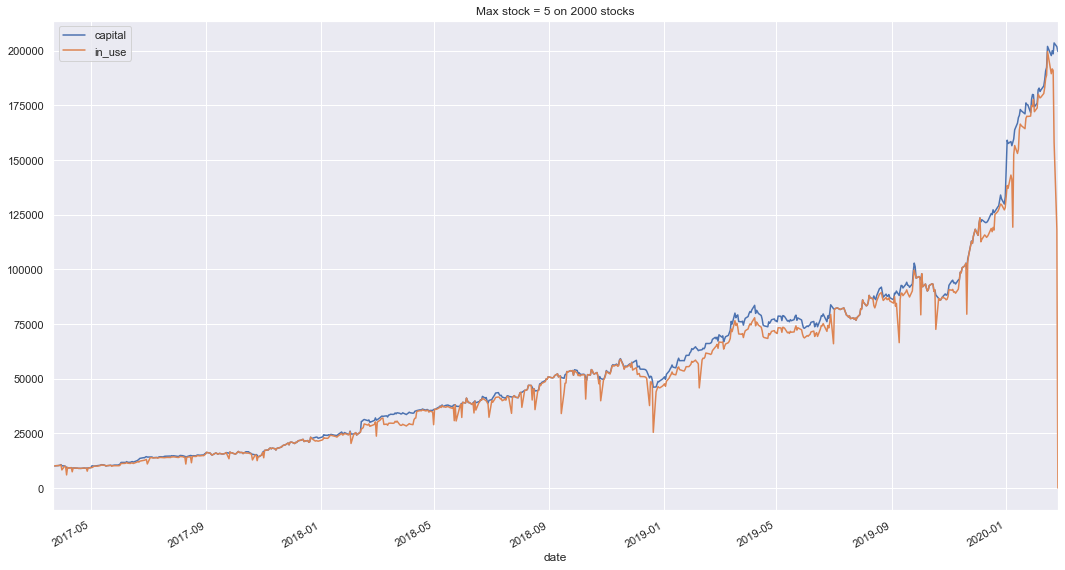

In [7]:
#myPnL_df, my_Capital_df = backtester()
myCapital_df = my_Capital_df
myCapital_df.index = myCapital_df.date
to_plot_cols = ['capital', 'in_use']
myCapital_df[to_plot_cols][first_buy_date:].plot(figsize=(18,10))
plt.title('Max stock = 5 on 2000 stocks')
plt.show()

# Analysis of Results

The cells below perform a simple analysis. They look at the completed trades. For each trade it calculates the gain and gain percentage. With that it then displays the top ten losses and top ten gains. It ends with calculating the percentage of trades that resulted in a loss.

In [8]:
sell_df = myPnL_df[myPnL_df.action=='SELL'].copy()
sell_df['gain'] = (sell_df.close_amount - sell_df.orig_amount)
sell_df['gain_pct'] = round((sell_df.gain / sell_df.orig_amount)*100, 2)
sell_df['daily_comp_pct'] = (((1 + sell_df.gain_pct/100) ** (1/ sell_df.days_in_trade)) - 1)*100
sell_df

action  close_amount    daily_gain     daily_pct  daily_return       date  \
0    SELL   2000.000000 -2.273737e-13 -1.136868e-14           NaN 2017-03-22   
0    SELL   2000.000000  0.000000e+00  0.000000e+00           NaN 2017-03-22   
0    SELL   2000.000000  0.000000e+00  0.000000e+00           NaN 2017-03-22   
0    SELL   2000.000000  0.000000e+00  0.000000e+00           NaN 2017-03-22   
0    SELL   2000.000000  2.273737e-13  1.136868e-14           NaN 2017-03-22   
..    ...           ...           ...           ...           ...        ...   
0    SELL  39453.065540 -6.479518e+02 -1.615799e+00           NaN 2020-02-24   
0    SELL  39151.121289 -9.498961e+02 -2.368758e+00           NaN 2020-02-24   
0    SELL  37419.841751 -1.765087e+03 -4.504505e+00           NaN 2020-02-25   
0    SELL  37910.079599 -6.655657e+02 -1.725352e+00           NaN 2020-02-25   
0    SELL  40661.182511  2.747377e+02  6.802721e-01           NaN 2020-02-25   

    days_in_trade  invested     no_shares   orig_amount  stop_loss ticker  \
0               1         0    355.871886   2000.000000     5.0580   CVGI   
0               1         0    173.160173   2000.000000    10.3950   LNDC   
0               1         0    215.053763   2000.000000     8.3700   NATR   
0               1         0    754.716981   2000.000000     2.3850    APT   
0               1         0    626.959248   2000.000000     2.8710   NYMX   
..            ...       ...           ...           ...        ...    ...   
0               2         0   3599.732257  40101.017346    10.0260   KVHI   
0               2         0   2567.286642  40101.017346    14.0580   TGTX   
0              10         0  35301.737501  36890.315689     0.9405   MICT   
0               4         0   1358.297370  39933.942681    26.4600   CCBG   
0               2         0  27473.771967  40386.444791     1.3230   STCN   

            gain  gain_pct  daily_comp_pct  
0  -2.273737e-13     -0.00        0.000000  
0   0.000000e+00      0.00        0.000000  
0   0.000000e+00      0.00        0.000000  
0   0.000000e+00      0.00        0.000000  
0   2.273737e-13      0.00        0.000000  
..           ...       ...             ...  
0  -6.479518e+02     -1.62       -0.813307  
0  -9.498961e+02     -2.37       -1.192106  
0   5.295261e+02      1.44        0.143075  
0  -2.023863e+03     -5.07       -1.292337  
0   2.747377e+02      0.68        0.339424  

[611 rows x 15 columns]

In [9]:
sell_df.describe()

close_amount    daily_gain   daily_pct  daily_return  days_in_trade  \
count    611.000000    611.000000  611.000000           0.0     611.000000   
mean   10920.618277     31.108284    0.118483           NaN       6.957447   
std    10063.735359   1056.447170    6.194326           NaN      20.832072   
min     1404.185128  -4877.566579  -15.000000           NaN       1.000000   
25%     2955.859746    -32.945209   -0.456421           NaN       1.000000   
50%     7523.836050      0.000000    0.000000           NaN       2.000000   
75%    15312.402867     16.742464    0.340644           NaN       5.000000   
max    47172.088733  23586.044367  100.000000           NaN     389.000000   

       invested     no_shares   orig_amount    stop_loss          gain  \
count     611.0    611.000000    611.000000   611.000000  6.110000e+02   
mean        0.0   1791.679990  10610.259463    50.118538  3.103588e+02   
std         0.0   5590.159815   9669.567819   247.865454  1.848963e+03   
min         0.0      0.678347   1404.185128     0.144000 -2.702632e+03   
25%         0.0    140.751352   2914.849306     4.904190 -1.818989e-12   
50%         0.0    444.896682   7523.836050    14.229000  0.000000e+00   
75%         0.0   1505.265381  15144.118473    43.227000  1.219657e+02   
max         0.0  87258.528643  40386.444791  4950.000000  2.263433e+04   

         gain_pct  daily_comp_pct  
count  611.000000      611.000000  
mean     2.916383        0.131631  
std     14.549223        1.231147  
min    -20.250000       -7.804555  
25%      0.000000        0.000000  
50%      0.000000        0.000000  
75%      1.680000        0.365097  
max    122.460000        8.409624

In [10]:
sell_df.sort_values(by='gain_pct', ascending=True)[0:10]

action  close_amount   daily_gain  daily_pct  daily_return       date  \
0   SELL   1418.702346  -225.190849 -13.698630           NaN 2017-04-05   
0   SELL   2577.719985  -276.184284  -9.677419           NaN 2017-09-25   
0   SELL   2382.663514  -336.376025 -12.371134           NaN 2017-10-20   
0   SELL   7185.714408 -1100.406474 -13.280116           NaN 2018-08-17   
0   SELL   8518.417255 -1310.525732 -13.333333           NaN 2018-12-21   
0   SELL   5048.685379  -388.360414  -7.142857           NaN 2018-06-13   
0   SELL   1772.356811  -312.768849 -15.000000           NaN 2017-03-31   
0   SELL   9263.965496  -755.744554  -7.542579           NaN 2018-12-17   
0   SELL   1679.680913  -110.428849  -6.168831           NaN 2017-04-11   
0   SELL   5846.848823  -370.493391  -5.959032           NaN 2018-08-14   

   days_in_trade  invested    no_shares   orig_amount  stop_loss ticker  \
0              3         0  2251.908486   1779.007704      0.711   AMPE   
0             16         0  1841.228561   3130.088553      1.530   CTRC   
0             25         0   560.626709   2859.196217      4.590   TCCO   
0              8         0   601.315013   8544.686338     12.789   ELOX   
0             42         0   428.276383  10111.605399     21.249   CDNA   
0              5         0  3883.604138   5980.750372      1.386   STRM   
0              2         0   521.281415   2085.125660      3.600   ELOX   
0              6         0  2437.885657  10872.970030      4.014   CTRC   
0              5         0   581.204468   1958.659058      3.033   IMGN   
0              6         0  1157.791846   6796.238137      5.283   ENPH   

          gain  gain_pct  daily_comp_pct  
0  -360.305358    -20.25       -7.265024  
0  -552.368568    -17.65       -1.206363  
0  -476.532703    -16.67       -0.726792  
0 -1358.971930    -15.90       -2.141287  
0 -1593.188144    -15.76       -0.407502  
0  -932.064993    -15.58       -3.330590  
0  -312.768849    -15.00       -7.804555  
0 -1609.004534    -14.80       -2.634164  
0  -278.978145    -14.24       -3.025633  
0  -949.389314    -13.97       -2.476715

In [11]:
sell_df.sort_values(by='gain_pct', ascending=False)[0:10]

action  close_amount    daily_gain   daily_pct  daily_return       date  \
0   SELL  35983.011123   -172.995246   -0.478469           NaN 2019-12-05   
0   SELL  17796.814372    312.940925    1.789883           NaN 2018-09-14   
0   SELL   6306.573626    394.160852    6.666667           NaN 2017-12-26   
0   SELL  38116.209821     10.326798    0.027100           NaN 2020-02-05   
0   SELL   9604.935154    198.551631    2.110818           NaN 2018-03-09   
0   SELL   9242.147795   4298.673393   86.956522           NaN 2018-02-13   
0   SELL  47172.088733  23586.044367  100.000000           NaN 2020-01-02   
0   SELL  11594.667100     80.112546    0.695750           NaN 2019-11-12   
0   SELL  22081.046717    357.652636    1.646394           NaN 2019-09-05   
0   SELL   4680.768409     29.336292    0.630694           NaN 2018-01-30   

   days_in_trade  invested    no_shares   orig_amount  stop_loss ticker  \
0             31         0  8649.762289  16175.055481      1.683   MRSN   
0             44         0   680.306360   8313.343716     10.998   CDNA   
0             84         0   788.321703   2995.622472      3.420   ELOX   
0             64         0  1032.679757  18536.601633     16.155   ENPH   
0             36         0  2481.895389   4814.877054      1.746   ENPH   
0             31         0  2149.336697   4642.567265      1.944     ZN   
0             17         0  4137.902520  24537.761946      5.337    SES   
0            389         0   216.520394   7095.373312     29.493   ESNT   
0            128         0   266.904952  13924.431370     46.953   MEDP   
0             88         0   325.958803   2966.225106      8.190   TACT   

           gain  gain_pct  daily_comp_pct  
0  19807.955642    122.46        2.612832  
0   9483.470655    114.08        1.745004  
0   3310.951154    110.53        0.890198  
0  19579.608188    105.63        1.132787  
0   4790.058100     99.48        1.936692  
0   4599.580531     99.07        2.245770  
0  22634.326787     92.24        3.919415  
0   4499.293788     63.41        0.126325  
0   8156.615347     58.58        0.360875  
0   1714.543303     57.80        0.519707

In [12]:
sell_df[sell_df.gain_pct < 0].count()[0], sell_df[sell_df.gain_pct < 0].count()[0]/len(sell_df)

(149, 0.24386252045826515)

In [13]:
myPnL_df

action  close_amount   daily_gain  daily_pct  daily_return       date  \
0     BUY   2000.000000     0.000000   0.000000           NaN 2017-03-22   
0     BUY   2000.000000     0.000000   0.000000           NaN 2017-03-22   
0     BUY   2000.000000     0.000000   0.000000           NaN 2017-03-22   
0     BUY   2000.000000     0.000000   0.000000           NaN 2017-03-22   
0     BUY   2000.000000     0.000000   0.000000           NaN 2017-03-22   
..    ...           ...          ...        ...           ...        ...   
0   CLOSE  38575.645311 -1100.220870        NaN     -2.773023 2020-02-24   
0   CLOSE  40386.444791     0.000000        NaN      0.000000 2020-02-24   
0    SELL  37419.841751 -1765.086875  -4.504505           NaN 2020-02-25   
0    SELL  37910.079599  -665.565711  -1.725352           NaN 2020-02-25   
0    SELL  40661.182511   274.737720   0.680272           NaN 2020-02-25   

    days_in_trade  invested     no_shares   orig_amount  stop_loss ticker  
0               0         0    626.959248   2000.000000     2.8710   NYMX  
0               0         0     25.471218   2000.000000    70.6680    WST  
0               0         0    355.871886   2000.000000     5.0580   CVGI  
0               0         0    173.160173   2000.000000    10.3950   LNDC  
0               0         0    215.053763   2000.000000     8.3700   NATR  
..            ...       ...           ...           ...        ...    ...  
0               3         0   1358.297370  39933.942681    26.4600   CCBG  
0               1         0  27473.771967  40386.444791     1.3230   STCN  
0              10         0  35301.737501  36890.315689     0.9405   MICT  
0               4         0   1358.297370  39933.942681    26.4600   CCBG  
0               2         0  27473.771967  40386.444791     1.3230   STCN  

[4862 rows x 12 columns]

In [14]:
sell_df.ticker.unique(), len(sell_df.ticker.unique())

(array(['CVGI', 'LNDC', 'NATR', 'APT', 'NYMX', 'REX', 'WST', 'CACC',
        'CASH', 'ATSG', 'DXCM', 'MLAB', 'IVC', 'GEOS', 'SGMO', 'PTSI',
        'ELOX', 'CTRC', 'CBZ', 'EBS', 'SCL', 'TCCO', 'BASI', 'CF', 'DPZ',
        'BHC', 'AMPE', 'BDC', 'THRM', 'JJSF', 'ARAY', 'IMGN', 'DAIO',
        'ISNS', 'TRNS', 'OPNT', 'SRT', 'GLUU', 'ZN', 'NVDA', 'PZG', 'CRK',
        'CORT', 'PAAS', 'AUY', 'AG', 'MSEX', 'NSSC', 'ARWR', 'DOV', 'CYH',
        'BBQ', 'SPPI', 'ODC', 'ABMD', 'OTEX', 'ATRS', 'GSIT', 'HELE',
        'HURC', 'VRTU', 'ZUMZ', 'CPHI', 'CHDN', 'ARC', 'AMD', 'EXAS',
        'LMNR', 'LULU', 'TIPT', 'BTE', 'IRDM', 'AVID', 'KBR', 'BWA', 'NLS',
        'VECO', 'IOVA', 'LZB', 'NFLX', 'KMPR', 'INS', 'AMKR', 'XLNX',
        'FLDM', 'TSLA', 'WTT', 'GLDD', 'AEZS', 'PAYS', 'TRST', 'LHCG',
        'NOA', 'AMWD', 'IMAX', 'UVSP', 'UNT', 'RGS', 'HOFT', 'TACT', 'IIN',
        'VLY', 'PGR', 'TG', 'GATX', 'EQIX', 'PCRX', 'EDUC', 'IPHI', 'PACD',
        'KIRK', 'PODD', 'ZIXI', 'ABIO', 'SCCO', 'MOH', 'R

In [15]:
sell_df[['ticker', 'gain']].groupby(by='ticker').sum().reset_index().sort_values(by='gain', ascending=False)[0:10]

ticker          gain
117   ENPH  27142.787074
287    SES  22296.091162
213   MRSN  19807.955642
160   IMGN  14097.676196
72    CDNA   8775.639787
276   RVNC   8655.911382
201   MEDP   8156.615347
241   OVID   7922.587880
306   SYRS   7128.648940
179   KALV   5764.250541

In [16]:
sell_df[['ticker', 'gain']].groupby(by='ticker').sum().reset_index().sort_values(by='gain', ascending=True)[0:10]

ticker         gain
285   SELB -3120.262468
89    CTRC -3043.780718
265   REKR -2394.111720
223   NERV -2182.725493
28    ARDX -2095.170929
69    CCBG -2023.863081
309   TCCO -1997.924813
51    BCRX -1973.940745
244   PAYS -1969.737914
273    RPD -1835.462607

In [17]:
sell_df[['ticker', 'gain']].groupby(by='ticker').mean().reset_index().sort_values(by='gain', ascending=False)[0:10]

ticker          gain
213   MRSN  19807.955642
201   MEDP   8156.615347
241   OVID   7922.587880
287    SES   7432.030387
306   SYRS   7128.648940
117   ENPH   6785.696769
232   NXRT   5159.563524
275   RUBI   4514.597596
121   ESNT   4499.293788
276   RVNC   4327.955691

In [18]:
sell_df[['ticker', 'gain']].groupby(by='ticker').mean().reset_index().sort_values(by='gain', ascending=True)[0:10]

ticker         gain
265   REKR -2394.111720
223   NERV -2182.725493
69    CCBG -2023.863081
273    RPD -1835.462607
285   SELB -1560.131234
262   RACE -1161.417291
28    ARDX -1047.585465
51    BCRX  -986.970372
313   TGTX  -949.896057
321   TRVN  -939.475486

In [19]:
myCapital_df.tail()

date capital      in_use     free
date                                              
2020-02-19 2020-02-19  199951      191646  8304.99
2020-02-20 2020-02-20  198525      190937  7588.01
2020-02-21 2020-02-21  203530      158110  45420.4
2020-02-24 2020-02-24  201785      118147  83638.1
2020-02-25 2020-02-25  199629  2.6921e-10   199629

In [20]:
len(possible_trades_df)

20658

In [21]:
possible_trades_df.to_csv(f'{DATAPATH}possible_trades_2000.csv', index=False)
myCapital_df.to_csv(f'{DATAPATH}capital_2000.csv', index=False)
myPnL_df.to_csv(f'{DATAPATH}PnL_2000.csv', index=False)

In [22]:
ls ../data

F13_Renaissance_tech.csv  capital_0500.csv          possible_trades_1000.csv
F13_Renaissance_tech.txt  capital_1000.csv          possible_trades_1500.csv
PnL_0100.csv              capital_1500.csv          possible_trades_2000.csv
PnL_0500.csv              capital_2000.csv          stocks.csv
PnL_1000.csv              exclude.csv               stocks_100.csv
PnL_1500.csv              optimal_params.csv        stocks_1000.csv
PnL_2000.csv              possible_trades_0100.csv  stocks_2000.csv
capital_0100.csv          possible_trades_0500.csv  stocks_500.csv
